# Final file to summarize all the plots

### Let's start by loading our data and do the following pre-processing : 

- we want to filter out on whether the number of occurrences of the same region is smaller than 20 (you can use the groupby and transform functions.)

- Remove area_acronyms that are not relevant to our analysis

- And we want to have a filter to only have the rows where area acronyms are contained in both R+ and R-

- Moreover, we only keep the mice data that have done the passive analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plot import *

og_df = pd.read_csv('./Data/overall_combined.csv')#pd.read_csv('/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/Overall/overall_combined.csv')

df = og_df[og_df.groupby(['area_acronym', 'event'])['area_acronym'].transform('count') >= 20]
df = df[df['area_acronym']!= 'VL']

df.loc[df['area_acronym'] == 'AUDv', 'area_acronym'] = 'AUD'
df.loc[df['area_acronym'] == 'AUDp', 'area_acronym'] = 'AUD'
df.loc[df['area_acronym'] == 'AUDd', 'area_acronym'] = 'AUD'

df = df[df['has context'] == False]


areas_R = set(df[df['wh_reward']=='R+']['area_acronym'].unique())
areas_R_no = set(df[df['wh_reward']=='R-']['area_acronym'].unique())
common_elements = areas_R.intersection(areas_R_no)
common_elements_arr = list(common_elements)
df = df.loc[df['area_acronym'].isin(common_elements)]

# The following will be useful while visualizing plots
areas = df['area_acronym'].unique()
areas = sorted(areas)

# Start with specific region visualization 
- ### sensory and auditory regions of big importance



## 1) Starting with whisker and auditory

In [ ]:
for context in ['passive_pre', 'passive_post', 'active']:
    for region in ['SSp-bfd', 'SSs', 'MOs', 'AUD']:

        # Filter data for 'SSp-bfd'
        df_1_region = df[(df['area_acronym'] == region)&(df['context']==context)]

        # Drop NaN values in the 'selective' column
        df_filtered = df_1_region.dropna(subset=['selective'])
        df_filtered = df_filtered[df_filtered['event'] != 'wh_vs_aud']
        title_to_change = 'whisker_&_auditory'#'wh_vs_aud'
        
        # Calculate percentages grouped by 'event' and 'wh_reward'
        percentages = df_filtered.groupby(['event', 'wh_reward'])['selective'].mean().reset_index()
        percentages['selective'] *= 100  # Convert to percentage

        # Create the plot
        plt.figure(figsize=(20, 21))
        sns.barplot(x='event', y='selective', hue='wh_reward', data=percentages, palette='Set2',gap = 0.09, width=0.5)

        # Add labels and title
        plt.xlabel('\n Event ', fontsize=35)
        plt.ylim(0, 50)
        plt.ylabel('Percentage of Selective Neurons \n', fontsize=35)
        plt.title(f'Selectivity (%) by Reward Type for {region} and {context} \n', fontsize=40)
        plt.xticks(fontsize=33)
        plt.yticks(fontsize=33)
        plt.legend(title='Reward Type', loc='upper right', prop={'size': 25}, fontsize = 35)
        plt.tight_layout()
        os.makedirs(f'./figures/{region}', exist_ok=True)
        plt.savefig(f'./figures/{region}/{region}_{context}_{title_to_change}_selectivity.png')
        plt.show()
        


## 2) Then with whisker vs auditory

In [ ]:
for context in ['passive_pre', 'passive_post', 'active']:
    for region in ['SSp-bfd', 'SSs', 'MOs', 'AUD']:

        # Filter data for 'SSp-bfd'
        df_1_region = df[(df['area_acronym'] == region)&(df['context']==context)]

        # Drop NaN values in the 'selective' column
        df_filtered = df_1_region.dropna(subset=['selective'])
        df_filtered = df_filtered[df_filtered['event'] == 'wh_vs_aud']
        title_to_change = 'wh_vs_aud'#'whisker_&_auditory'#'wh_vs_aud'
        
        # Calculate percentages grouped by 'event' and 'wh_reward'
        percentages = df_filtered.groupby(['event', 'wh_reward'])['selective'].mean().reset_index()
        percentages['selective'] *= 100  # Convert to percentage

        # Create the plot
        plt.figure(figsize=(20, 21))
        sns.barplot(x='event', y='selective', hue='wh_reward', data=percentages, palette='Set2',gap = 0.09, width=0.5)

        # Add labels and title
        plt.xlabel('\n Event ', fontsize=35)
        plt.ylim(0, 50)
        plt.ylabel('Percentage of Selective Neurons \n', fontsize=35)
        plt.title(f'Selectivity (%) by Reward Type for {region} and {context} \n', fontsize=40)
        plt.xticks(fontsize=33)
        plt.yticks(fontsize=33)
        plt.legend(title='Reward Type', loc='upper right', prop={'size': 25}, fontsize = 35)
        plt.tight_layout()
        os.makedirs(f'./figures/{region}', exist_ok=True)
        plt.savefig(f'./figures/{region}/{region}_{context}_{title_to_change}_selectivity.png')
        plt.show()
        

## 3) Then with spontaneous licks

In [ ]:

for region in ['SSp-bfd', 'SSs', 'MOs', 'AUD']:

    # Filter data for 'SSp-bfd'
    df_1_region = df[(df['area_acronym'] == region)&(df['event']=='spontaneous_licks')]

    # Drop NaN values in the 'selective' column
    df_filtered = df_1_region.dropna(subset=['selective'])

    # Calculate percentages grouped by 'event' and 'wh_reward'
    percentages = df_filtered.groupby(['event', 'wh_reward'])['selective'].mean().reset_index()
    percentages['selective'] *= 100  # Convert to percentage

    # Create the plot
    plt.figure(figsize=(20, 21))
    sns.barplot(x='event', y='selective', hue='wh_reward', data=percentages, palette='Set2', width = 0.5, gap = 0.09)

    # Add labels and title
    plt.xlabel('\n Event', fontsize=35)
    plt.ylim(0, 80)
    plt.ylabel('Percentage of Selective Neurons \n', fontsize=35)
    plt.title(f'Selectivity (%) by Reward Type for {region} \n', fontsize=40)
    plt.xticks(fontsize = 33)
    plt.yticks(fontsize = 33)
    plt.legend(title='Reward Type', loc='upper right', fontsize = 35)
    plt.tight_layout()
    plt.savefig(f'./figures/{region}/{region}_spontaneous_licks_selectivity.png')
    plt.show()


# Then overall plots to visualize what is happening

In [5]:
def percentage_selectivity(df, category='whisker', context='', over_mouse=False, wh_reward = ''):
    """
    Plots the average percentage of selective neurons per brain region for the given category and context.
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), and 'selective'.
    - category: Category for the event ('whisker', 'auditory', etc.)
    - context: Context for the event (e.g., 'active', 'passive_pre', etc.)
    """
    if wh_reward != '':
        # Filter the dataframe for the given category and context
        if category == 'spontaneous_licks':
            df_filtered = df[(df['event'] == category)&(df['wh_reward'] == wh_reward)]
        else:
            df_filtered = df[(df['event'] == category) & (df['context'] == context) & (df['wh_reward'] == wh_reward)]
    else:
        if category == 'spontaneous_licks':
            df_filtered = df[(df['event'] == category)]
        else:
            df_filtered = df[(df['event'] == category) & (df['context'] == context)]
    

    # Drop NaN values in the 'selective' column
    df_filtered = df_filtered.dropna(subset=['selective'])

    # Ensure 'selective' is a binary column (True/False)
    df_filtered['selective'] = df_filtered['selective'].astype(bool)

    # Calculate the percentage of selective neurons per mouse and brain region
    if over_mouse:
        percentages = df_filtered.groupby(['area_acronym', 'mouse_id'])['selective'].mean().reset_index()
    else:
        percentages = df_filtered.groupby(['area_acronym'])['selective'].mean().reset_index()
    percentages['selective'] *= 100  # Convert to percentage

    return percentages


def percentage_selectivity_wh_reward(df, category='whisker', context='active', over_mouse=False):
    """
    Calculates the average percentage of selective neurons per brain region for the given category and context.
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), and 'selective'.
    - category: Category for the event ('whisker', 'auditory', etc.)
    - context: Context for the event (e.g., 'active', 'passive_pre', etc.)
    """
    # Filter the dataframe for the given category and context
    if category == 'spontaneous_licks':
        df_filtered = df[(df['event'] == category)]
    else:
        df_filtered = df[(df['event'] == category) & (df['context'] == context)]

    # Drop NaN values in the 'selective' column
    df_filtered = df_filtered.dropna(subset=['selective'])

    # Ensure 'selective' is a binary column (True/False)
    df_filtered['selective'] = df_filtered['selective'].astype(bool)

    # Calculate the percentage of selective neurons per mouse and brain region
    if over_mouse:
        percentages = df_filtered.groupby(['area_acronym', 'wh_reward', 'mouse_id'])['selective'].mean().reset_index()
    else:
        percentages = df_filtered.groupby(['area_acronym', 'wh_reward'])['selective'].mean().reset_index()
    percentages['selective'] *= 100  # Convert to percentage

    return percentages

## 1) Overall - whisker, auditory, wh_vs_aud

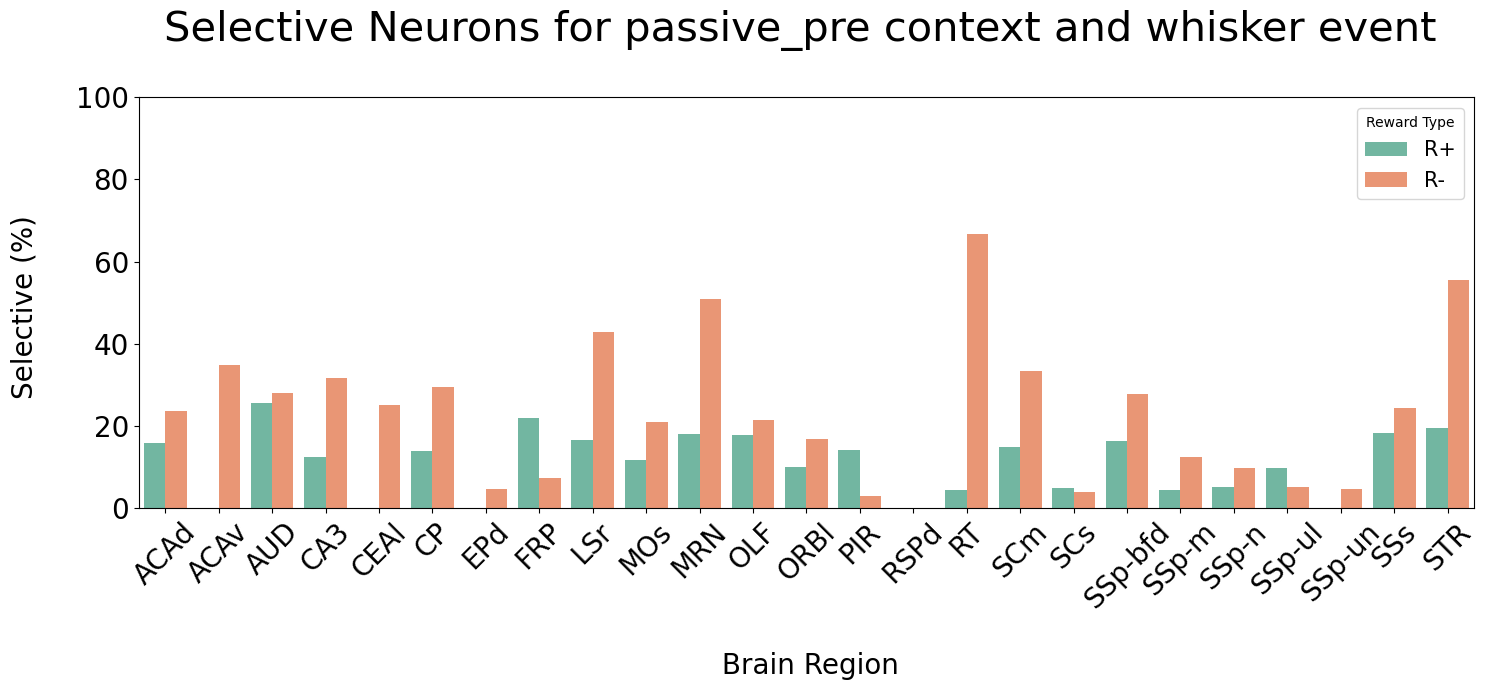

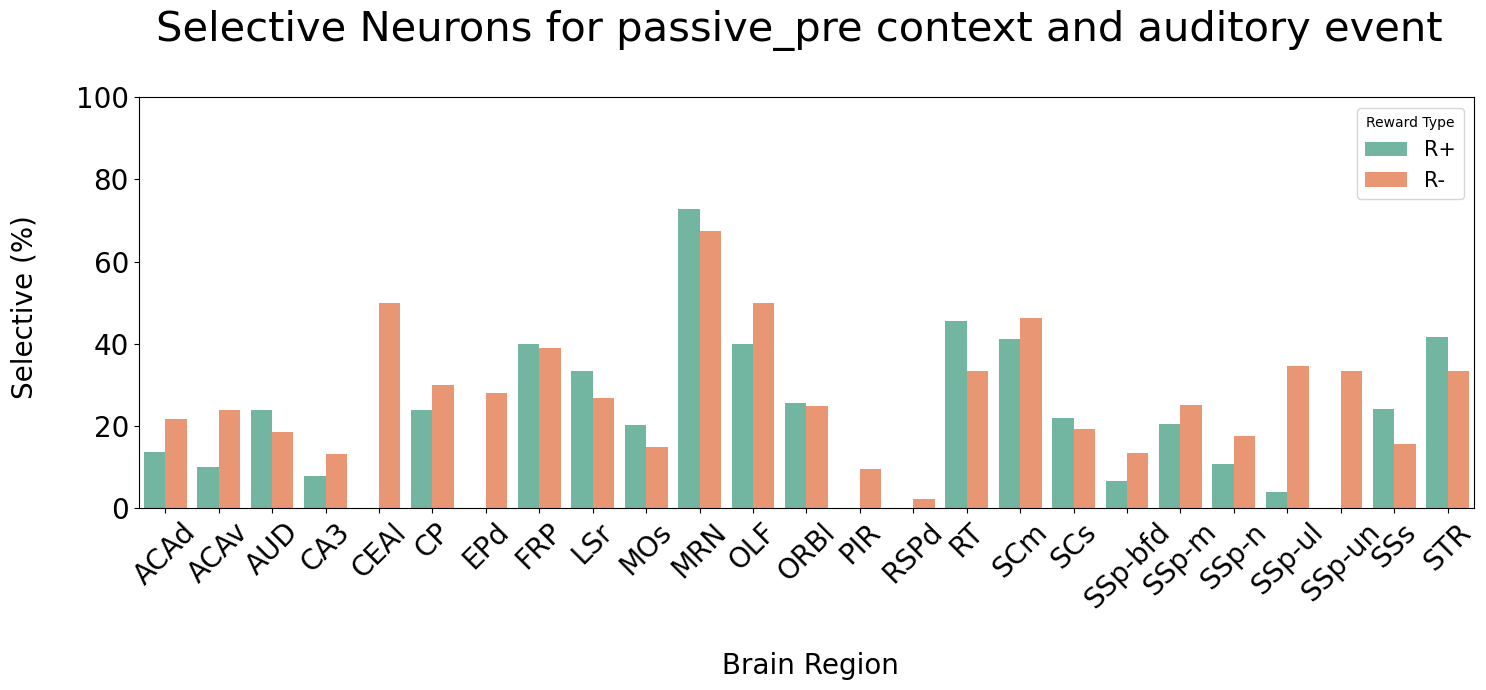

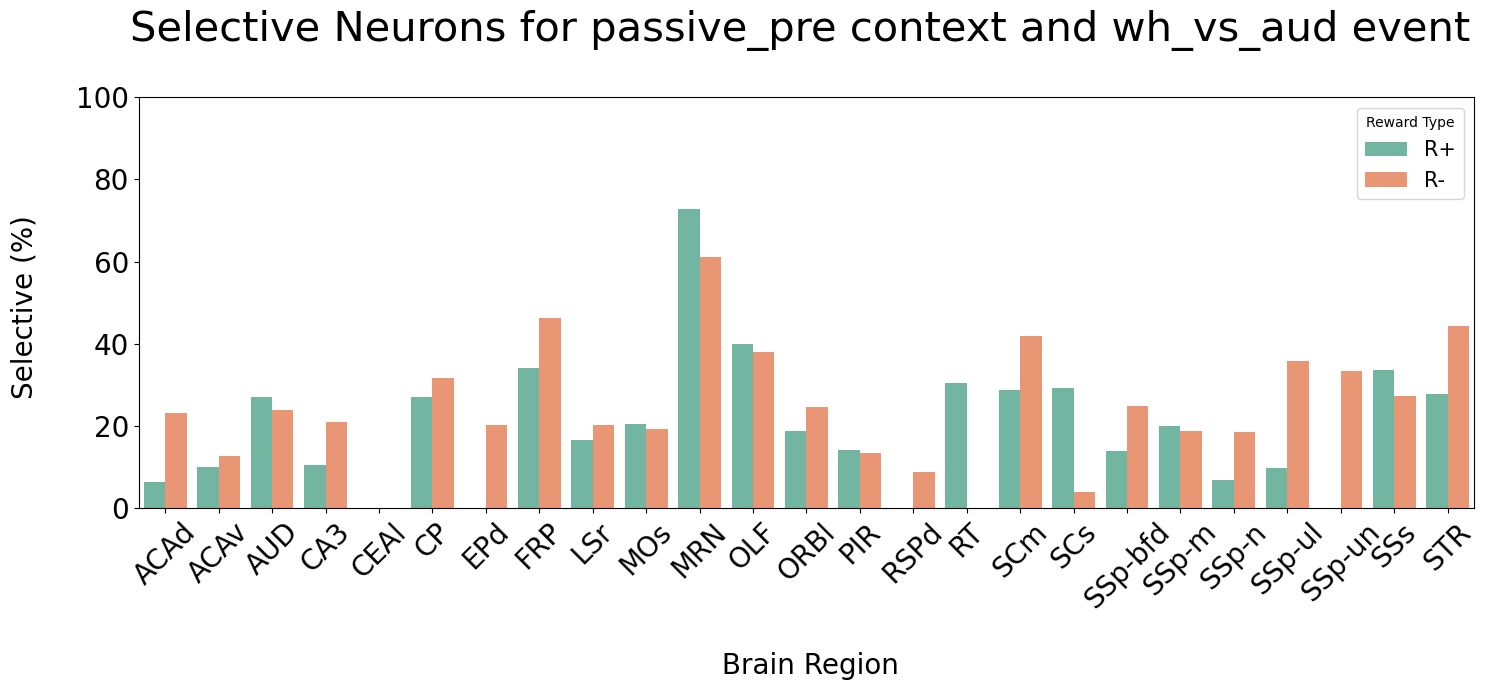

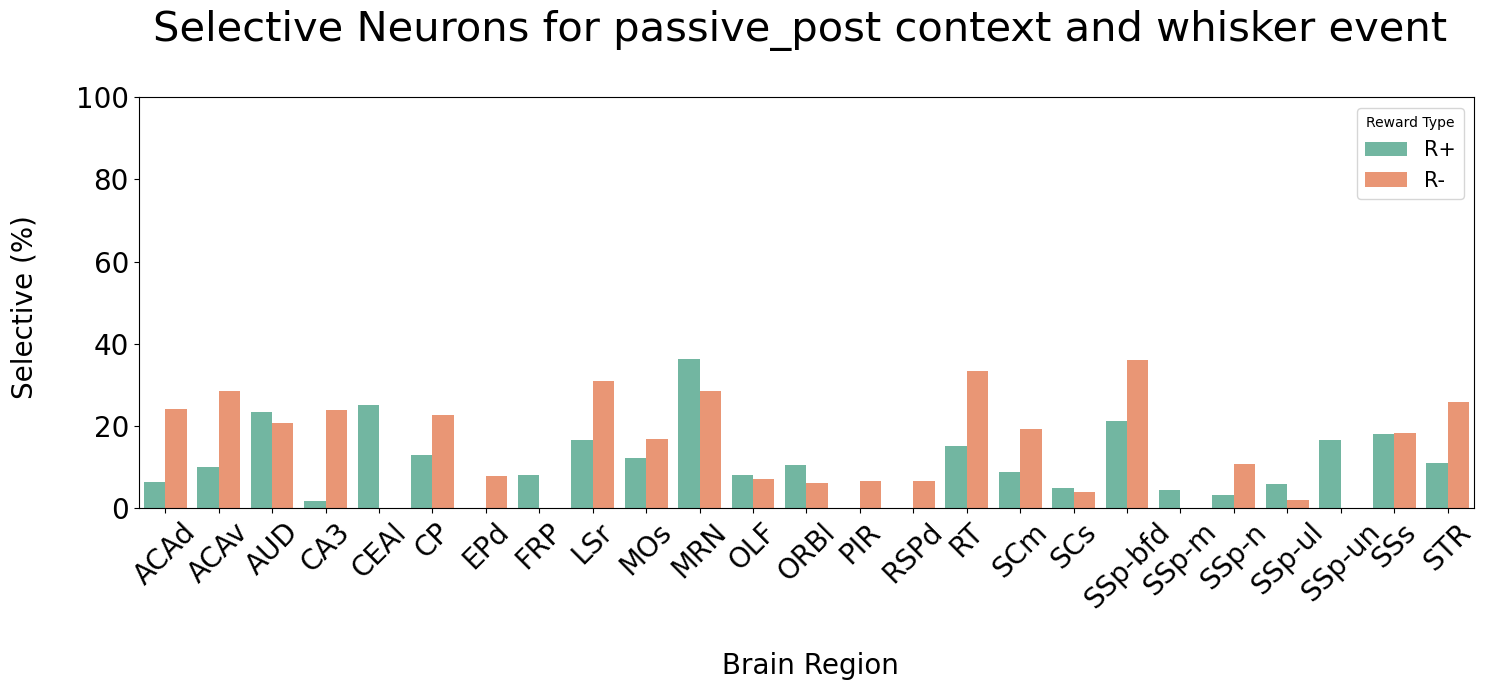

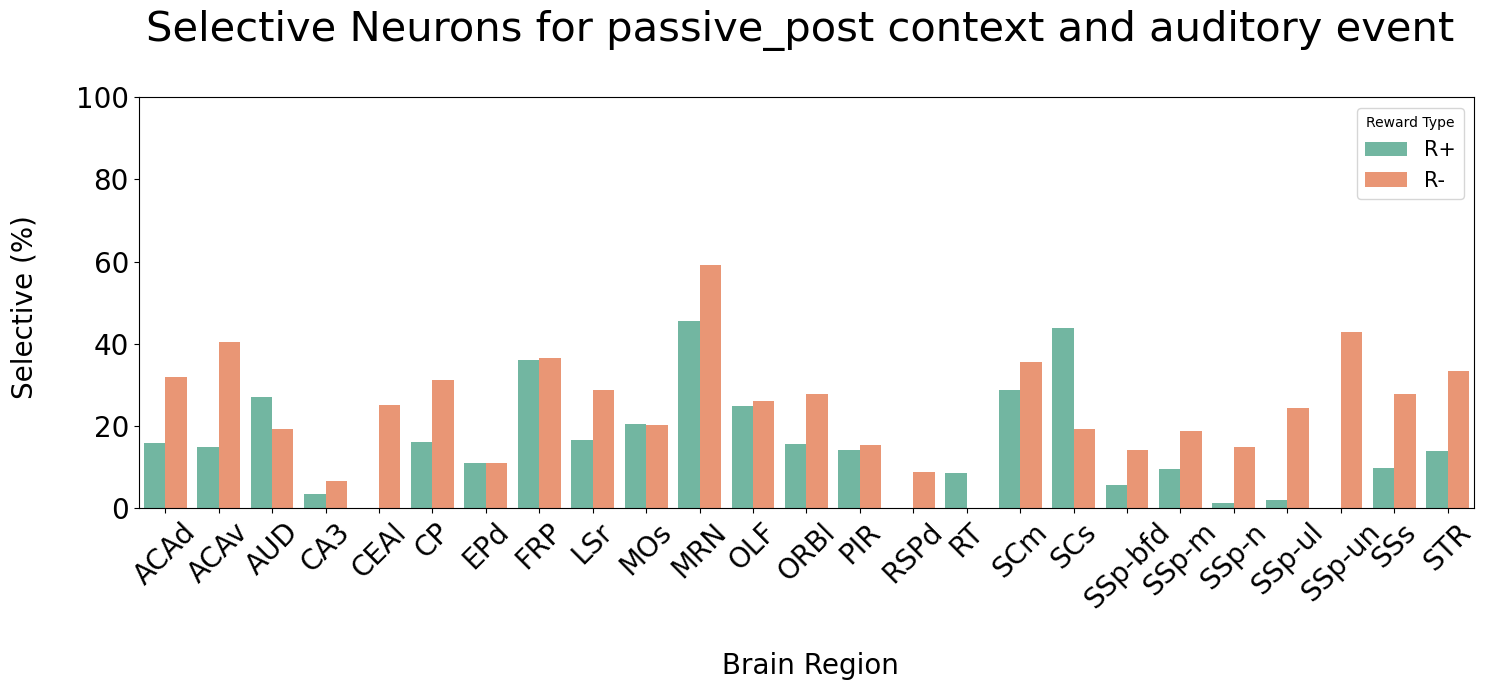

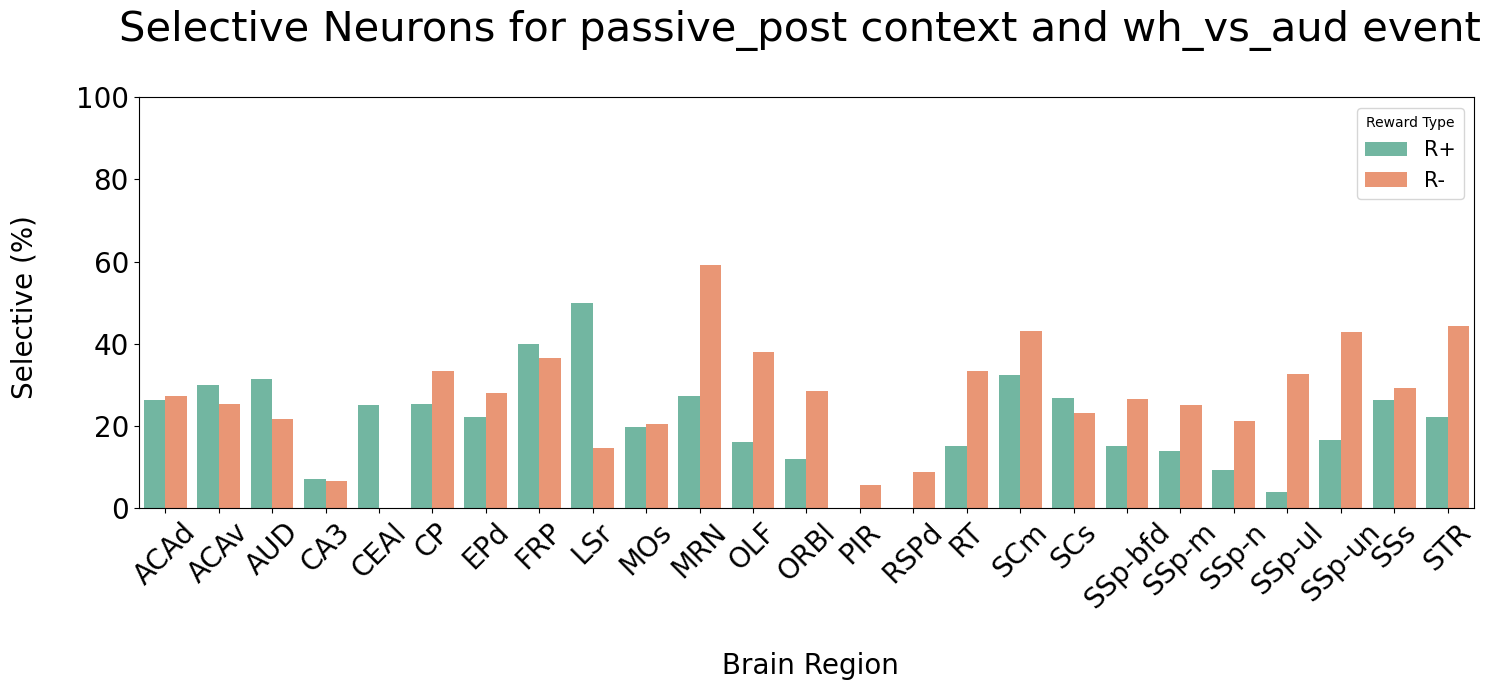

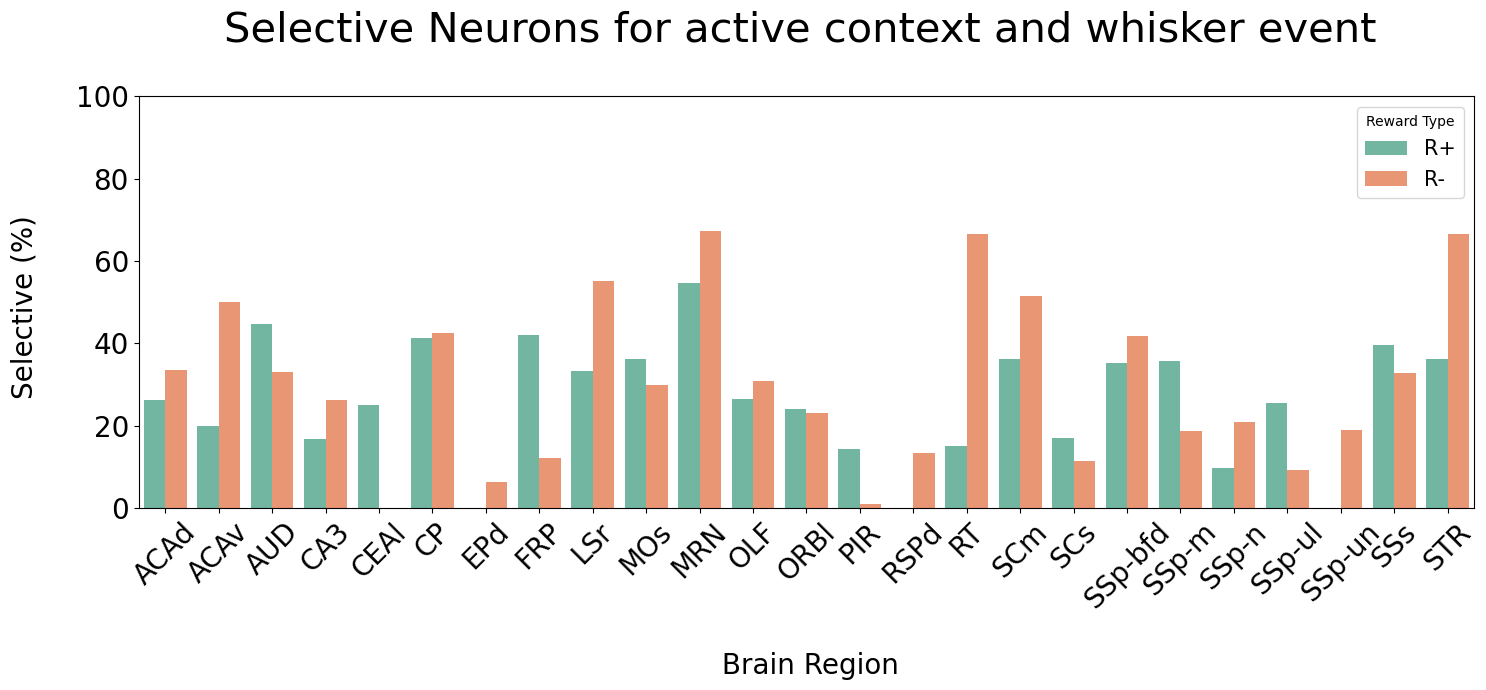

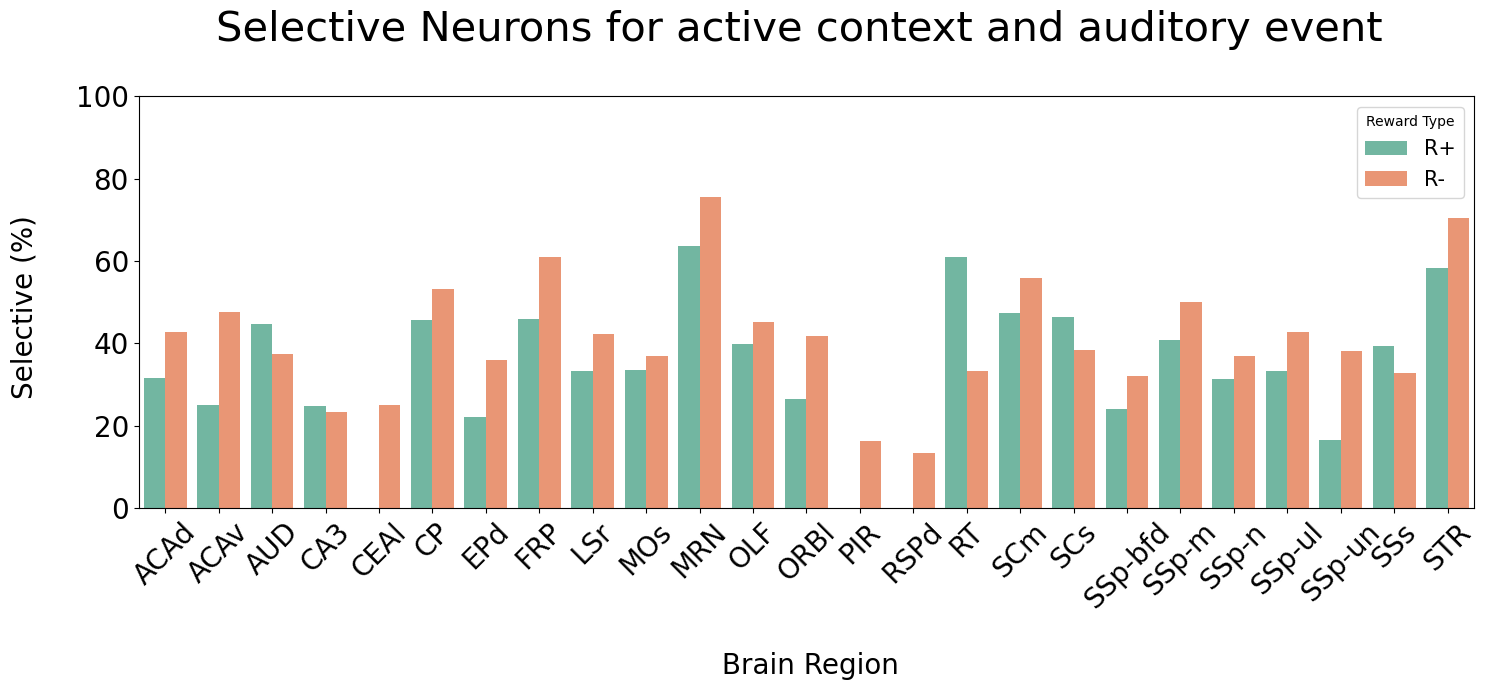

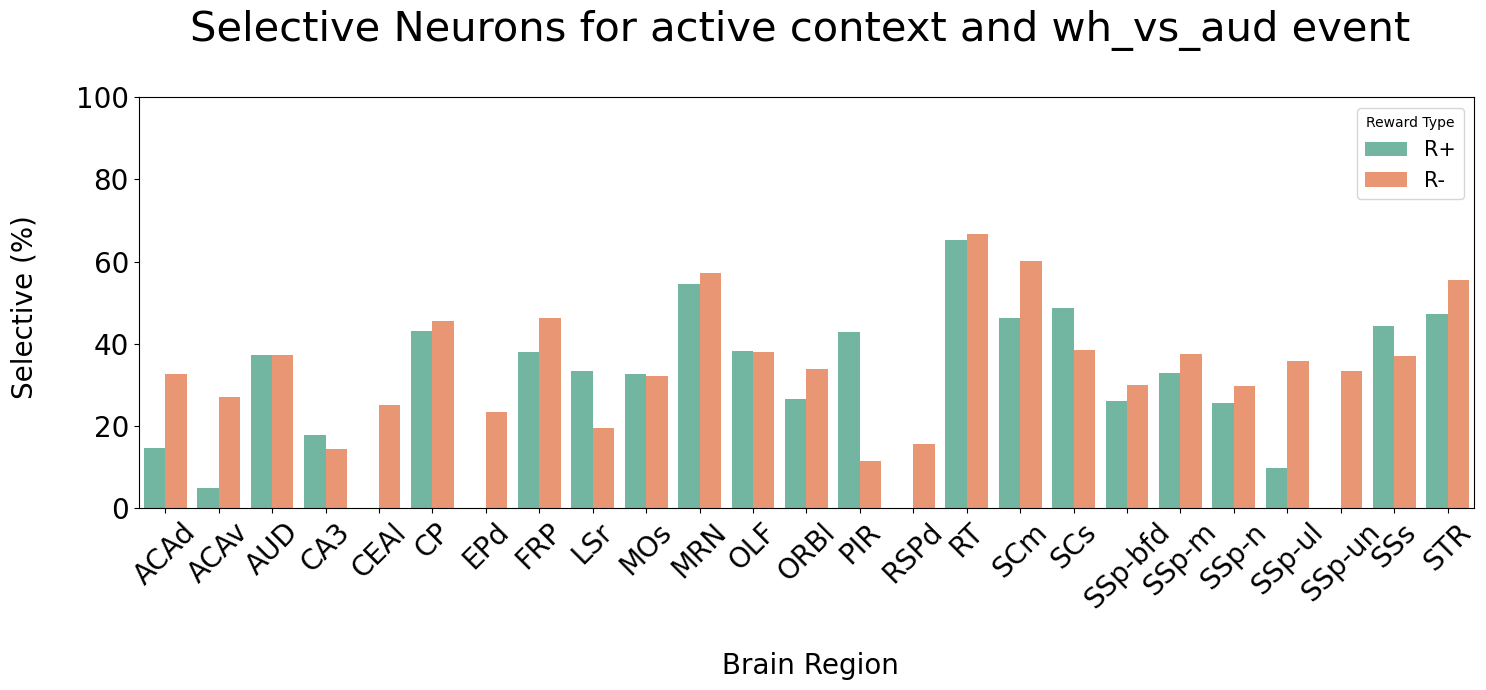

In [25]:
# List of contexts and events
contexts = ['passive_pre', 'passive_post', 'active']
events = ['whisker', 'auditory', 'wh_vs_aud']

for context in contexts:
    for event in events:
        plt.figure(figsize=(15, 7))

        # Get the percentage selectivity data
        avg_percentages = percentage_selectivity_wh_reward(df, category=event, context=context)

        # Ensure all areas from the predefined list are present in the data, adding 0 for missing ones
        #missing_areas = [area for area in areas if area not in avg_percentages['area_acronym'].unique()]
        #missing_rows = pd.DataFrame([{'area_acronym': area, 'wh_reward': 'N/A', 'selective': 0} for area in missing_areas])
        #avg_percentages = pd.concat([avg_percentages, missing_rows], ignore_index=True)

        # Create the seaborn barplot with hue for `wh_reward`
        sns.barplot(x='area_acronym', y='selective', hue='wh_reward', data=avg_percentages, order=areas, palette='Set2')

        # Set the title and labels
        plt.title(f'Selective Neurons for {context} context and {event} event \n', fontsize=30)
        plt.xticks(rotation=45, fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.xlabel('\n Brain Region', fontsize = 20)
        plt.ylabel('Selective (%) \n', fontsize = 20)
        plt.ylim(0, 100)
        plt.legend(title='Reward Type', loc='upper right', fontsize = 15)
        path = os.path.join(f'./figures/total/{event}', f'rewards_selectivity_{event}_{context}')
        # Display the plot
        plt.tight_layout()
        plt.savefig(path)
        plt.show()

## 2) Same but separating R+ and R-

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of contexts and reward conditions
contexts = ['passive_pre', 'passive_post', 'active']
reward_conditions = ['R+', 'R-']

for event in ['whisker', 'auditory', 'wh_vs_aud']:
    # Iterate over each combination of context and reward condition
    for context in contexts:
        for reward in reward_conditions:
            plt.figure(figsize=(15, 5))
            
            # Get the percentage selectivity data
            avg_percentages = percentage_selectivity(df, category=event, context=context, wh_reward=reward)
            
            # Ensure all areas from the predefined list are present in the data, adding 0 for missing ones
            avg_percentages['selective'] = avg_percentages.apply(
                lambda row: row['selective'] if row['area_acronym'] in areas else 0, axis=1
            )
            
            # Create the seaborn barplot for the current category
            sns.barplot(x='area_acronym', y='selective', data=avg_percentages, order=areas)
            
            # Set the title and labels
            plt.suptitle(f'Selective Neurons for {context} and {event} with {reward} \n', fontsize=30)
            plt.xticks(rotation=45, fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.xlabel('\n Brain Region', fontsize = 20)
            plt.ylabel('Selective (%) \n', fontsize = 20)
            plt.ylim(0, 100)
            #plt.legend(title='Reward Type', loc='upper right', fontsize = 15)
            # Display the plot
            #os.path.join('./figures/total', event)
            path = f"./figures/total/{event}"
            os.makedirs(path, exist_ok=True)
            path_final = os.path.join(path,f'selectivity_{context}_{reward}_{event}.png')
            plt.savefig(path_final)
            plt.show()

## 3) Now for Spontanous licks

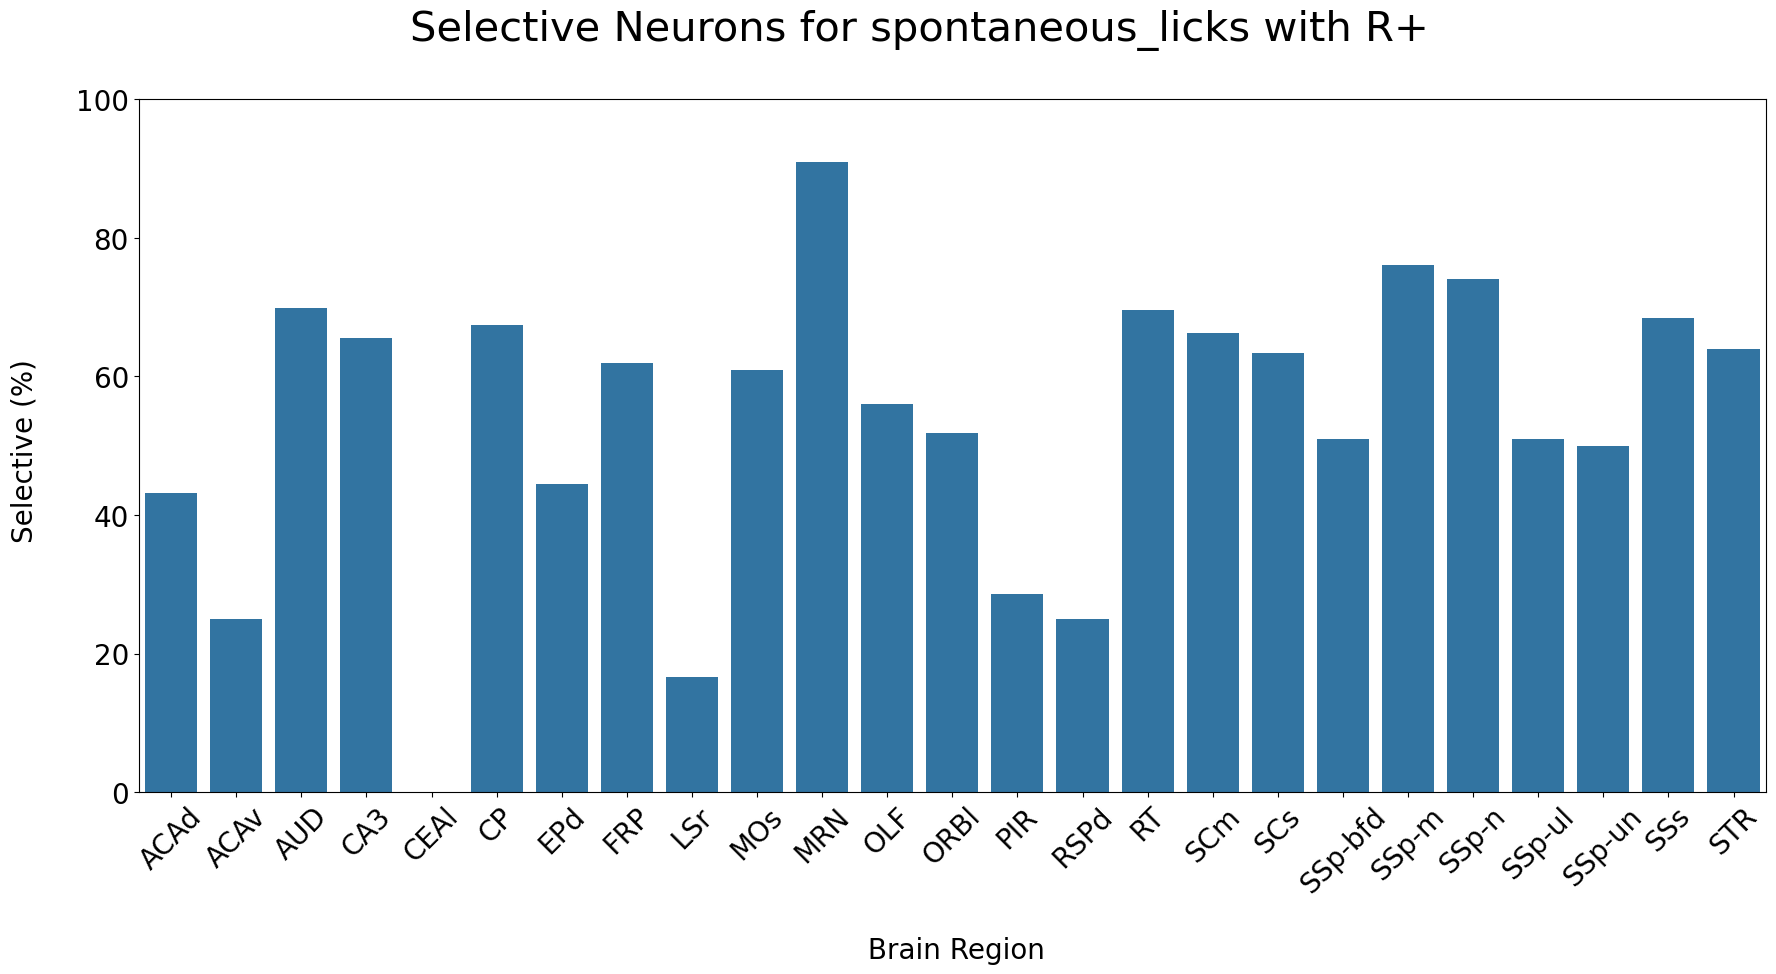

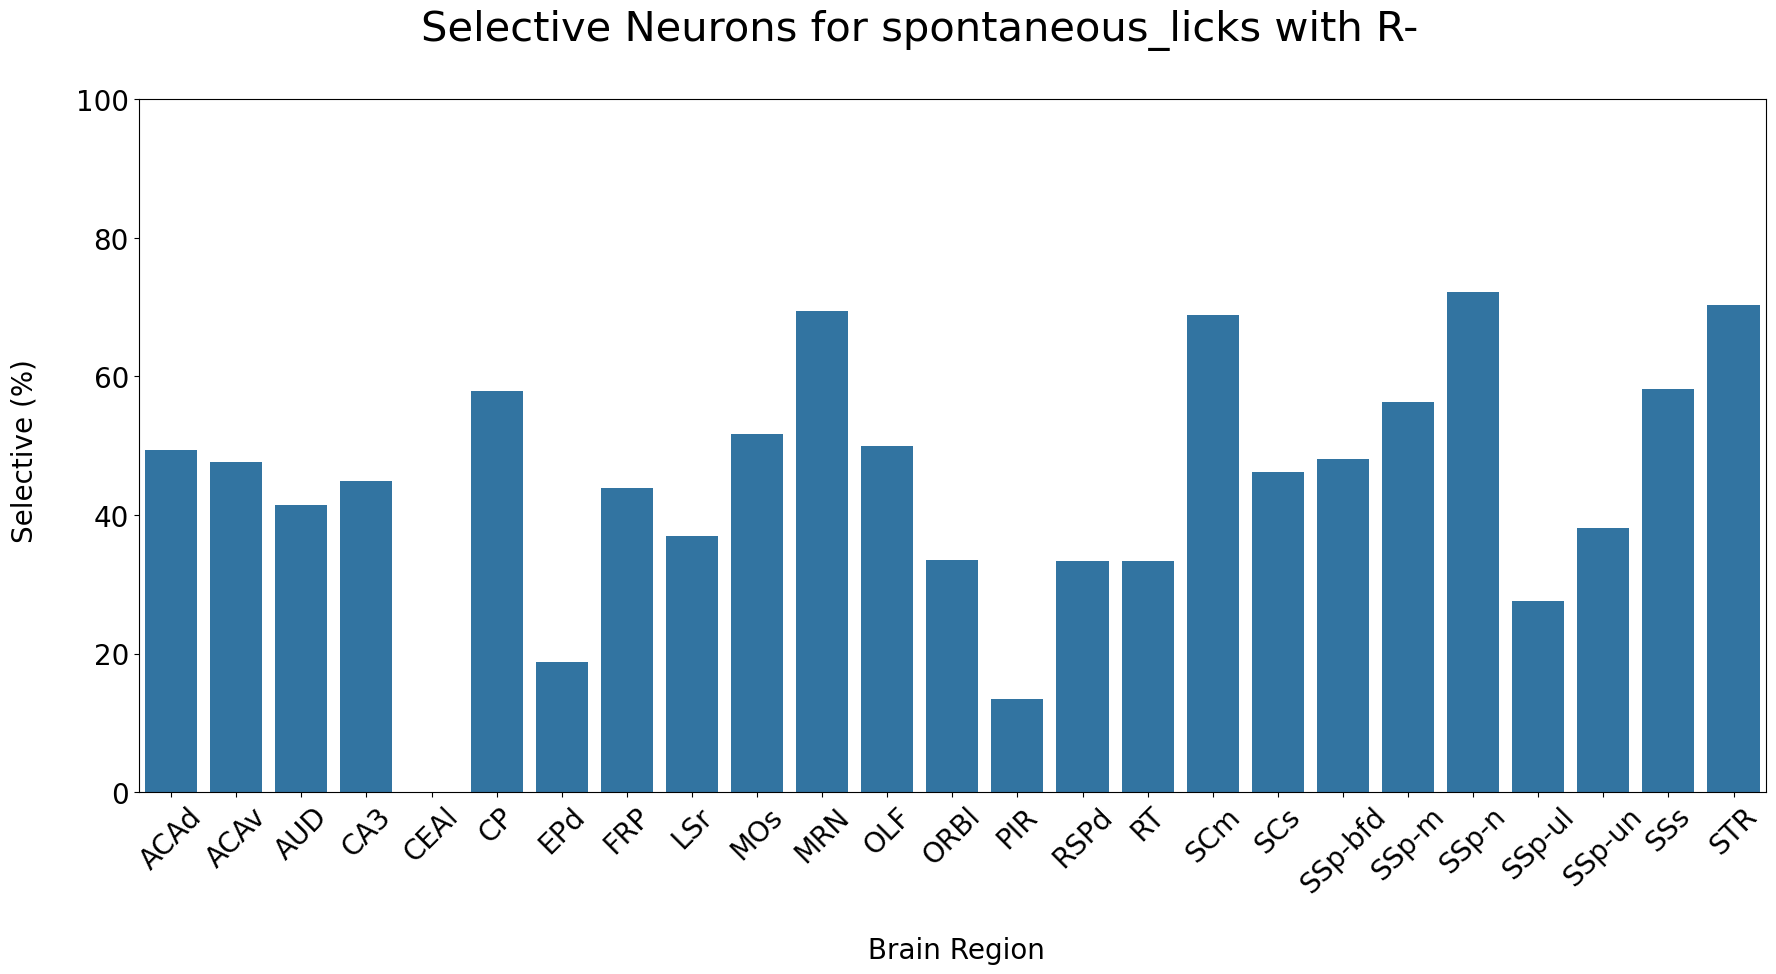

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of contexts and reward conditions
contexts = ['']
reward_conditions = ['R+', 'R-']

for event in ['spontaneous_licks']:
    # Iterate over each combination of context and reward condition
    for context in contexts:
        for reward in reward_conditions:
            plt.figure(figsize=(21, 9))
            
            # Get the percentage selectivity data
            avg_percentages = percentage_selectivity(df, category=event, context=context, wh_reward=reward)
            
            # Ensure all areas from the predefined list are present in the data, adding 0 for missing ones
            avg_percentages['selective'] = avg_percentages.apply(
                lambda row: row['selective'] if row['area_acronym'] in areas else 0, axis=1
            )
            
            # Create the seaborn barplot for the current category
            sns.barplot(x='area_acronym', y='selective', data=avg_percentages, order=areas)
            title = f'Selective Neurons for {context} and {event} with {reward} \n'
            if event == 'spontaneous_licks':
                title = f'Selective Neurons for {event} with {reward} \n'
            # Set the title and labels
            plt.suptitle(title, fontsize=30)
            plt.xticks(rotation=45, fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.xlabel('\n Brain Region', fontsize = 20)
            plt.ylabel('Selective (%) \n', fontsize = 20)
            plt.ylim(0, 100)
            #plt.legend(title='Reward Type', loc='upper right', fontsize = 15)
            # Display the plot
            #os.path.join('./figures/total', event)
            path = f"./figures/total/{event}"
            os.makedirs(path, exist_ok=True)
            path_final = os.path.join(path,f'selectivity_{reward}_{event}.png')
            plt.savefig(path_final)
            plt.show()

In [20]:
areas

['ACAd',
 'ACAv',
 'AUD',
 'CA3',
 'CEAl',
 'CP',
 'EPd',
 'FRP',
 'LSr',
 'MOs',
 'MRN',
 'OLF',
 'ORBl',
 'PIR',
 'RSPd',
 'RT',
 'SCm',
 'SCs',
 'SSp-bfd',
 'SSp-m',
 'SSp-n',
 'SSp-ul',
 'SSp-un',
 'SSs',
 'STR']

# Now directionality analysis

In [69]:
def plot_selectivity_direction_v4(df, by='event', filter_value='', wh_reward='R+', event_type='', context='', areas=''):
    # Filter by event or area_acronym if filter_value is provided
    if filter_value != '':
        df = df[df[by] == filter_value]
    
    title_event = f' for {event_type} and {context}' if by == 'area_acronym' else ''

    # Count selective neurons by group
    selective_counts = df[(df['wh_reward'] == wh_reward) & (df['selective'] == True)] \
        .groupby([by, 'direction', 'wh_reward']) \
        .size() \
        .reset_index(name='count')

    # Calculate total neurons per group
    total_counts = df.groupby([by, 'direction']).size().reset_index(name='count')
    hi = total_counts.groupby(by)['count'].sum().reset_index(name='total')

    # Merge for normalization
    selective_percentages = selective_counts.merge(hi, on=[by])
    selective_percentages['percentage'] = selective_percentages['count'] / selective_percentages['total'] * 100

    # Adjust visualization values
    selective_percentages['visual_percentage'] = selective_percentages.apply(
        lambda row: -row['percentage'] if row['direction'] == 'negative' else row['percentage'],
        axis=1
    )

    # Plotting
    plt.figure(figsize=(21, 12))

    # Create the bar plot
    ax = sns.barplot(
        data=selective_percentages,
        x=by,
        y='visual_percentage',
        hue='direction',
        palette='viridis',
        order=areas
    )

    # Ensure alignment of x-ticks with bars
    if areas:
        ax.set_xticks(range(len(areas)))
        ax.set_xticklabels(areas, rotation=90, ha='right', fontsize=25)

    # Adjust legends to avoid duplicates
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), title='Direction')

    # Set axis labels and titles
    title = f'Percentage of Selective Neurons per {by.capitalize()} for {wh_reward}{title_event}'
    if filter_value:
        title = f'Percentage of Selective Neurons per {by.capitalize()} for {filter_value} for {wh_reward}{title_event}'

    plt.axhline(0, color='black', linewidth=0.8)  # Reference line at baseline
    plt.title(title, fontsize=30)
    plt.ylabel('Percentage (%)', fontsize=30)
    plt.xlabel(by.capitalize(), fontsize=30)
    #plt.ylim(-2,50)
    plt.legend(fontsize = 30)
    plt.xticks(rotation=45, ha='right', fontsize=30)
    plt.yticks(fontsize=30)
    plt.tight_layout()
    os.makedirs(f'./figures_direction/{event}', exist_ok=True)
    path = os.path.join(f'./figures_direction/{event}', f'direction_{event}_{context}_{wh_reward}.png')
    plt.savefig(path)
    plt.show()


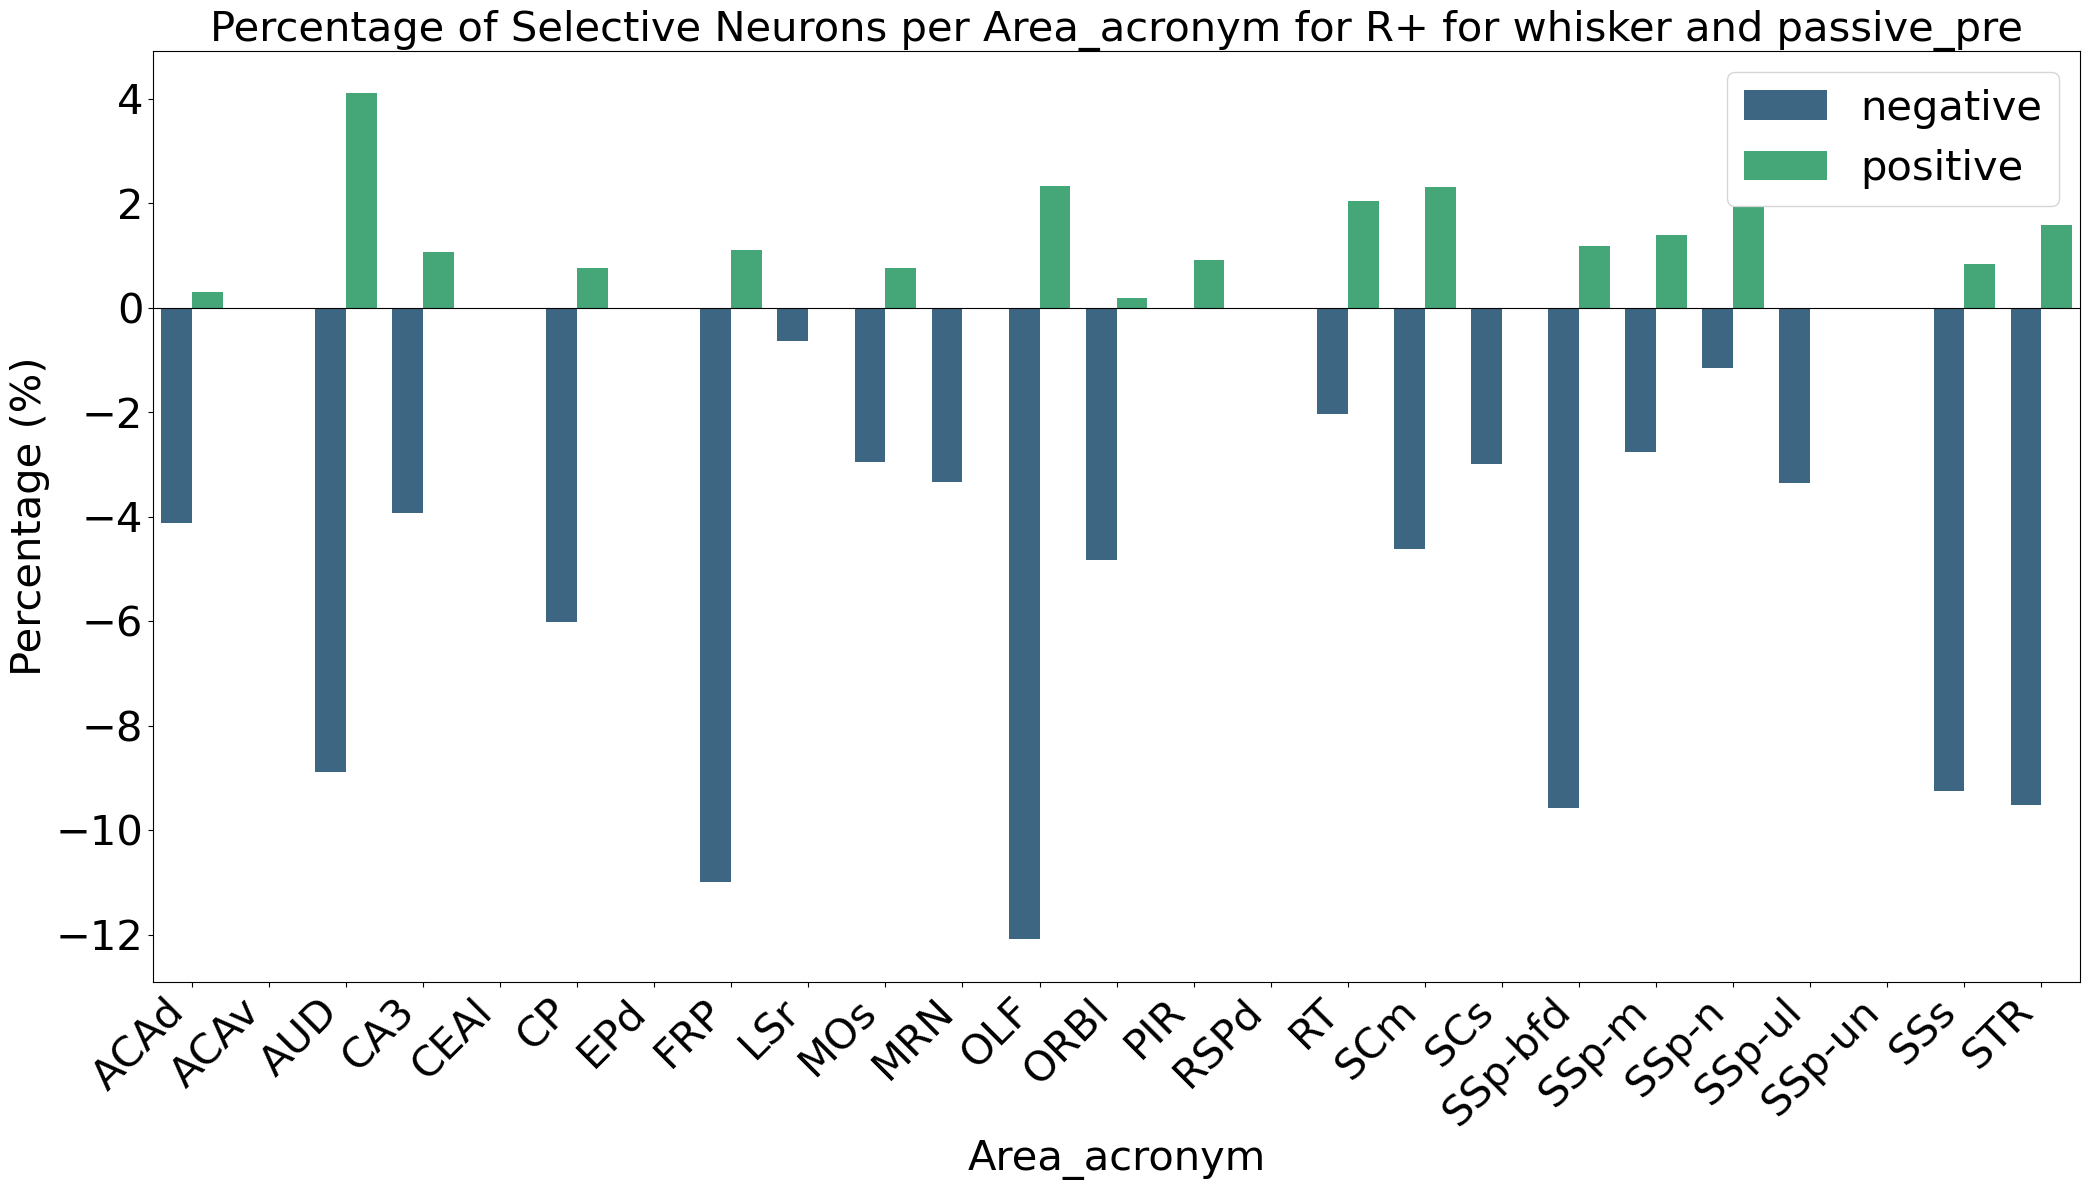

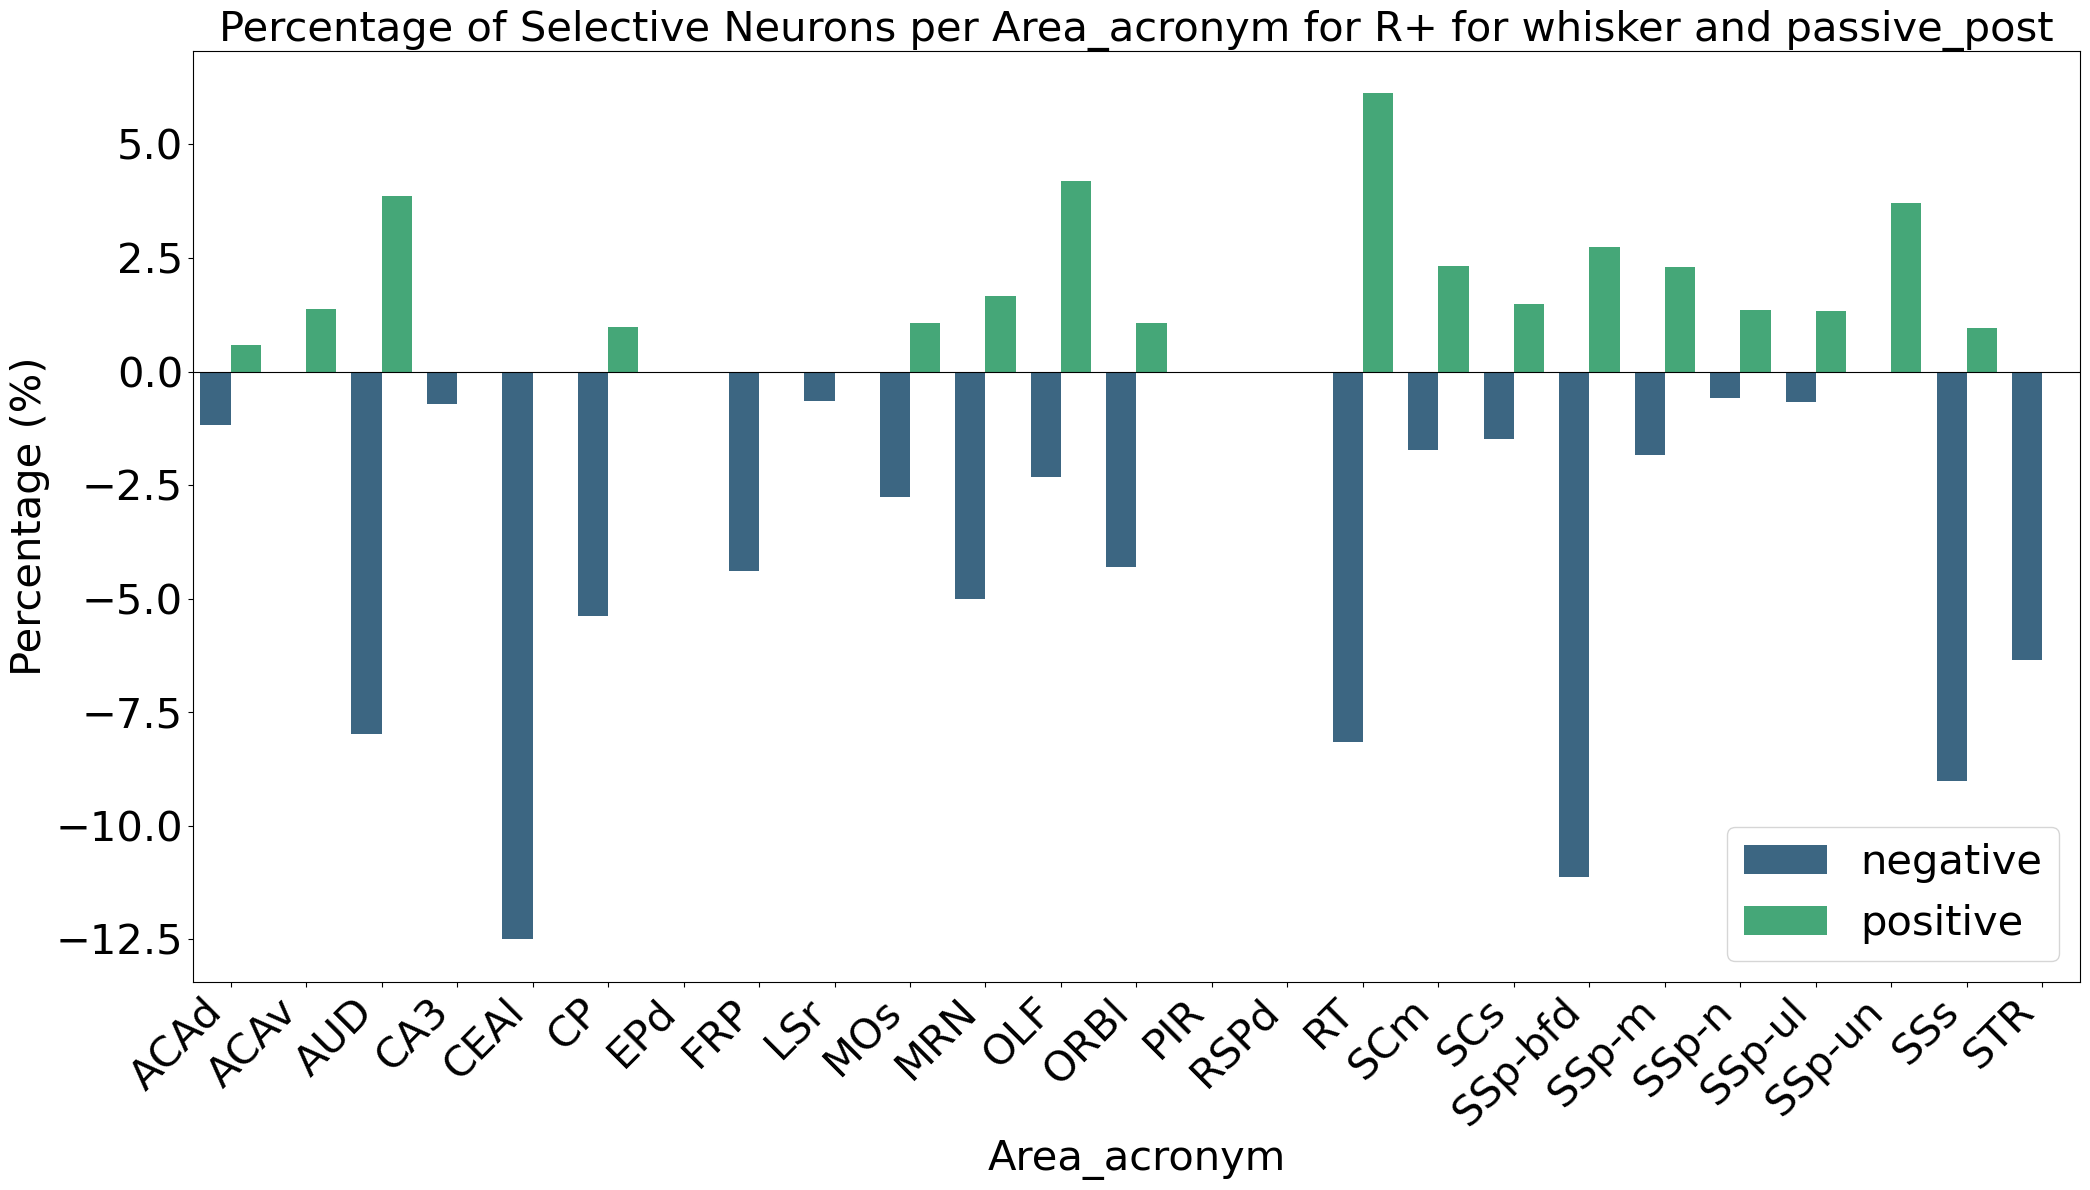

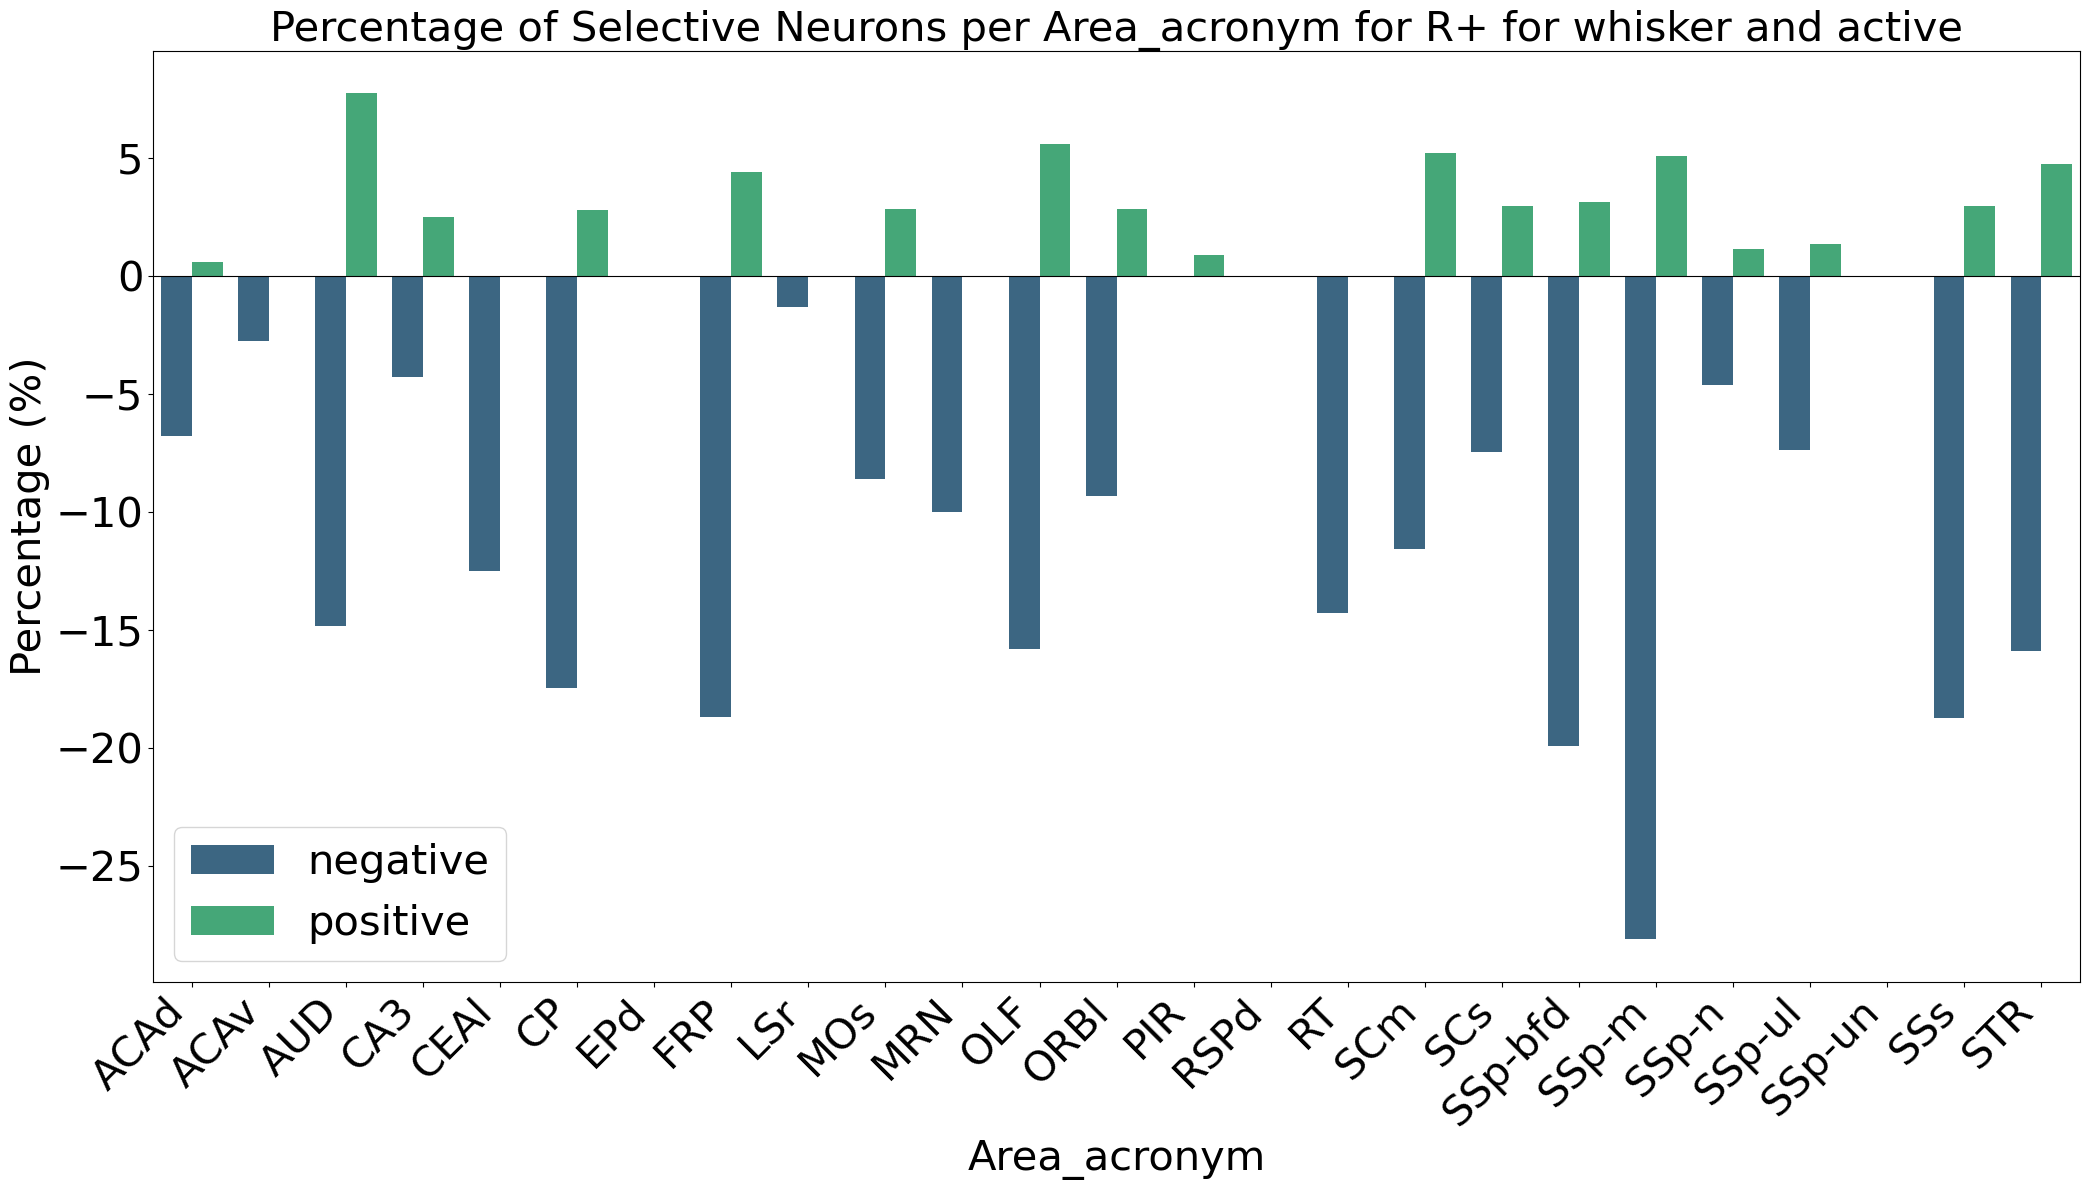

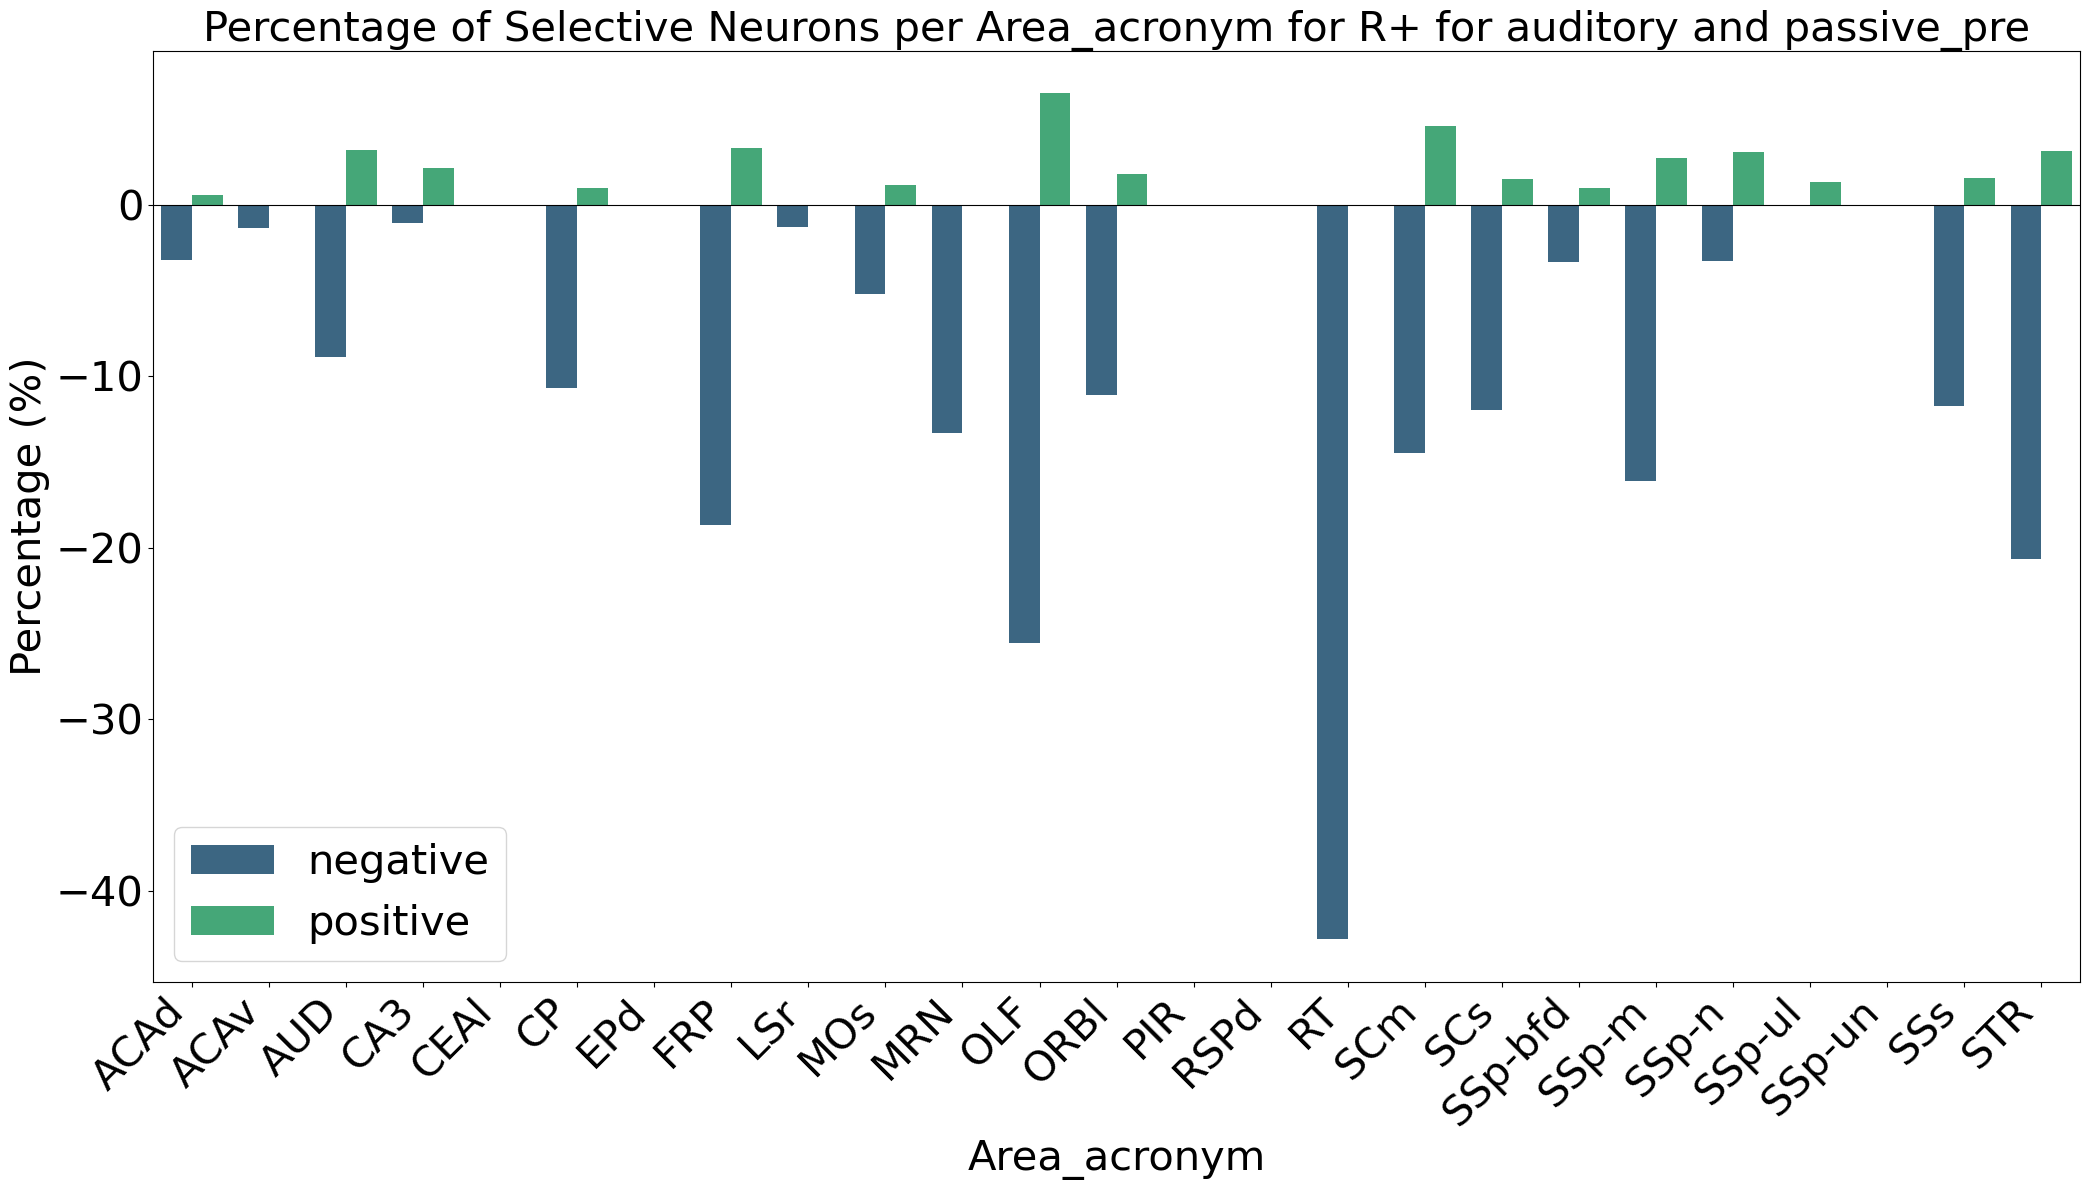

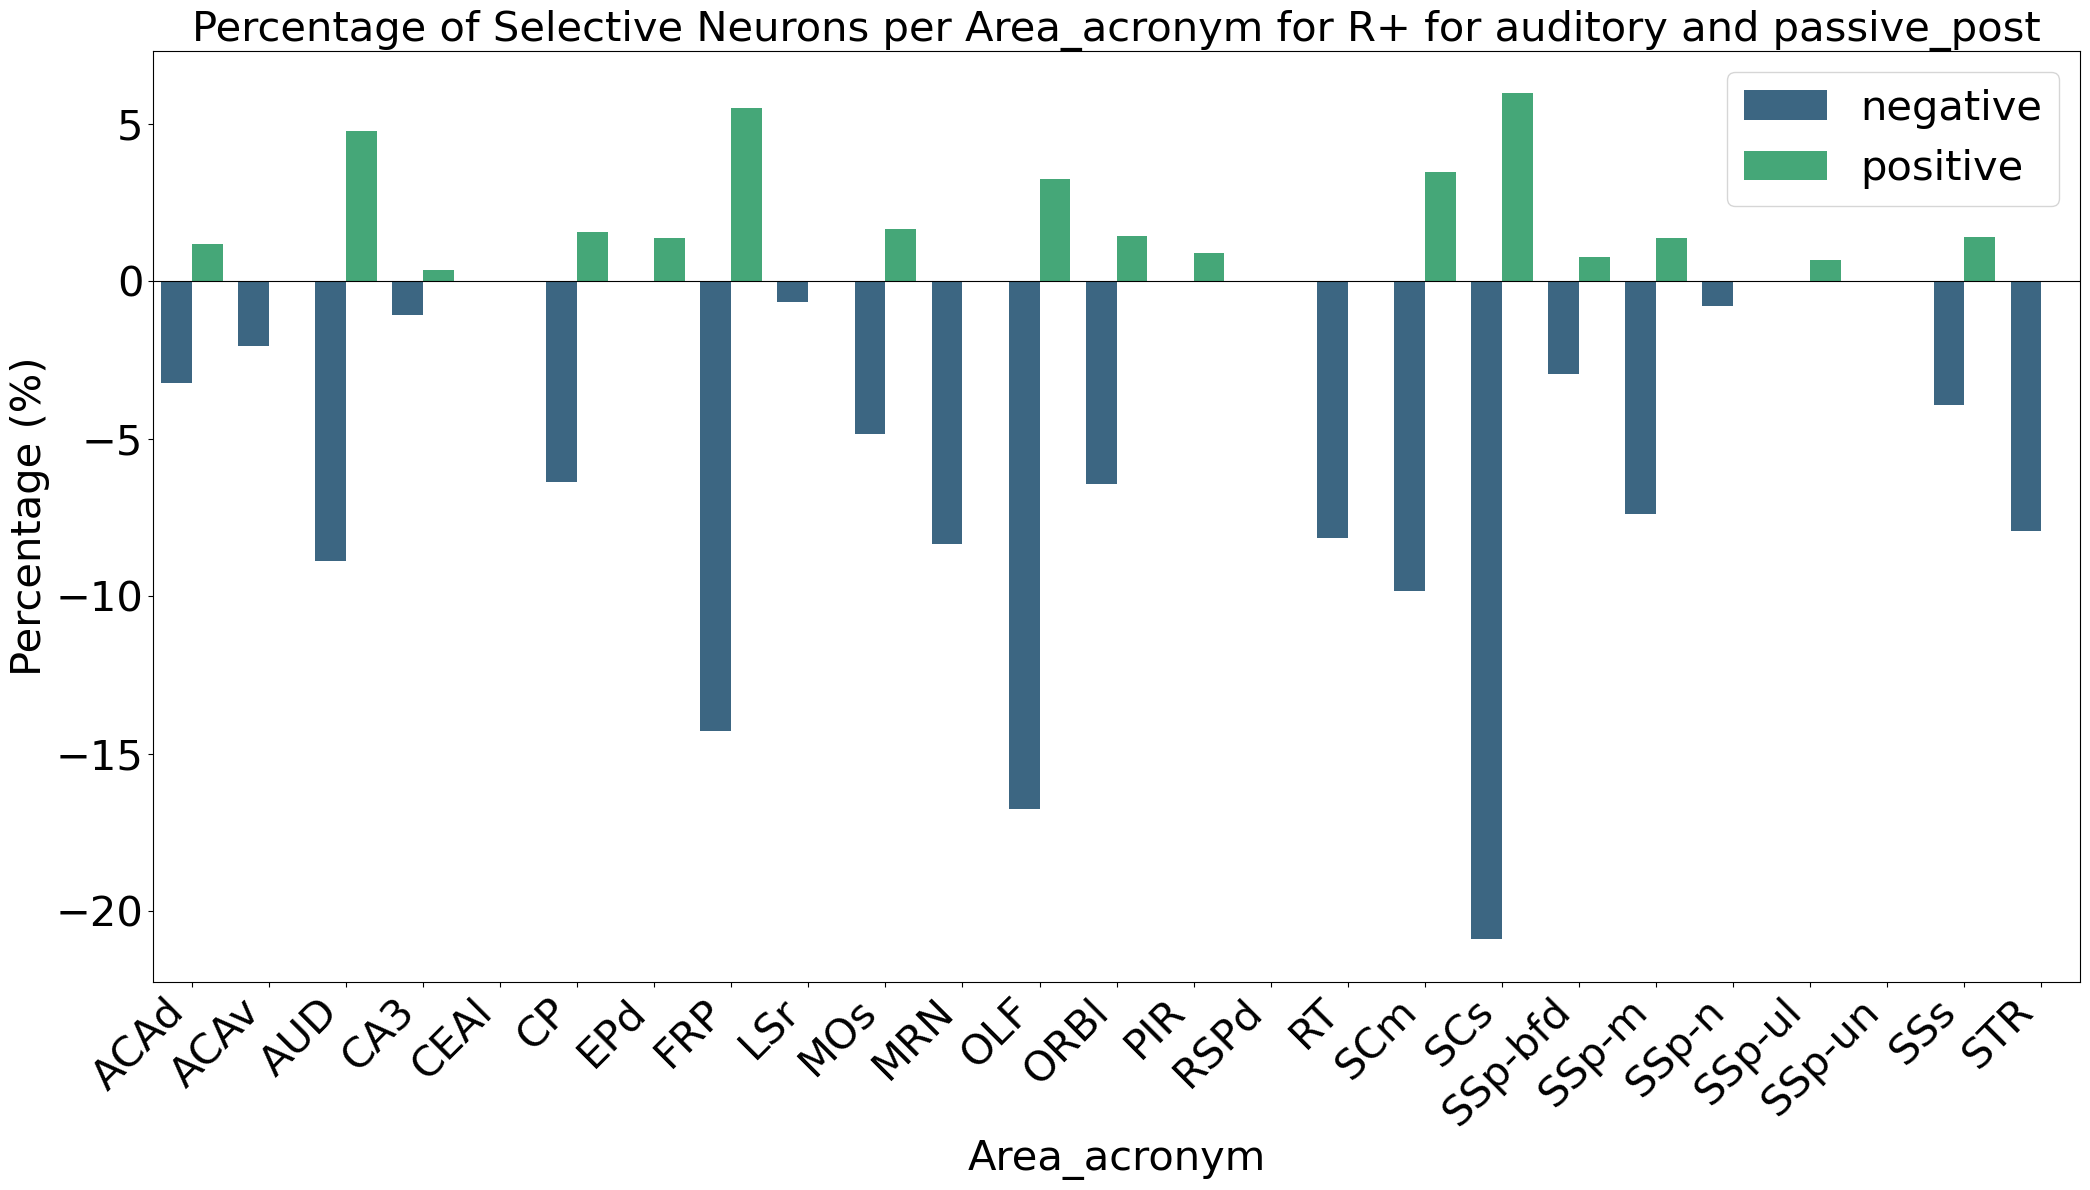

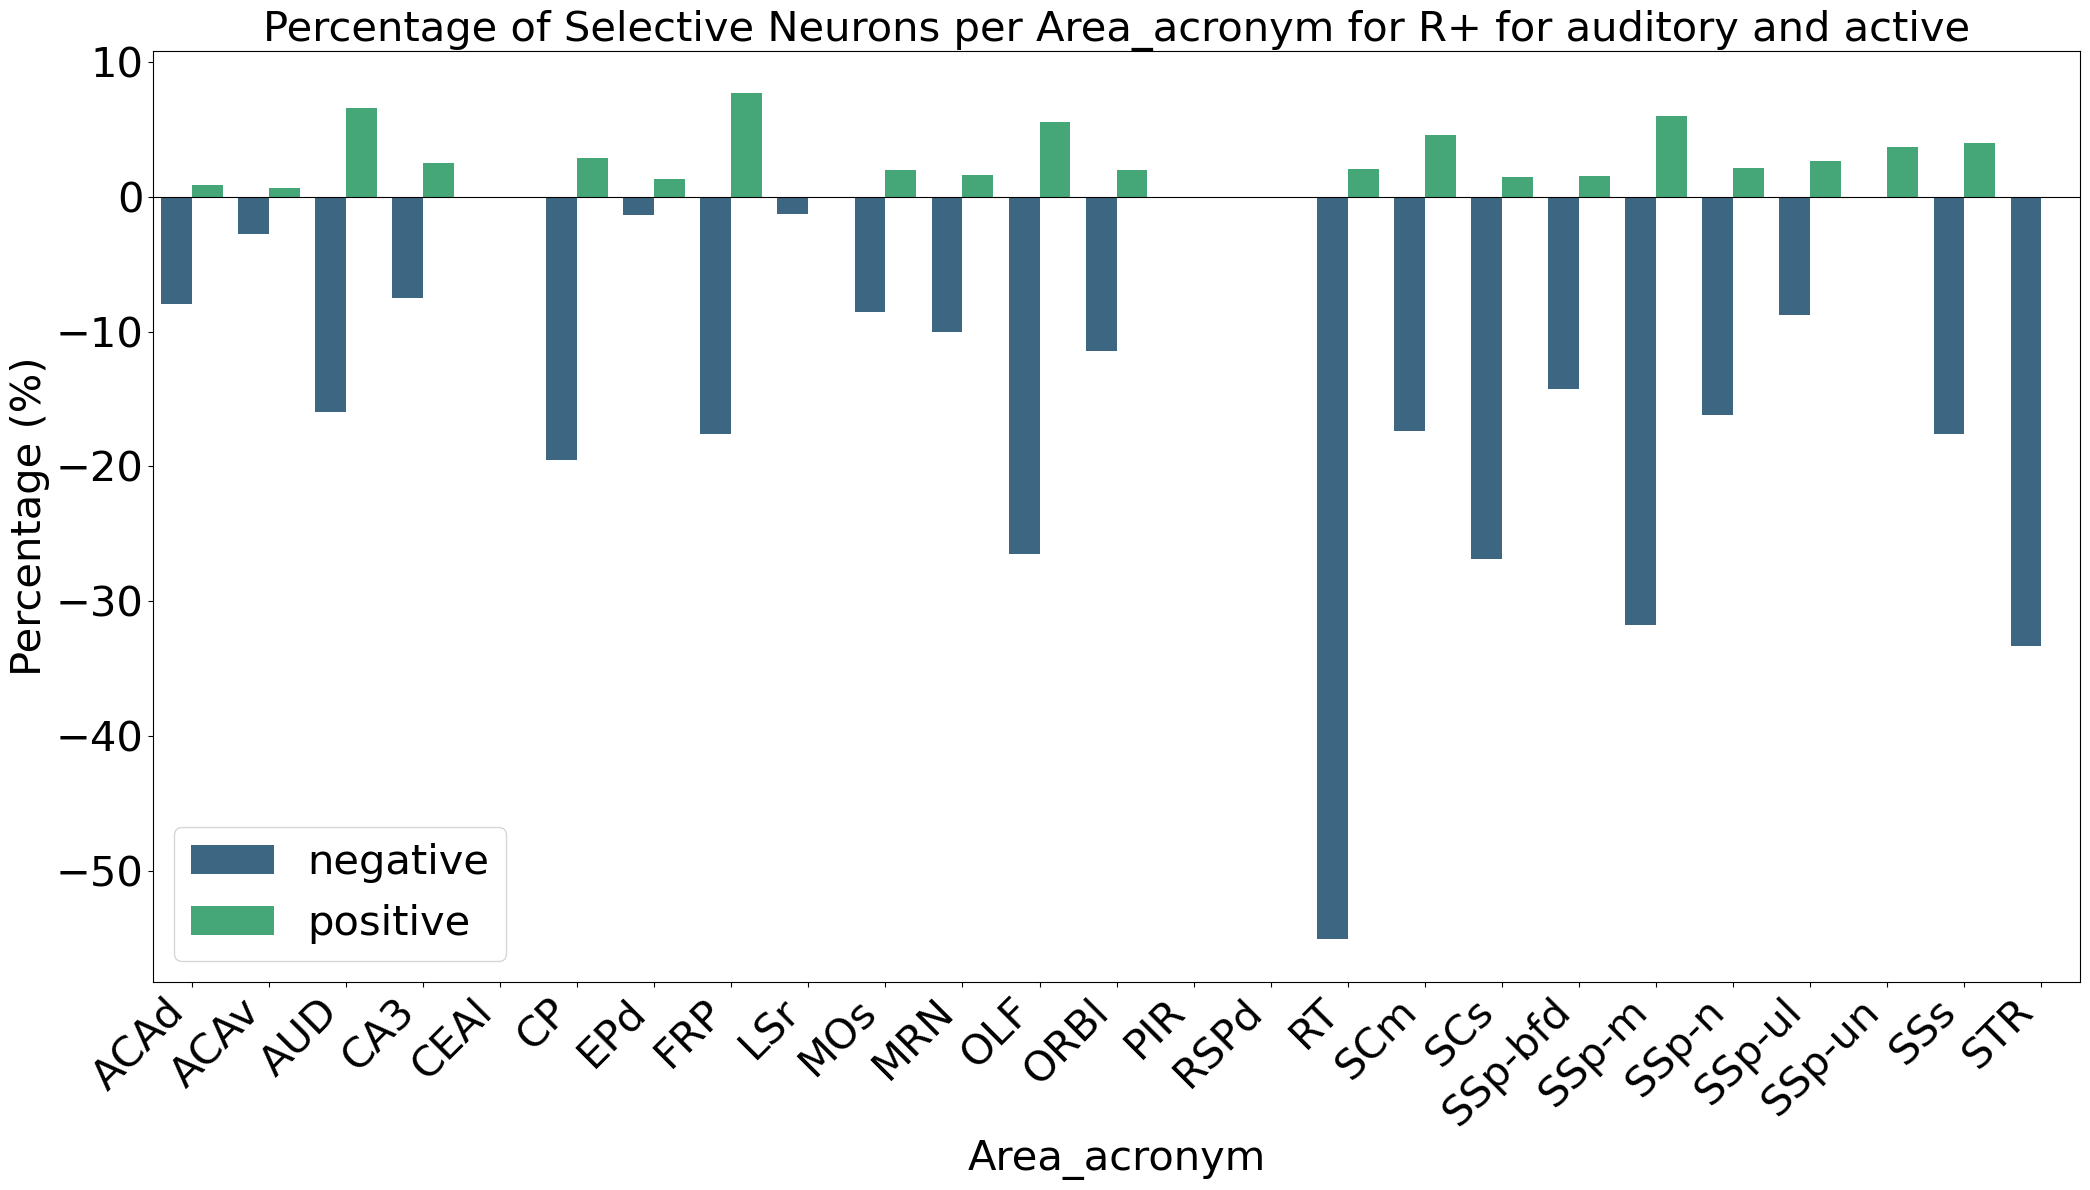

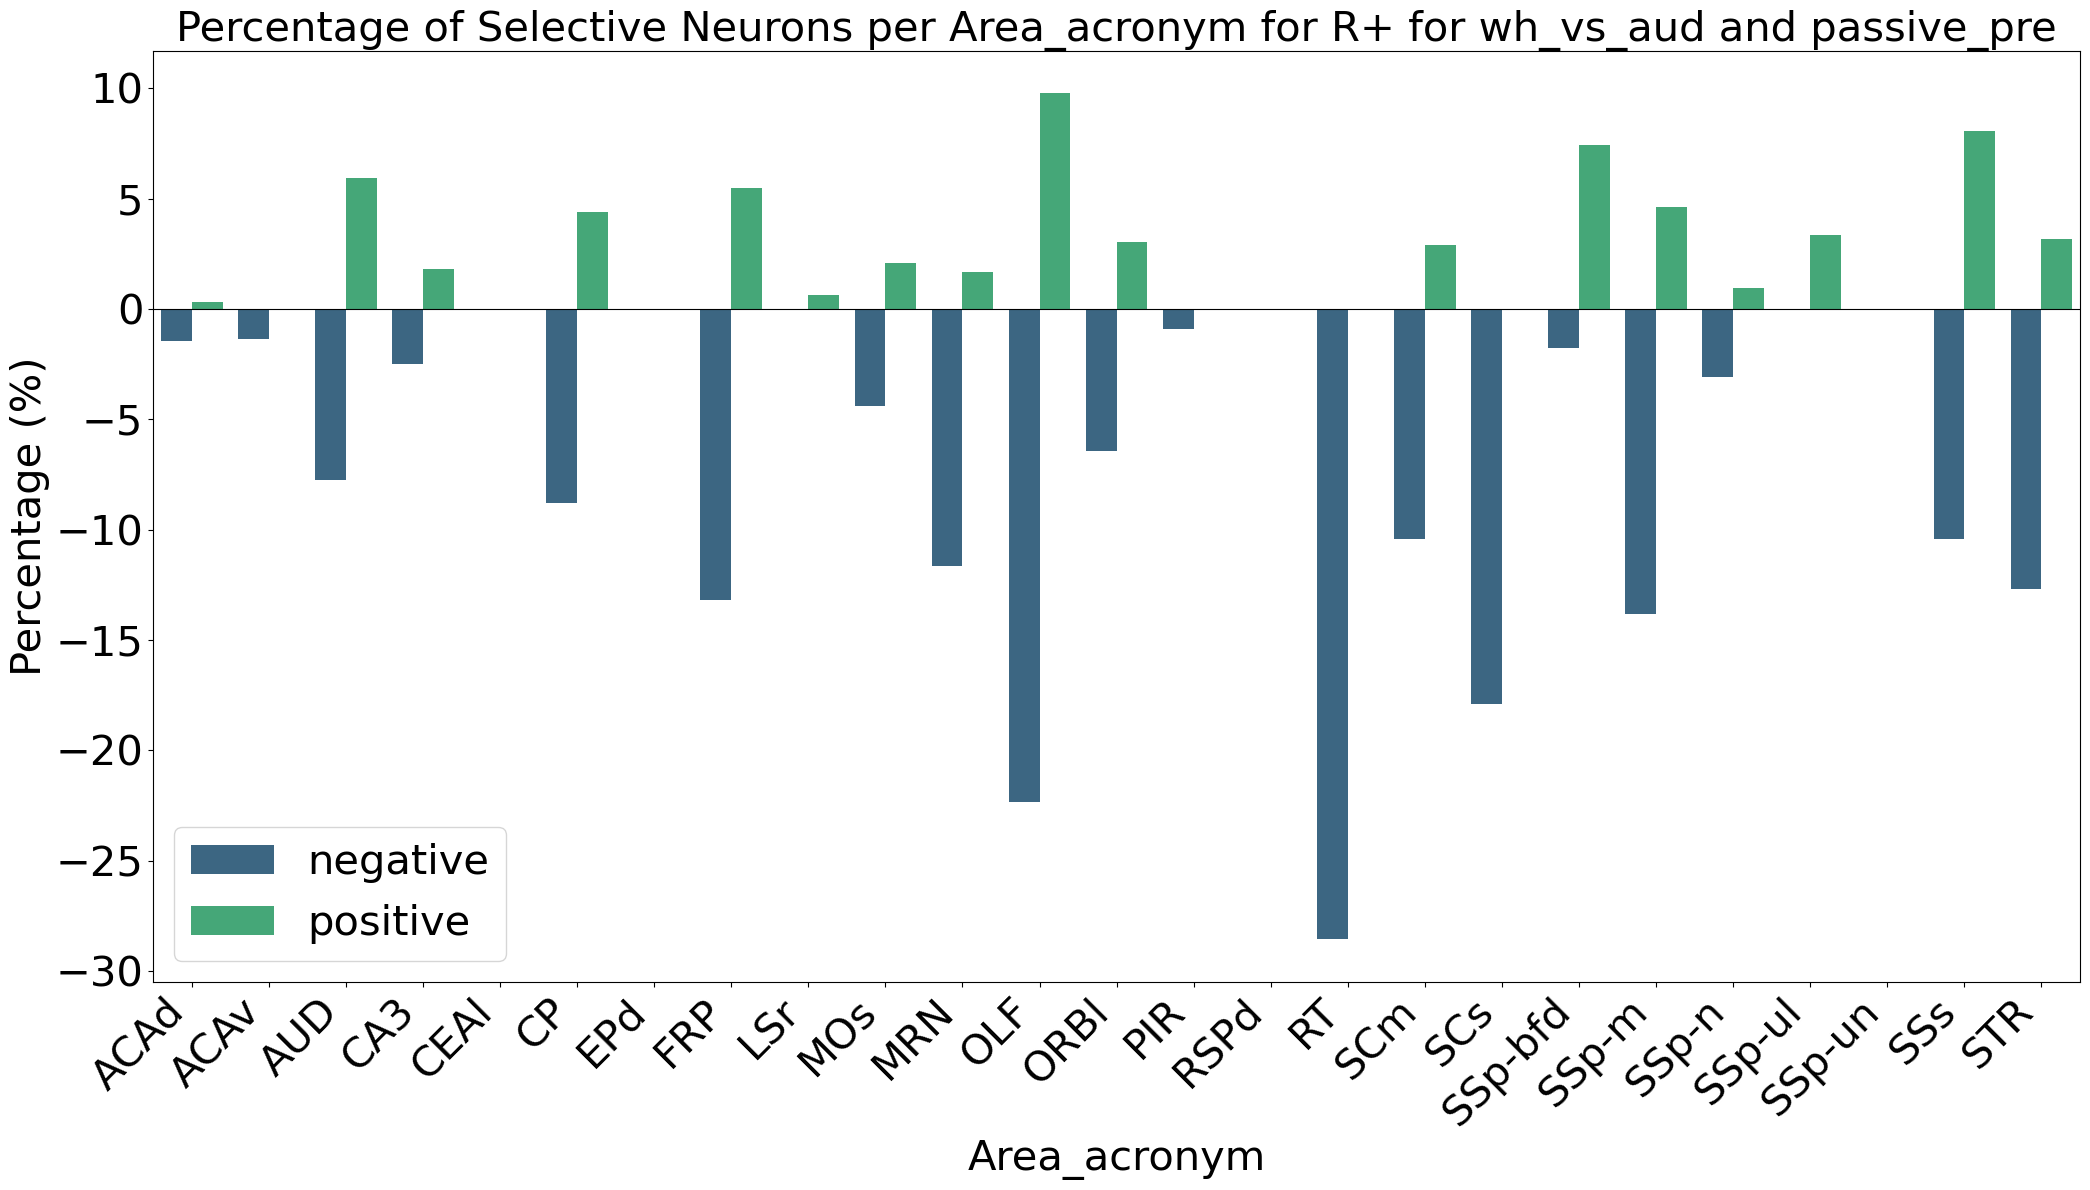

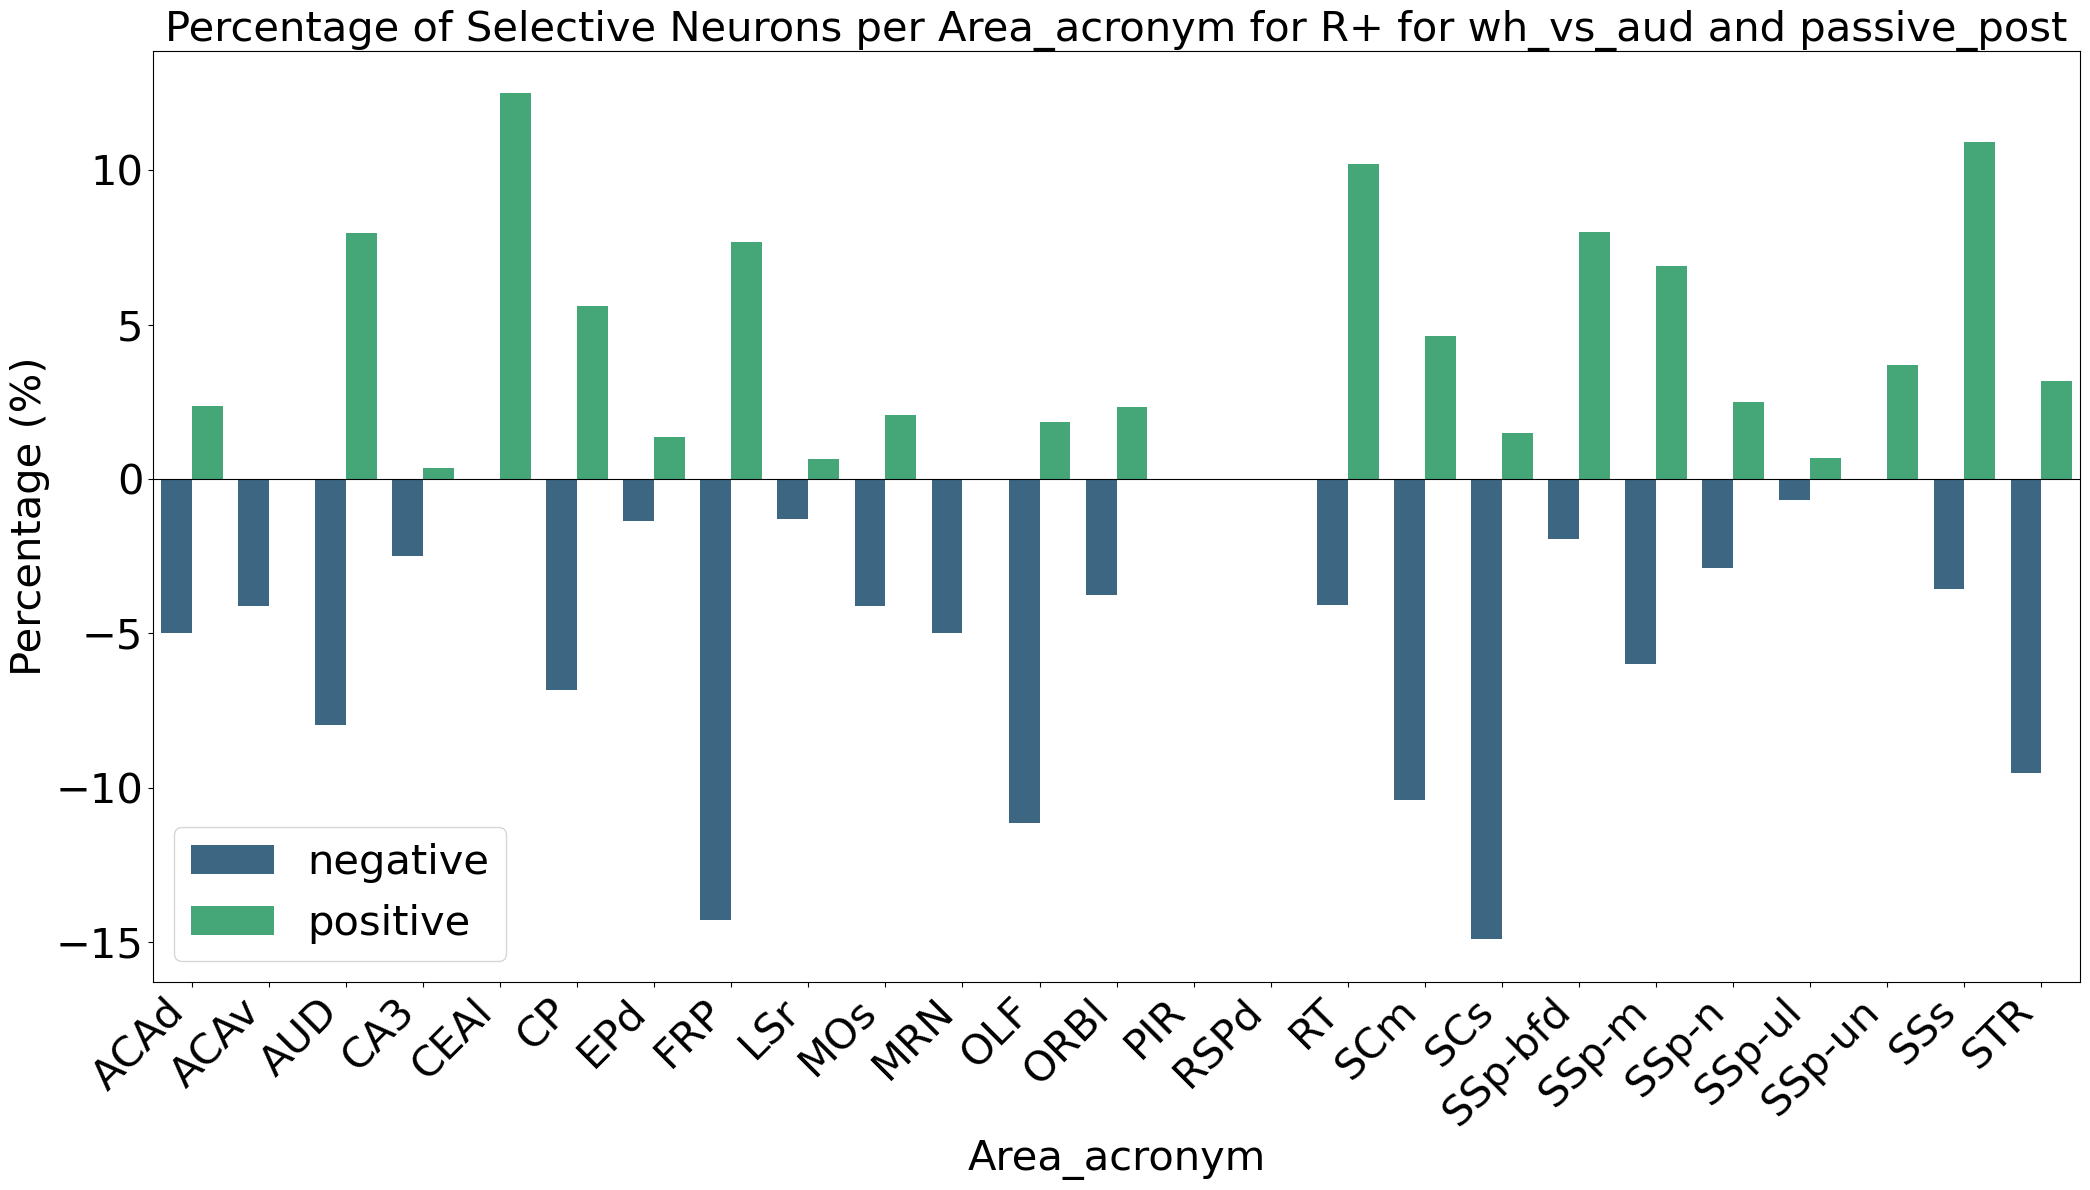

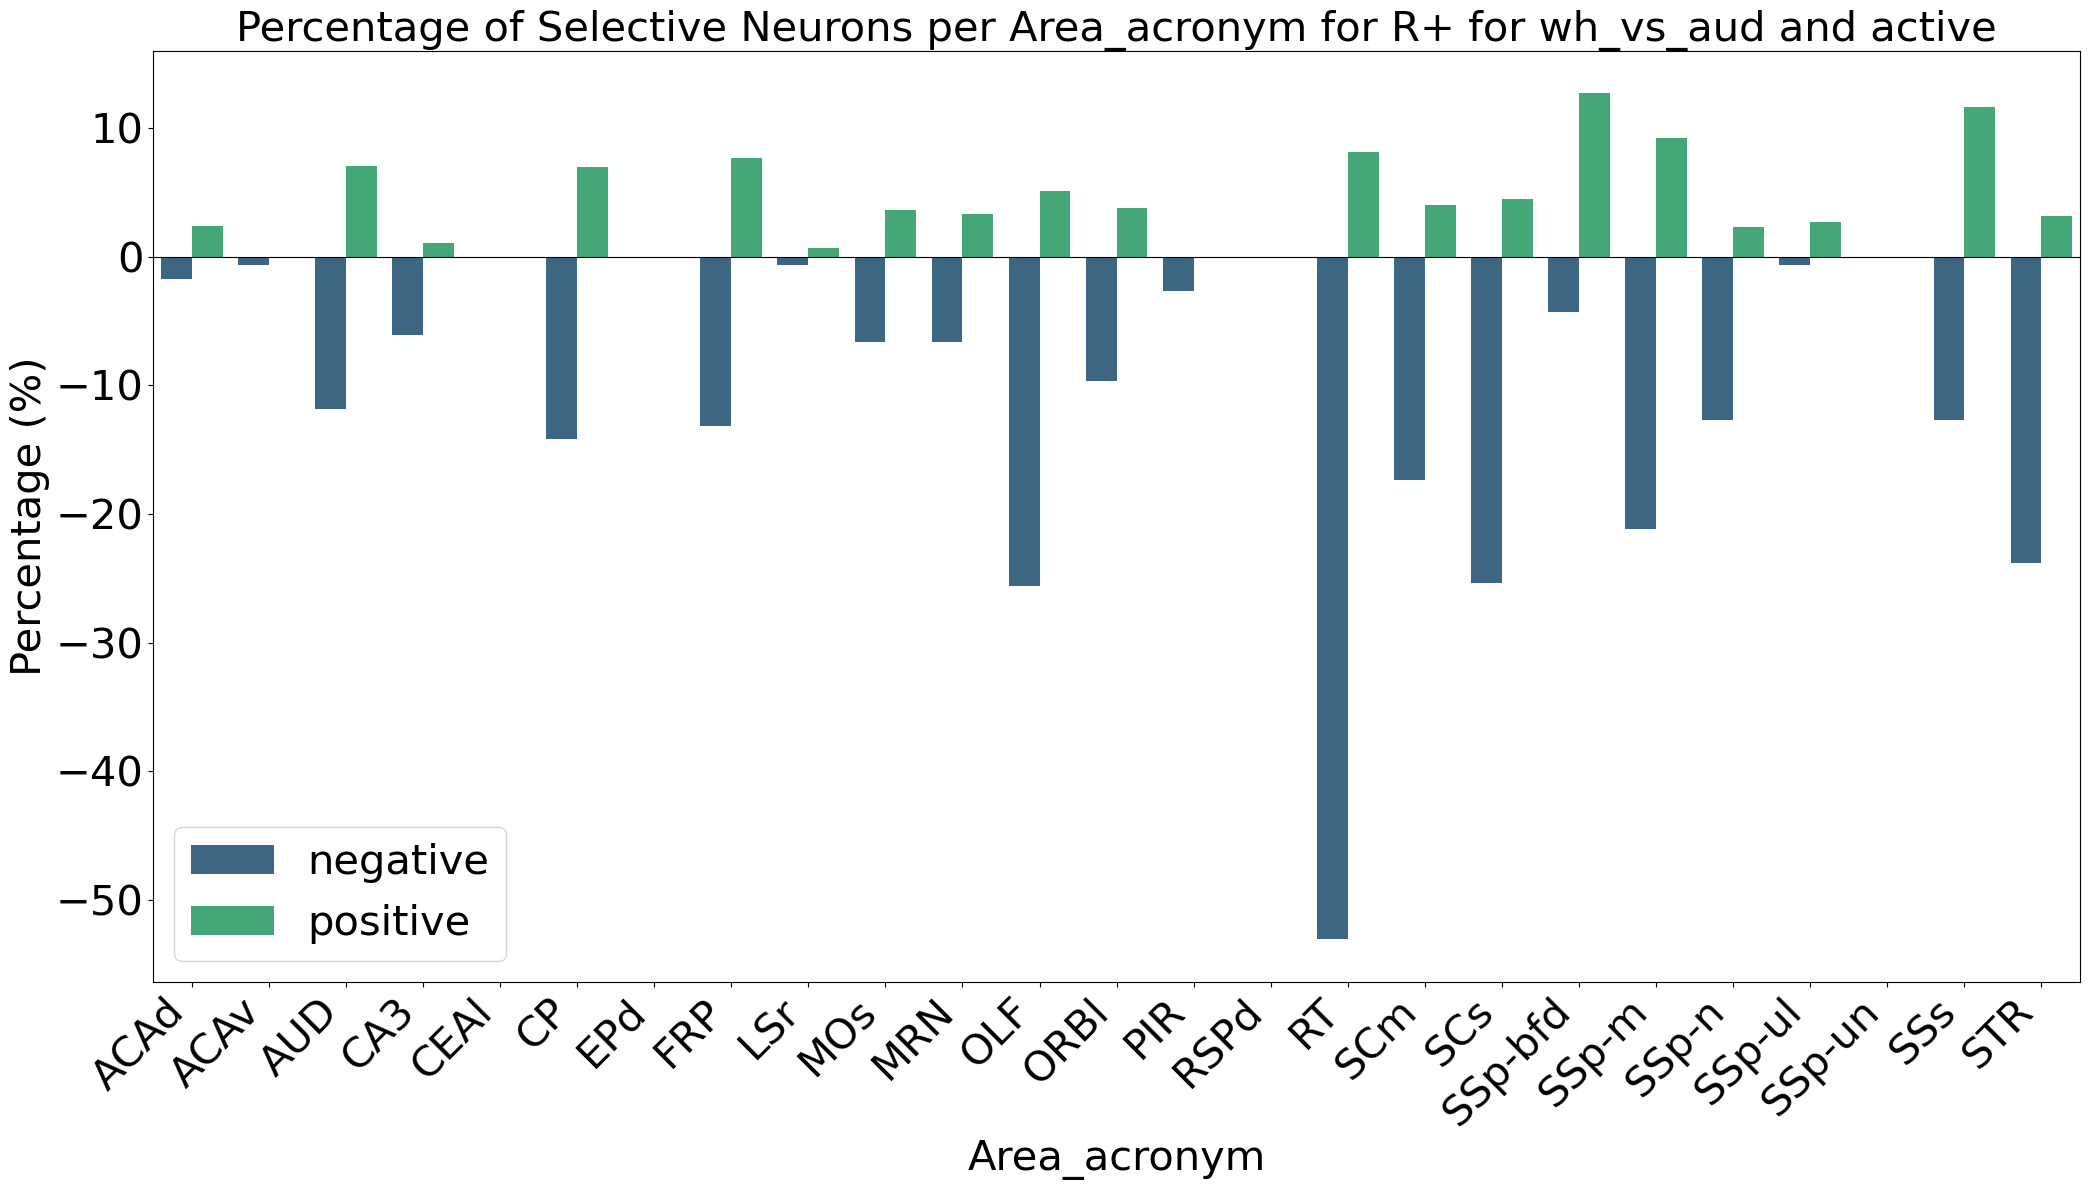

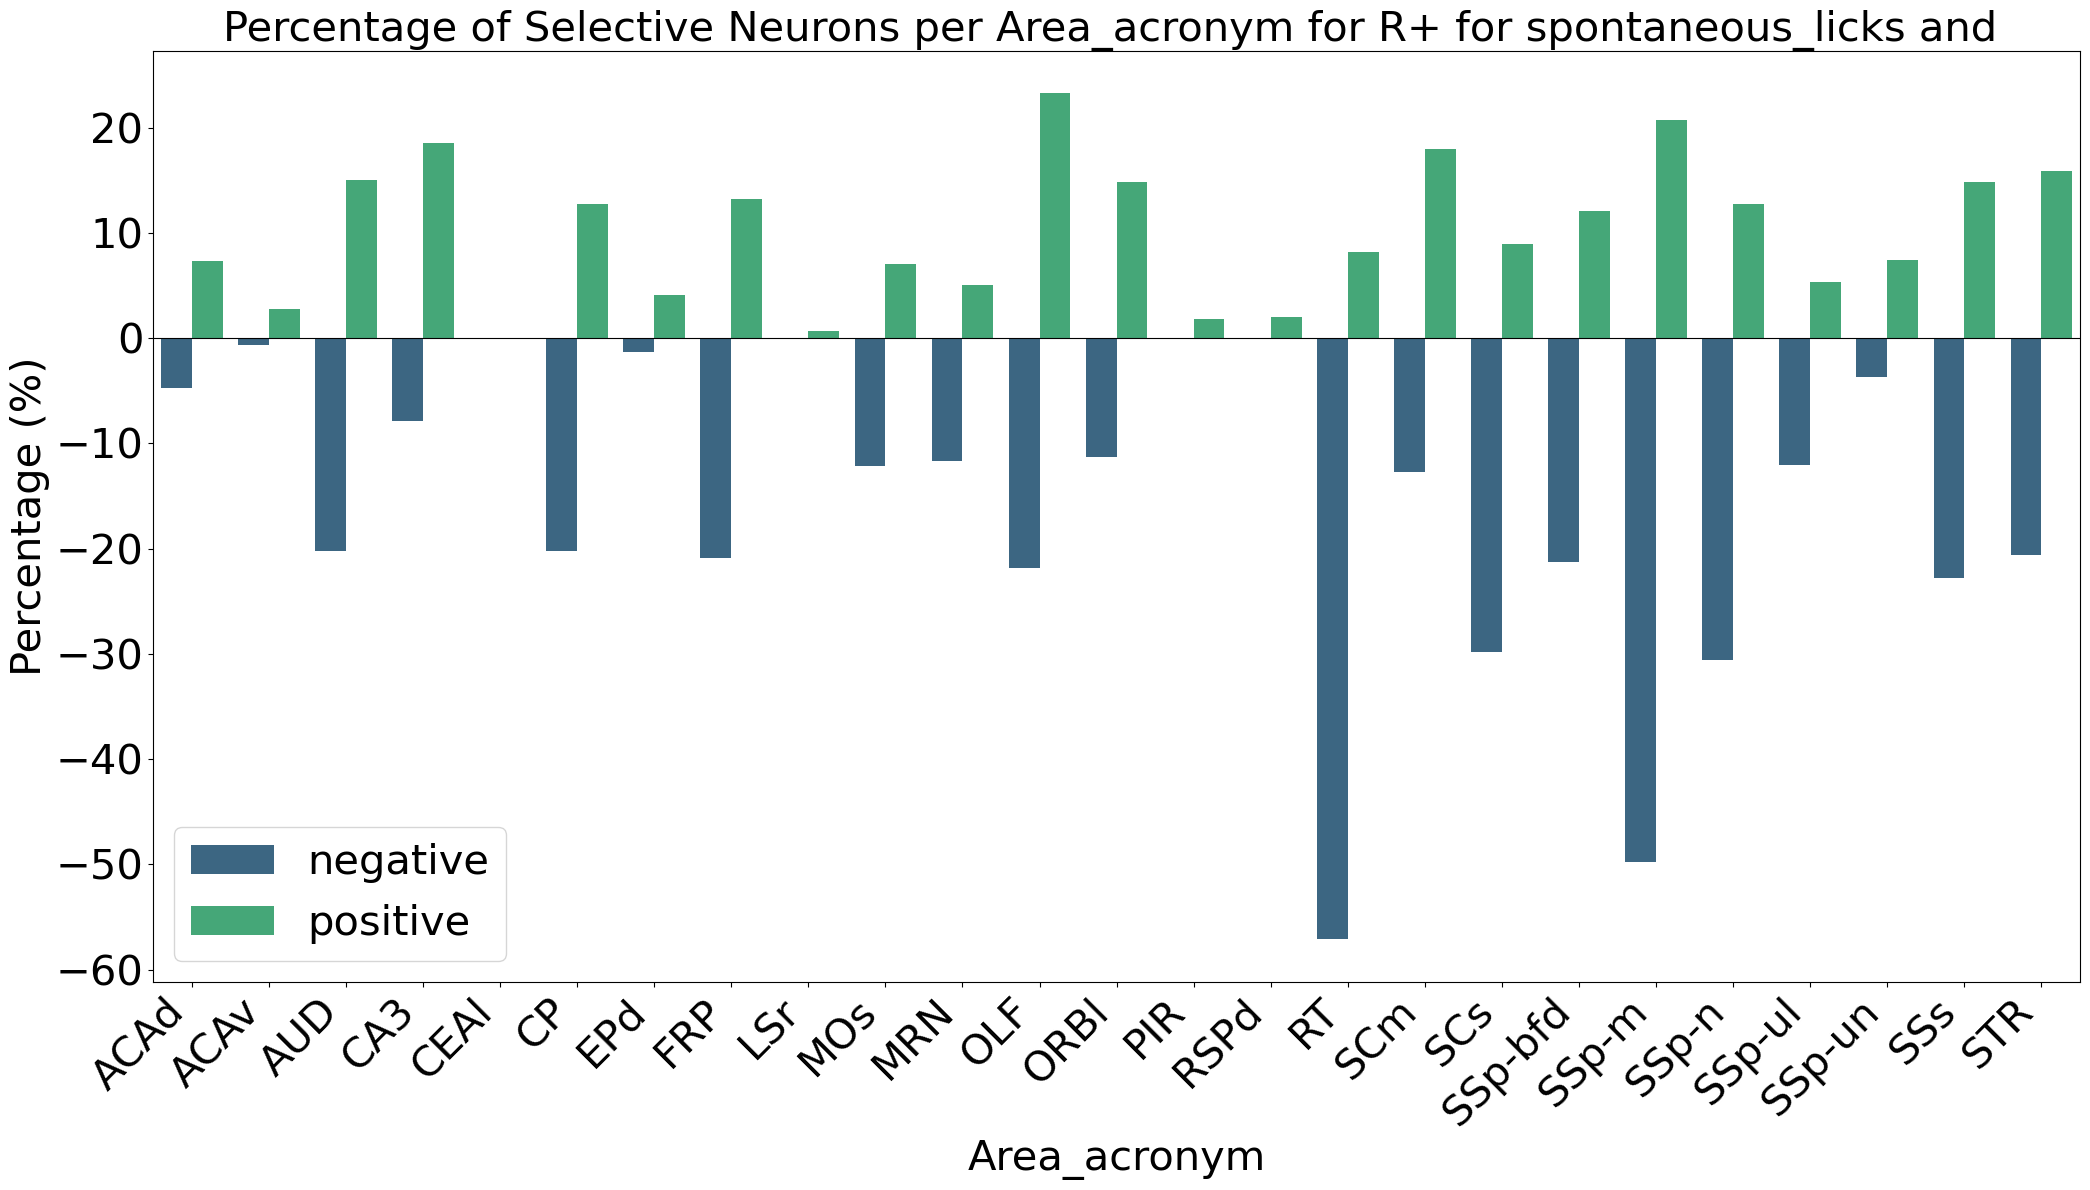

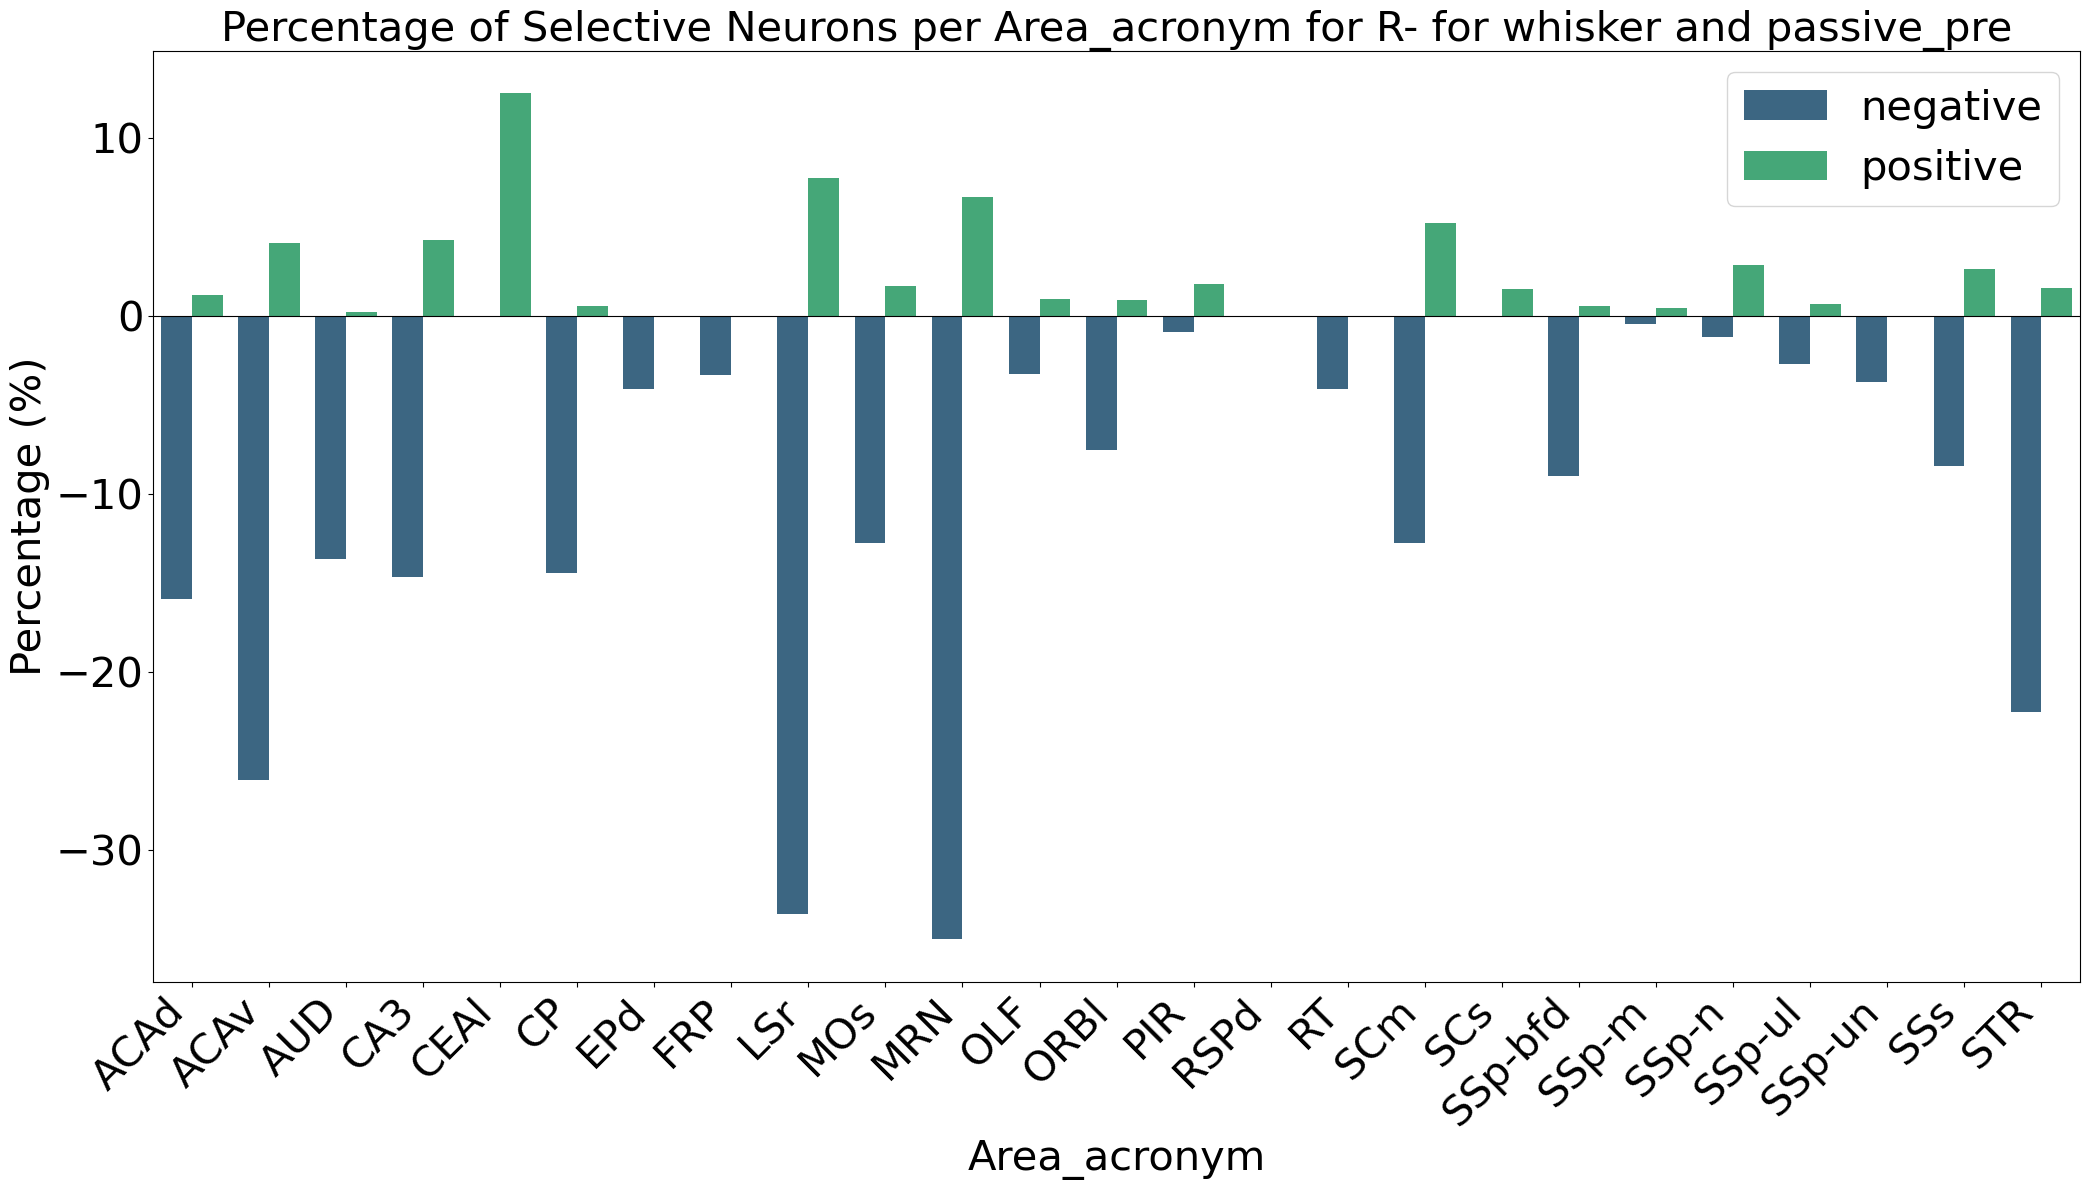

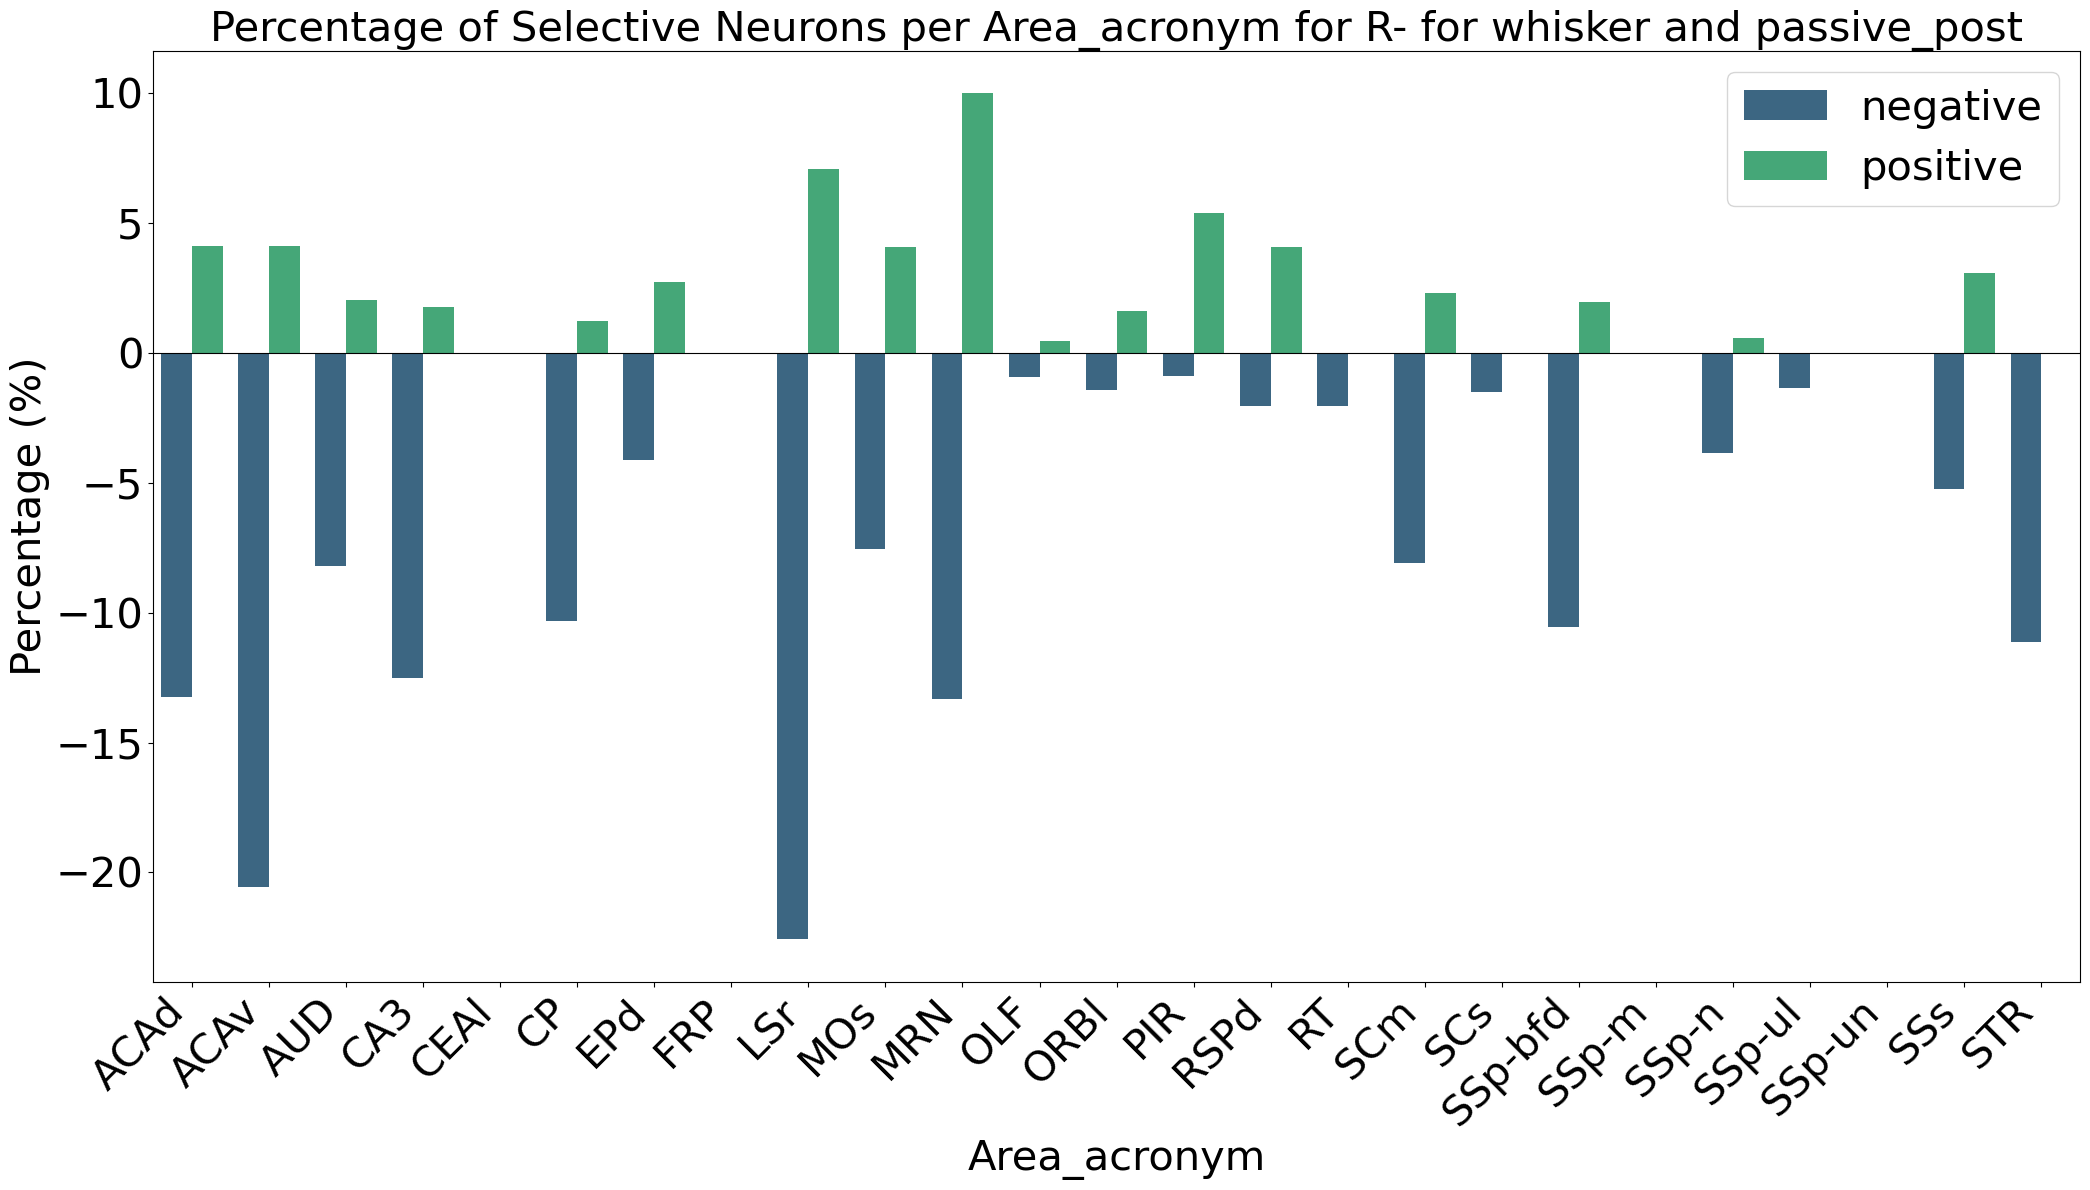

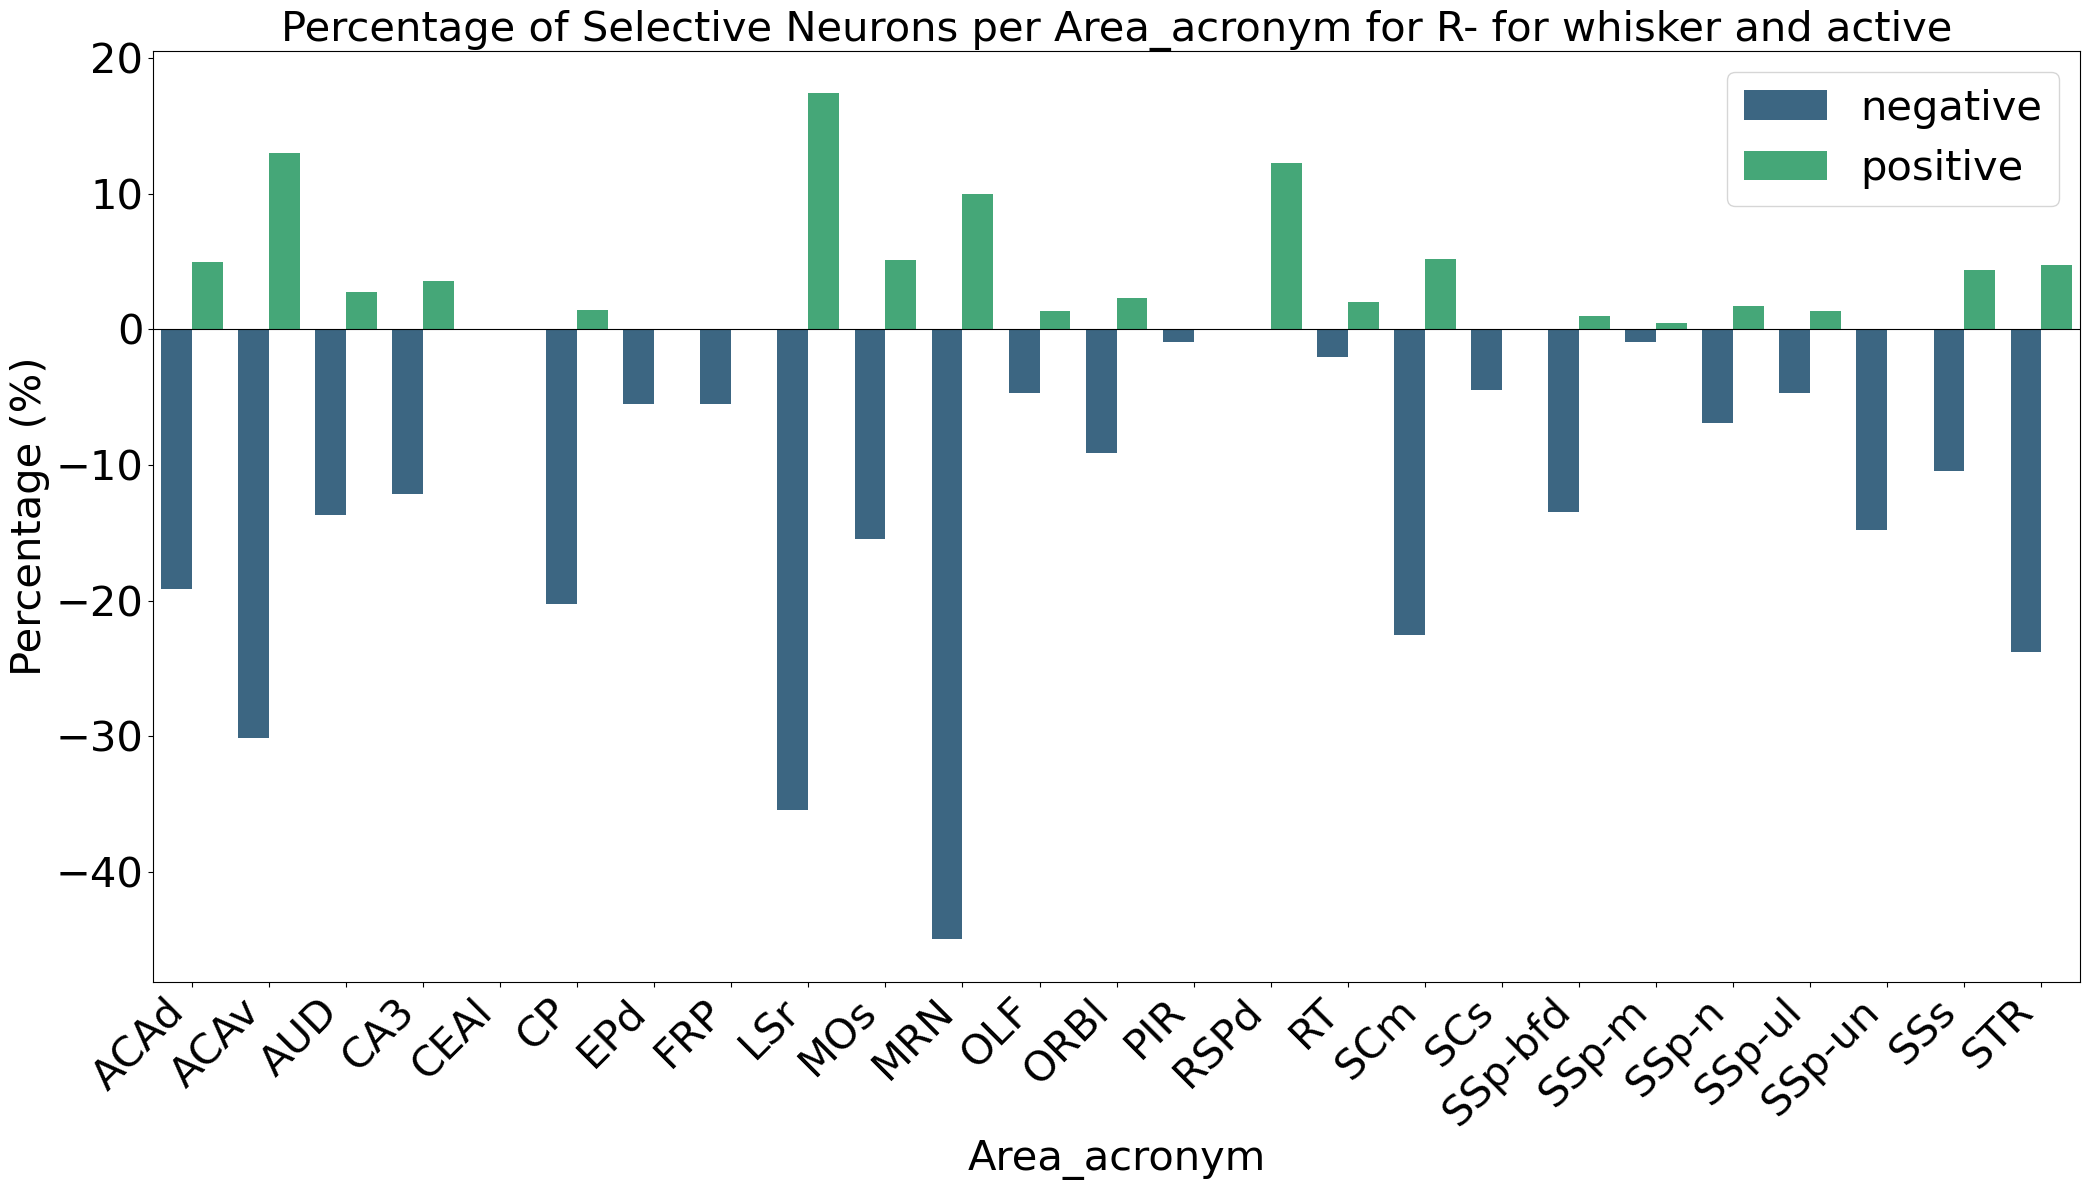

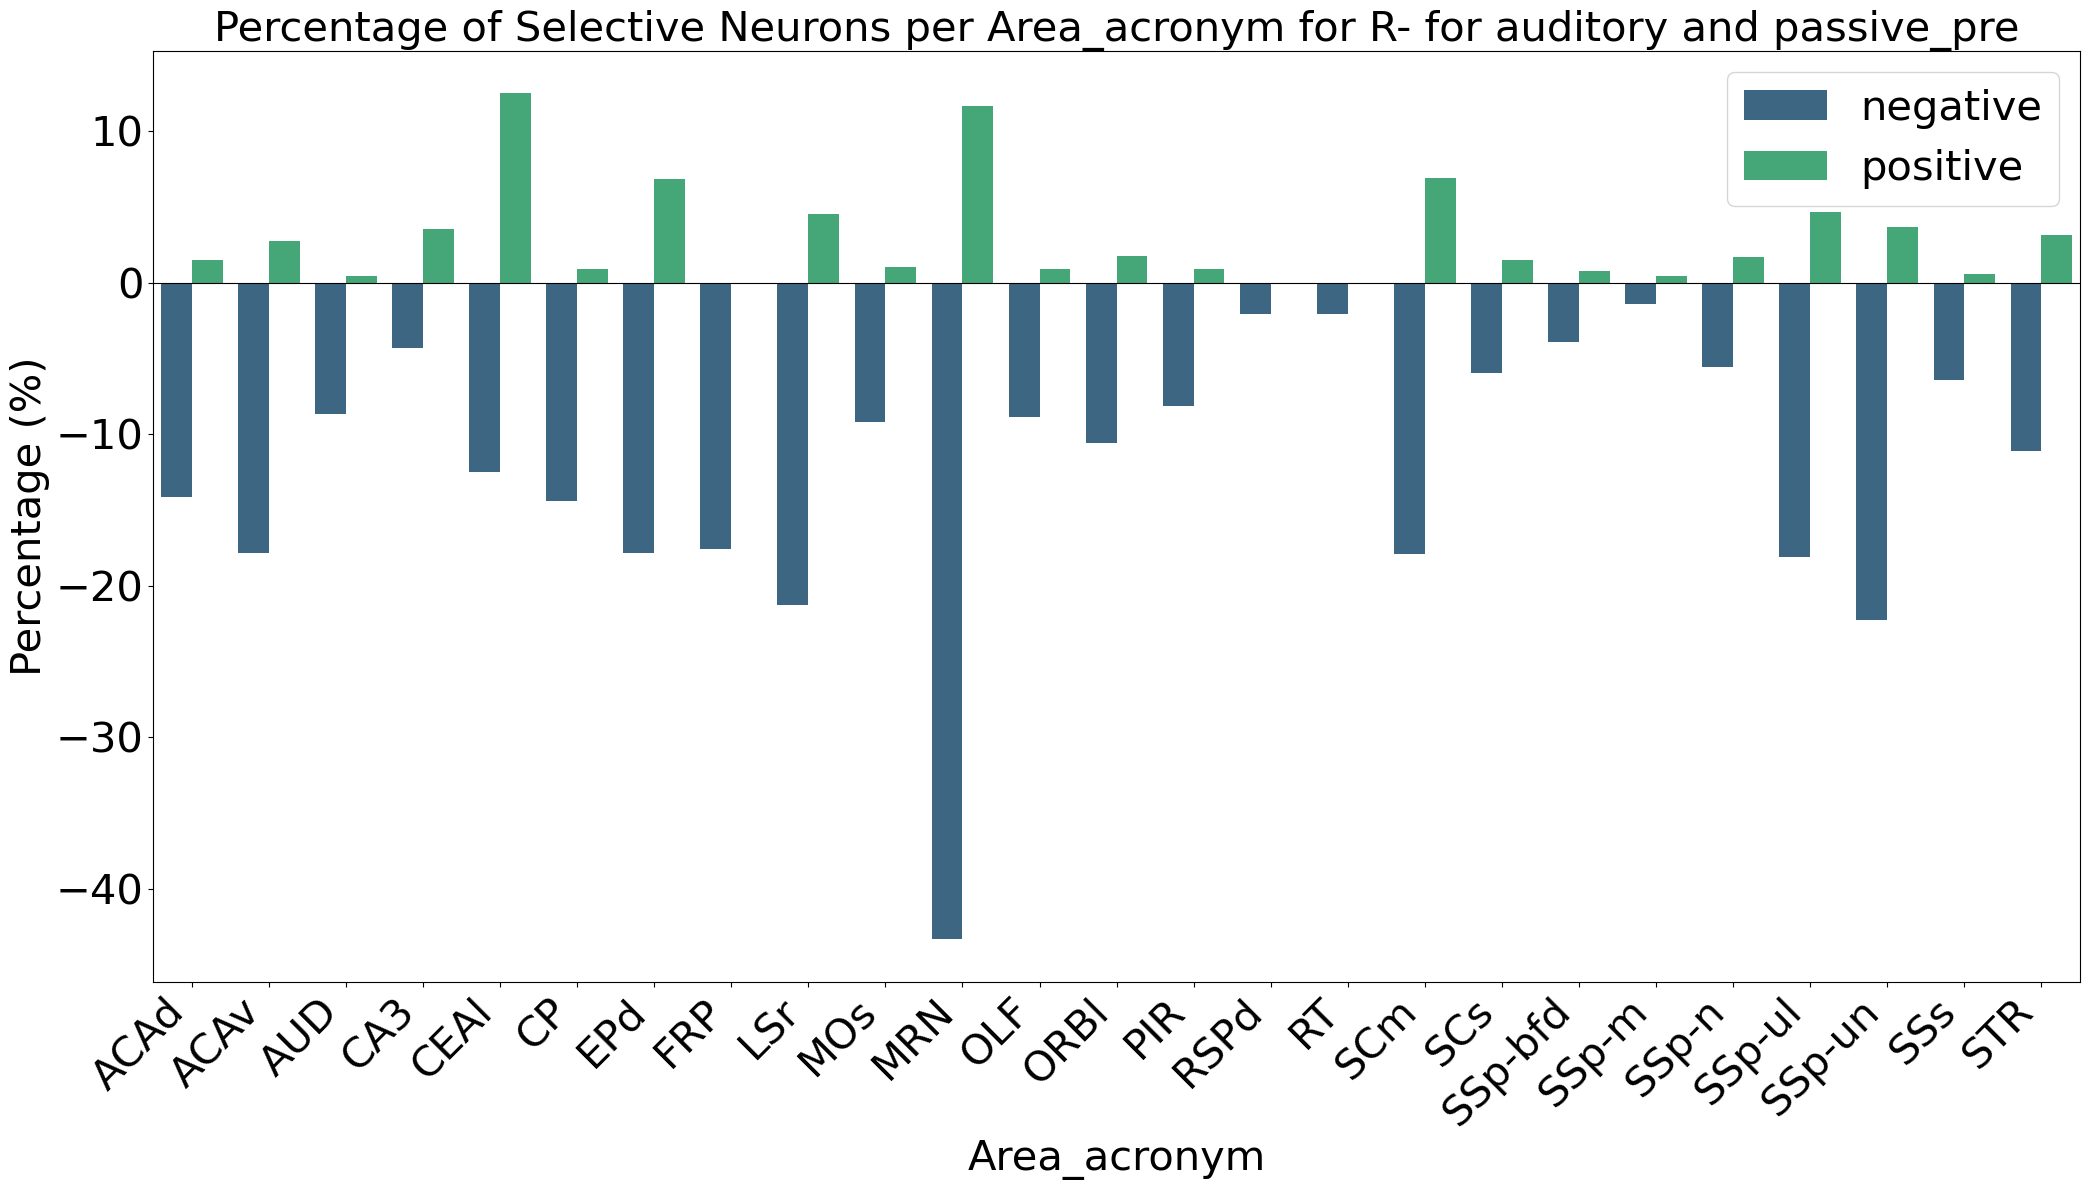

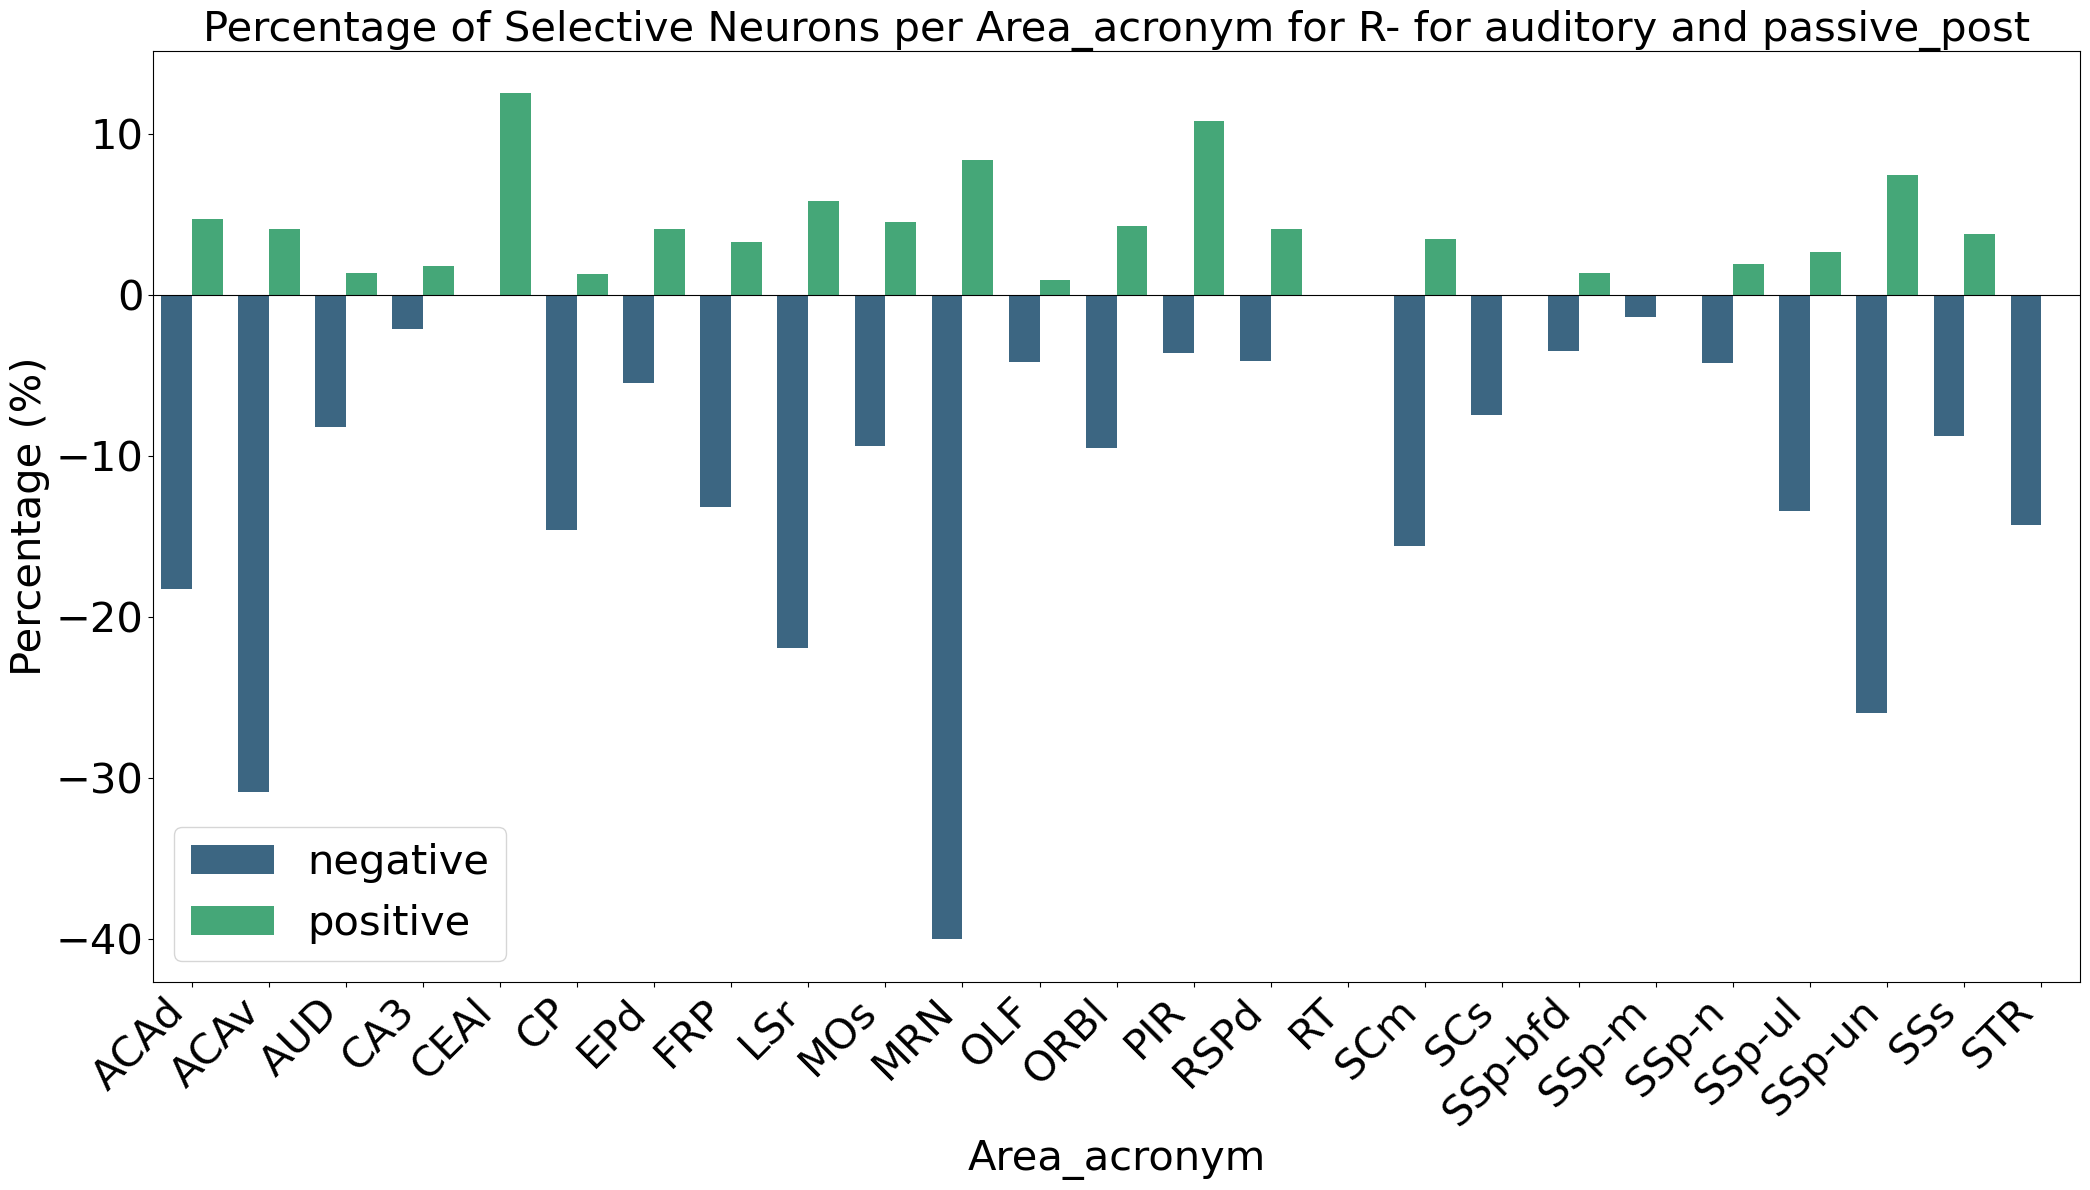

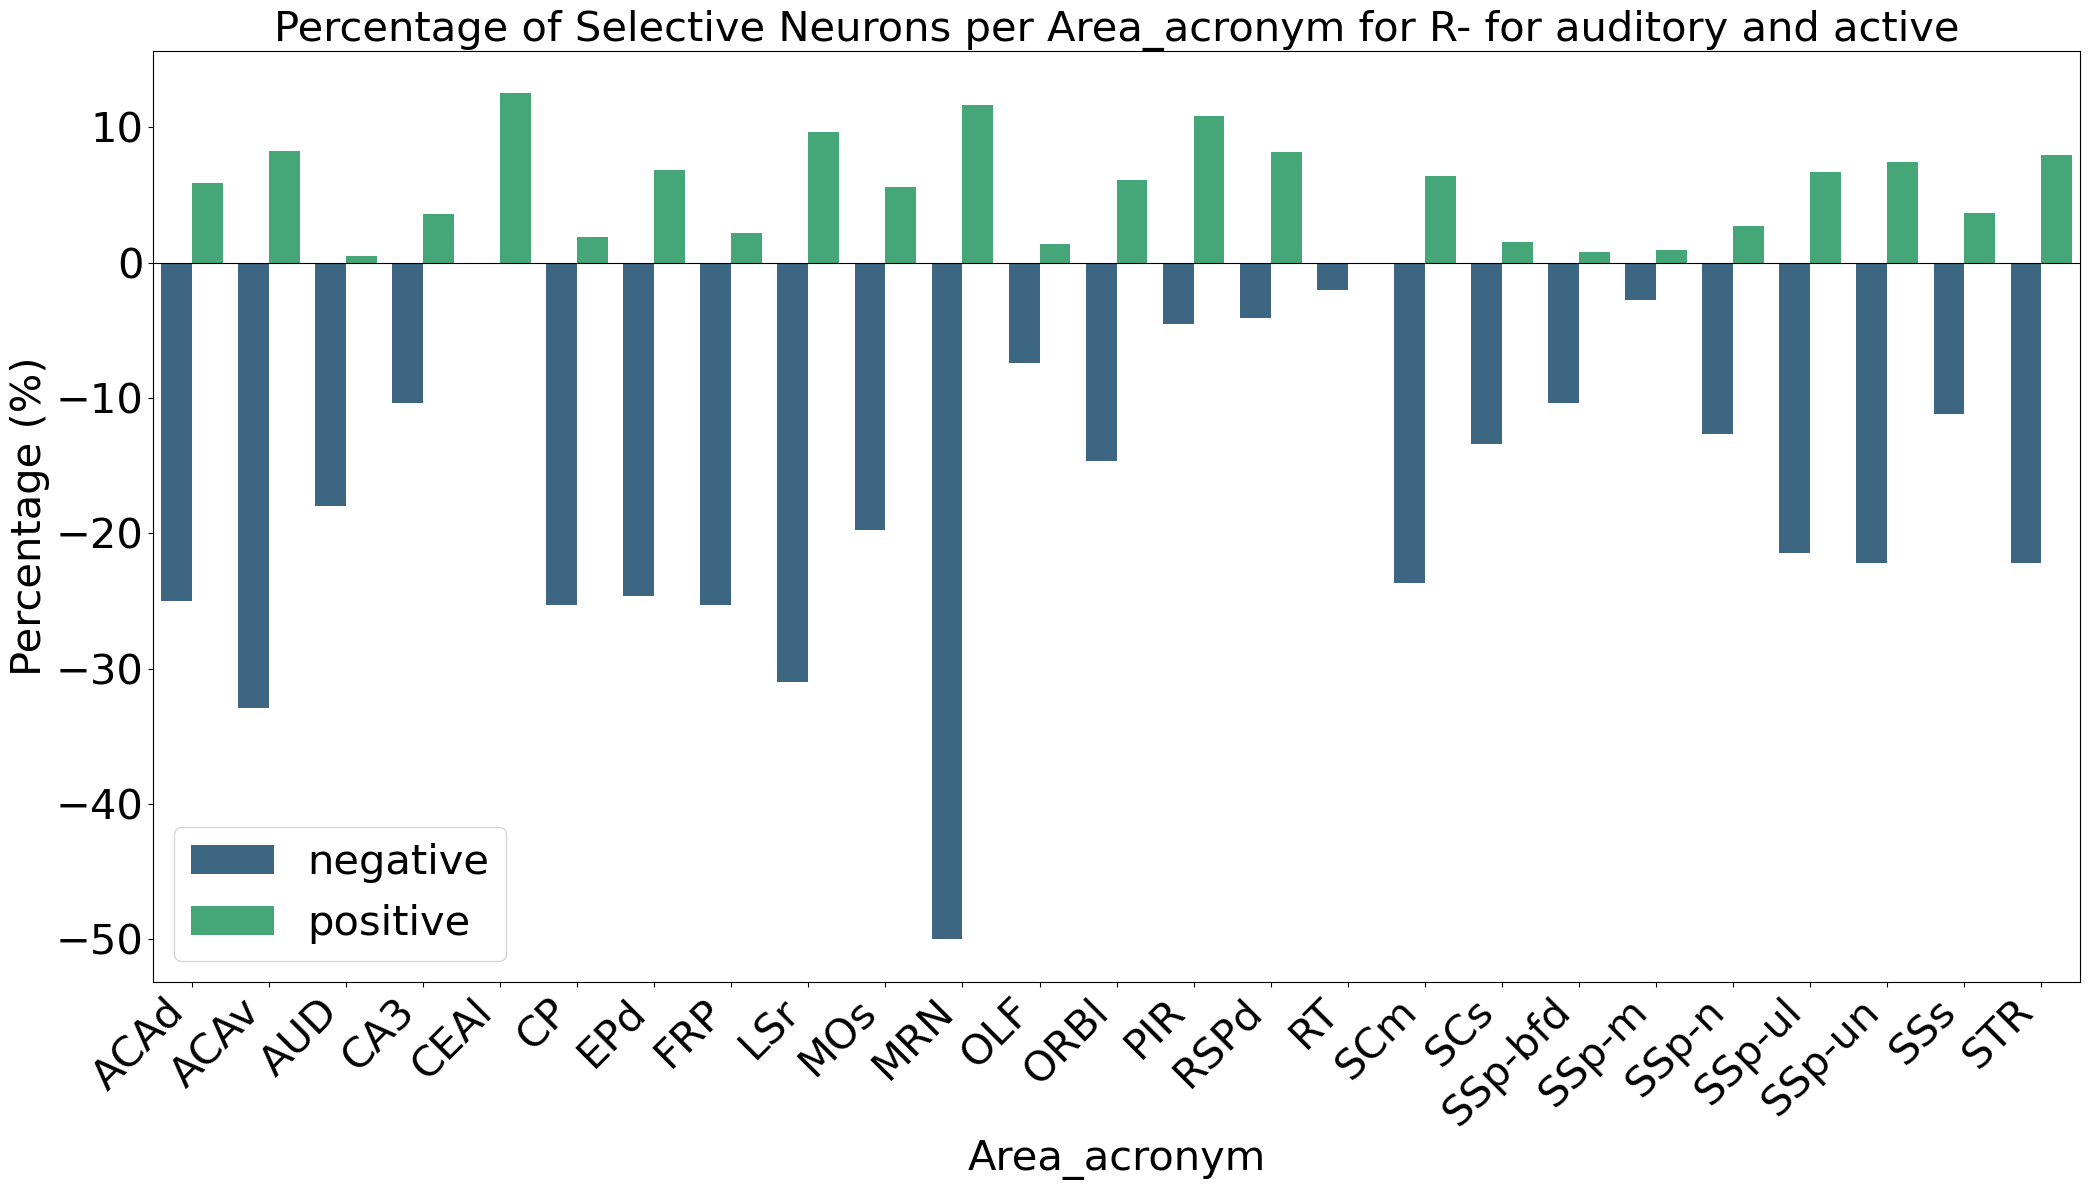

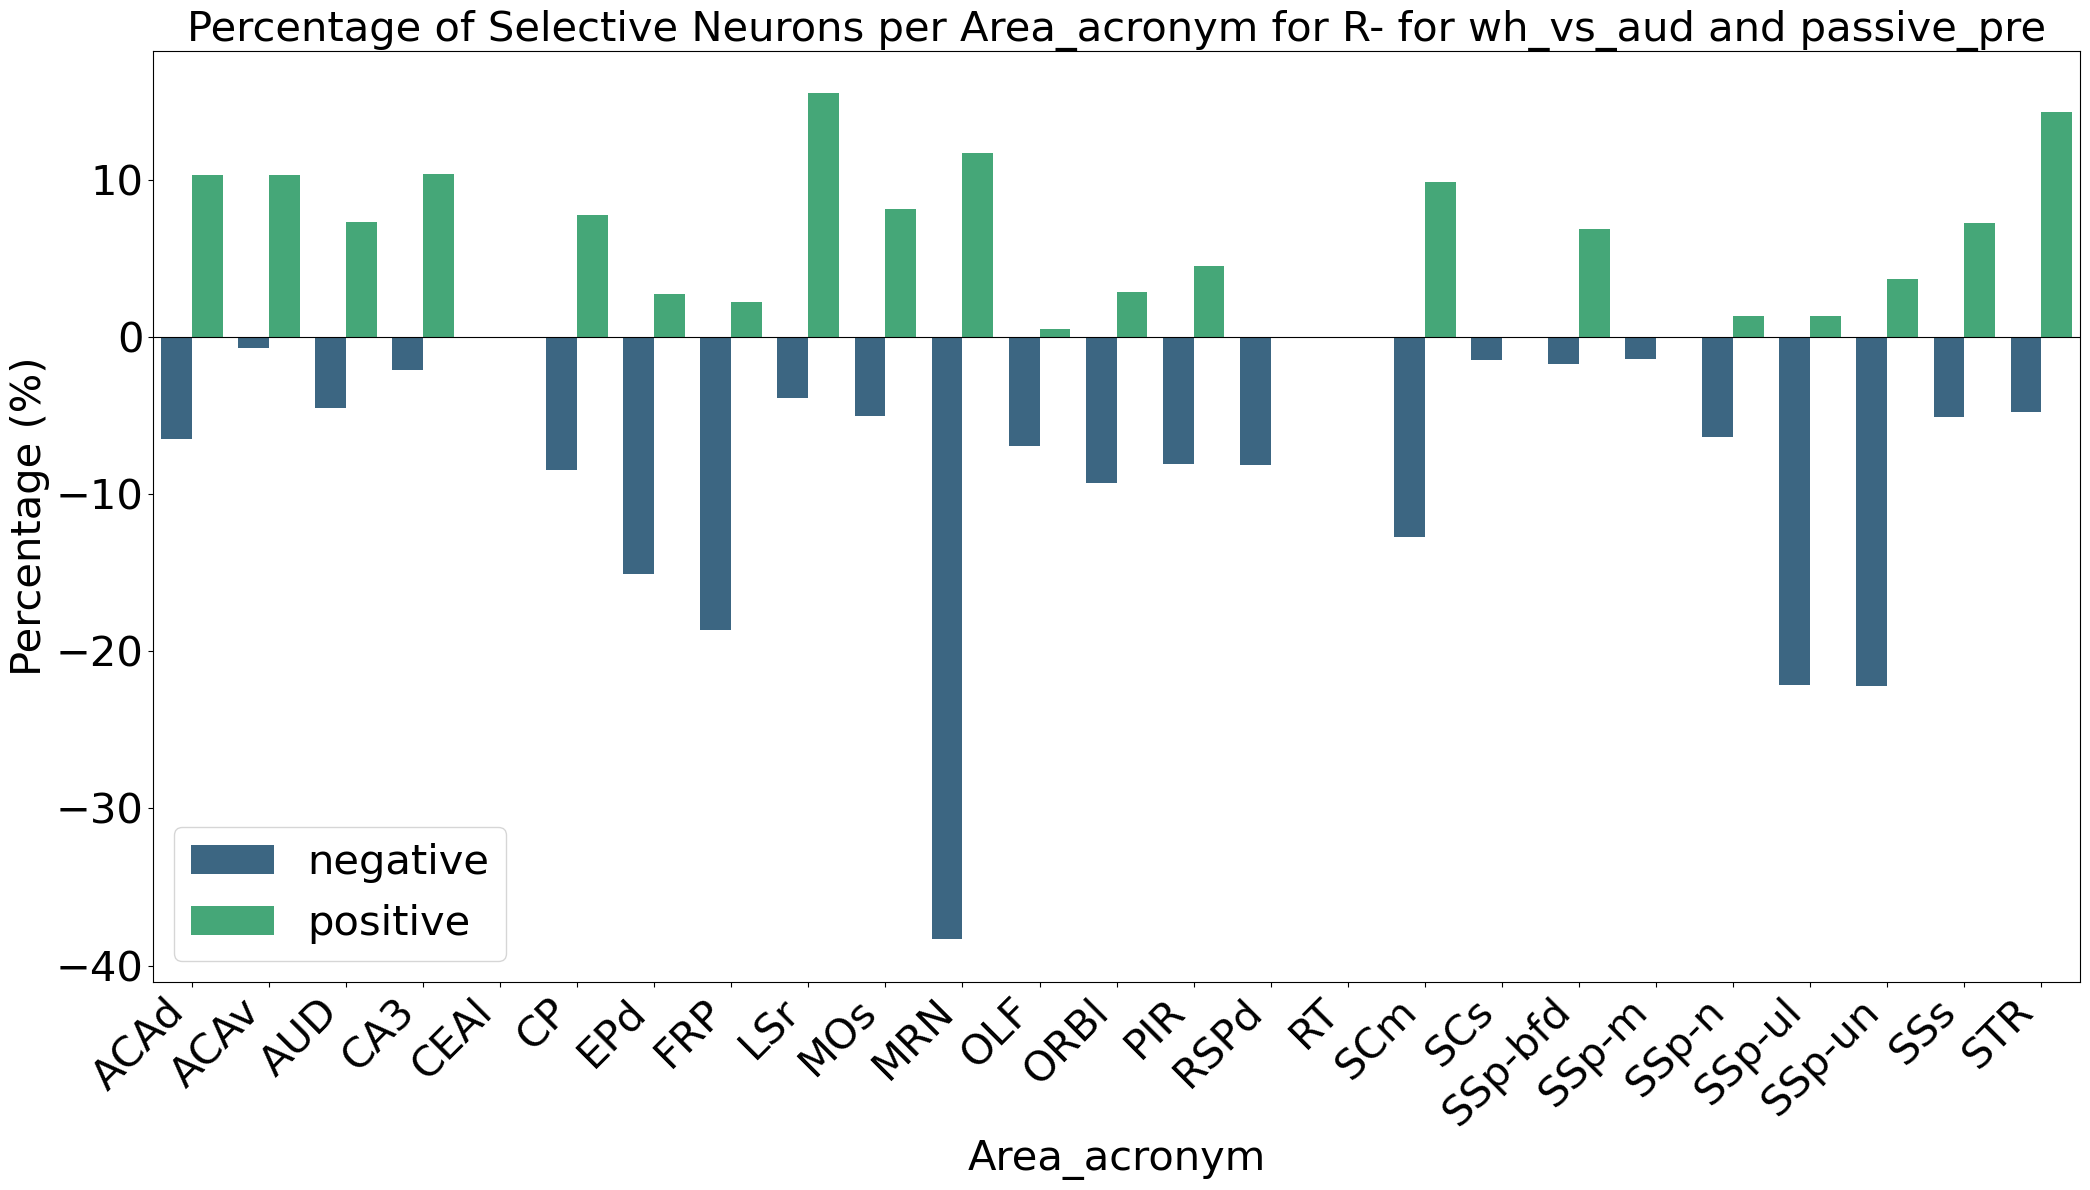

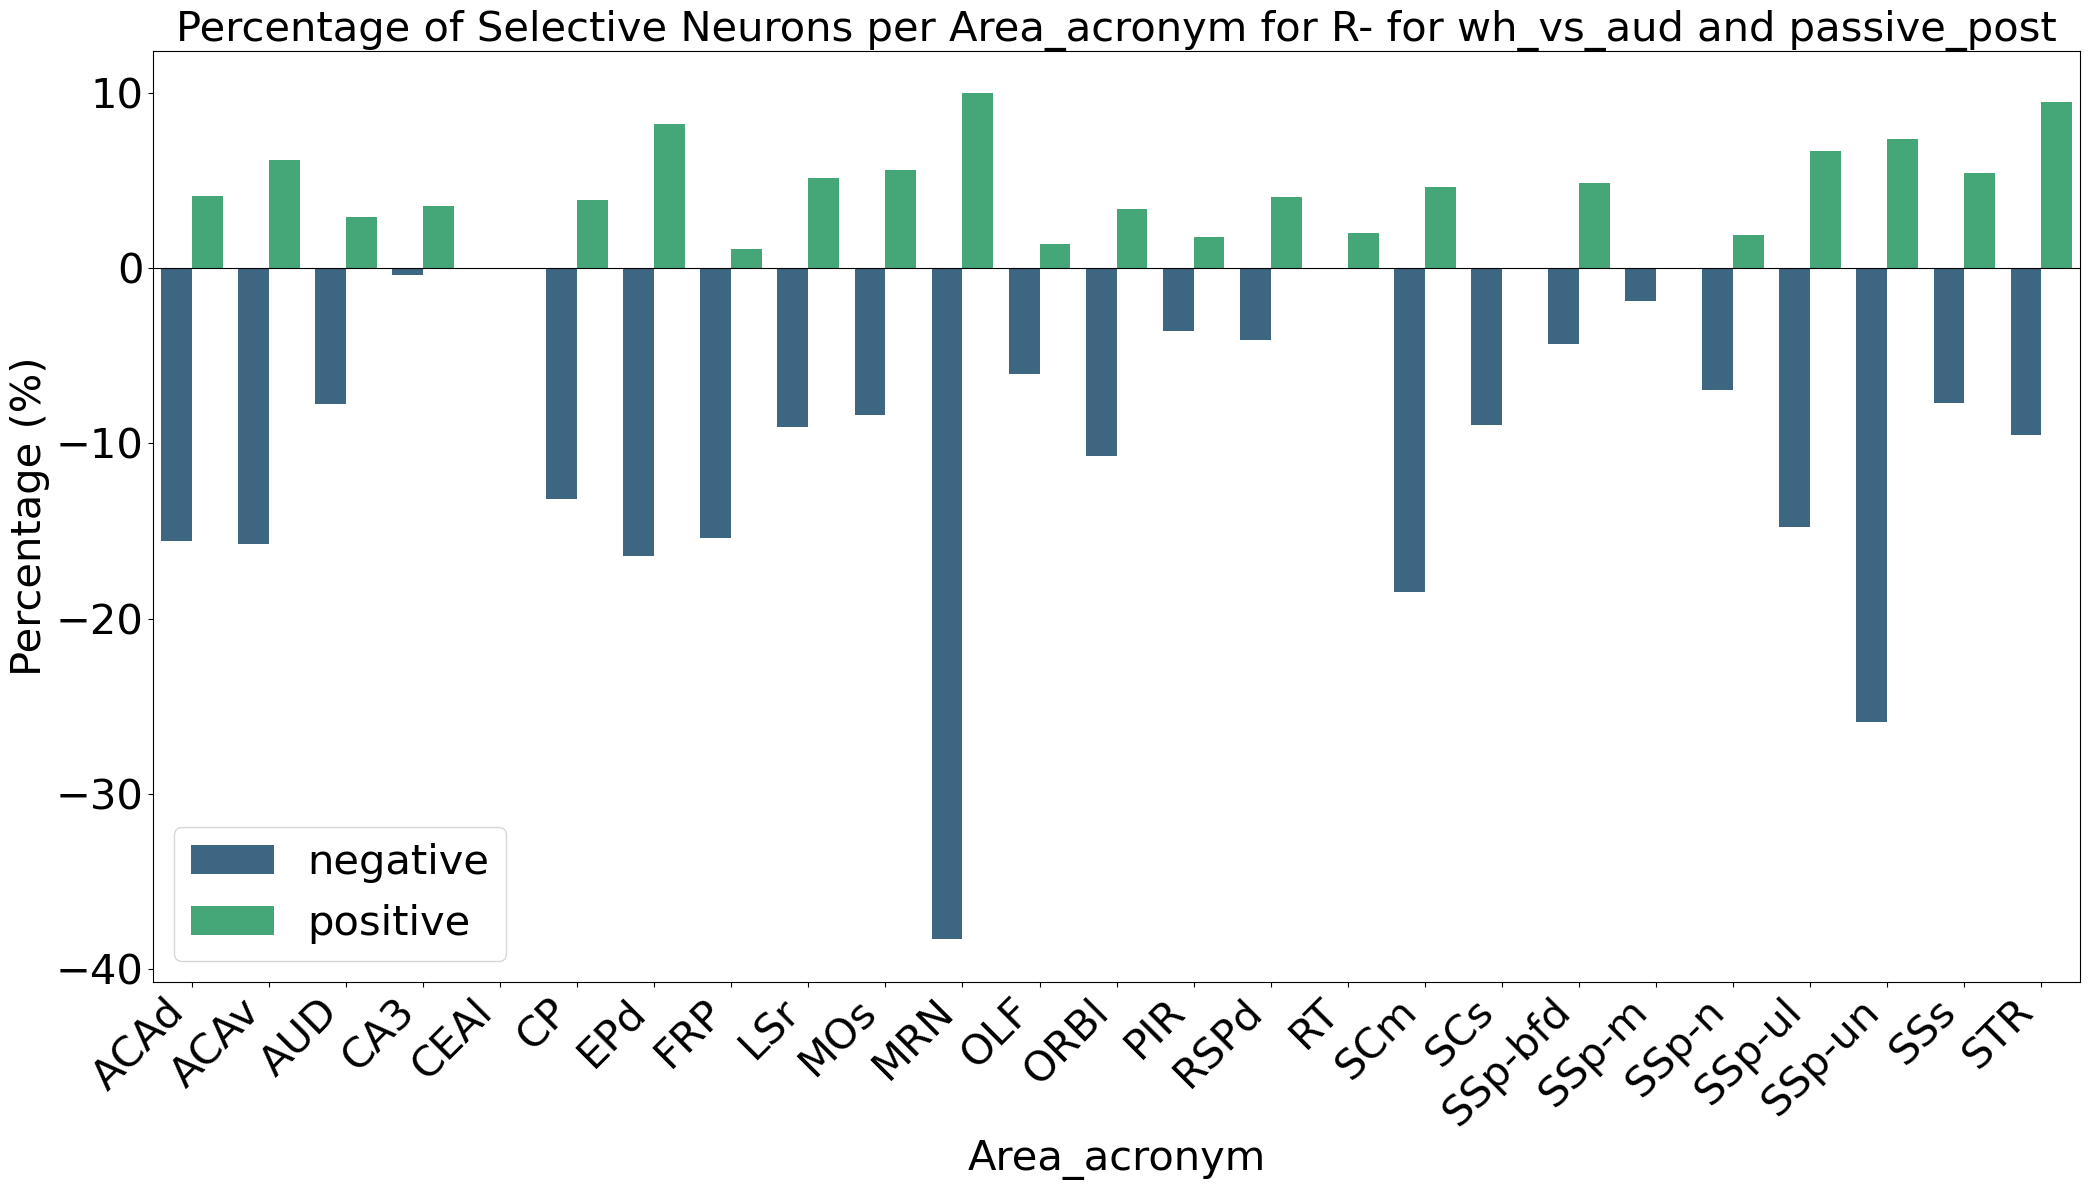

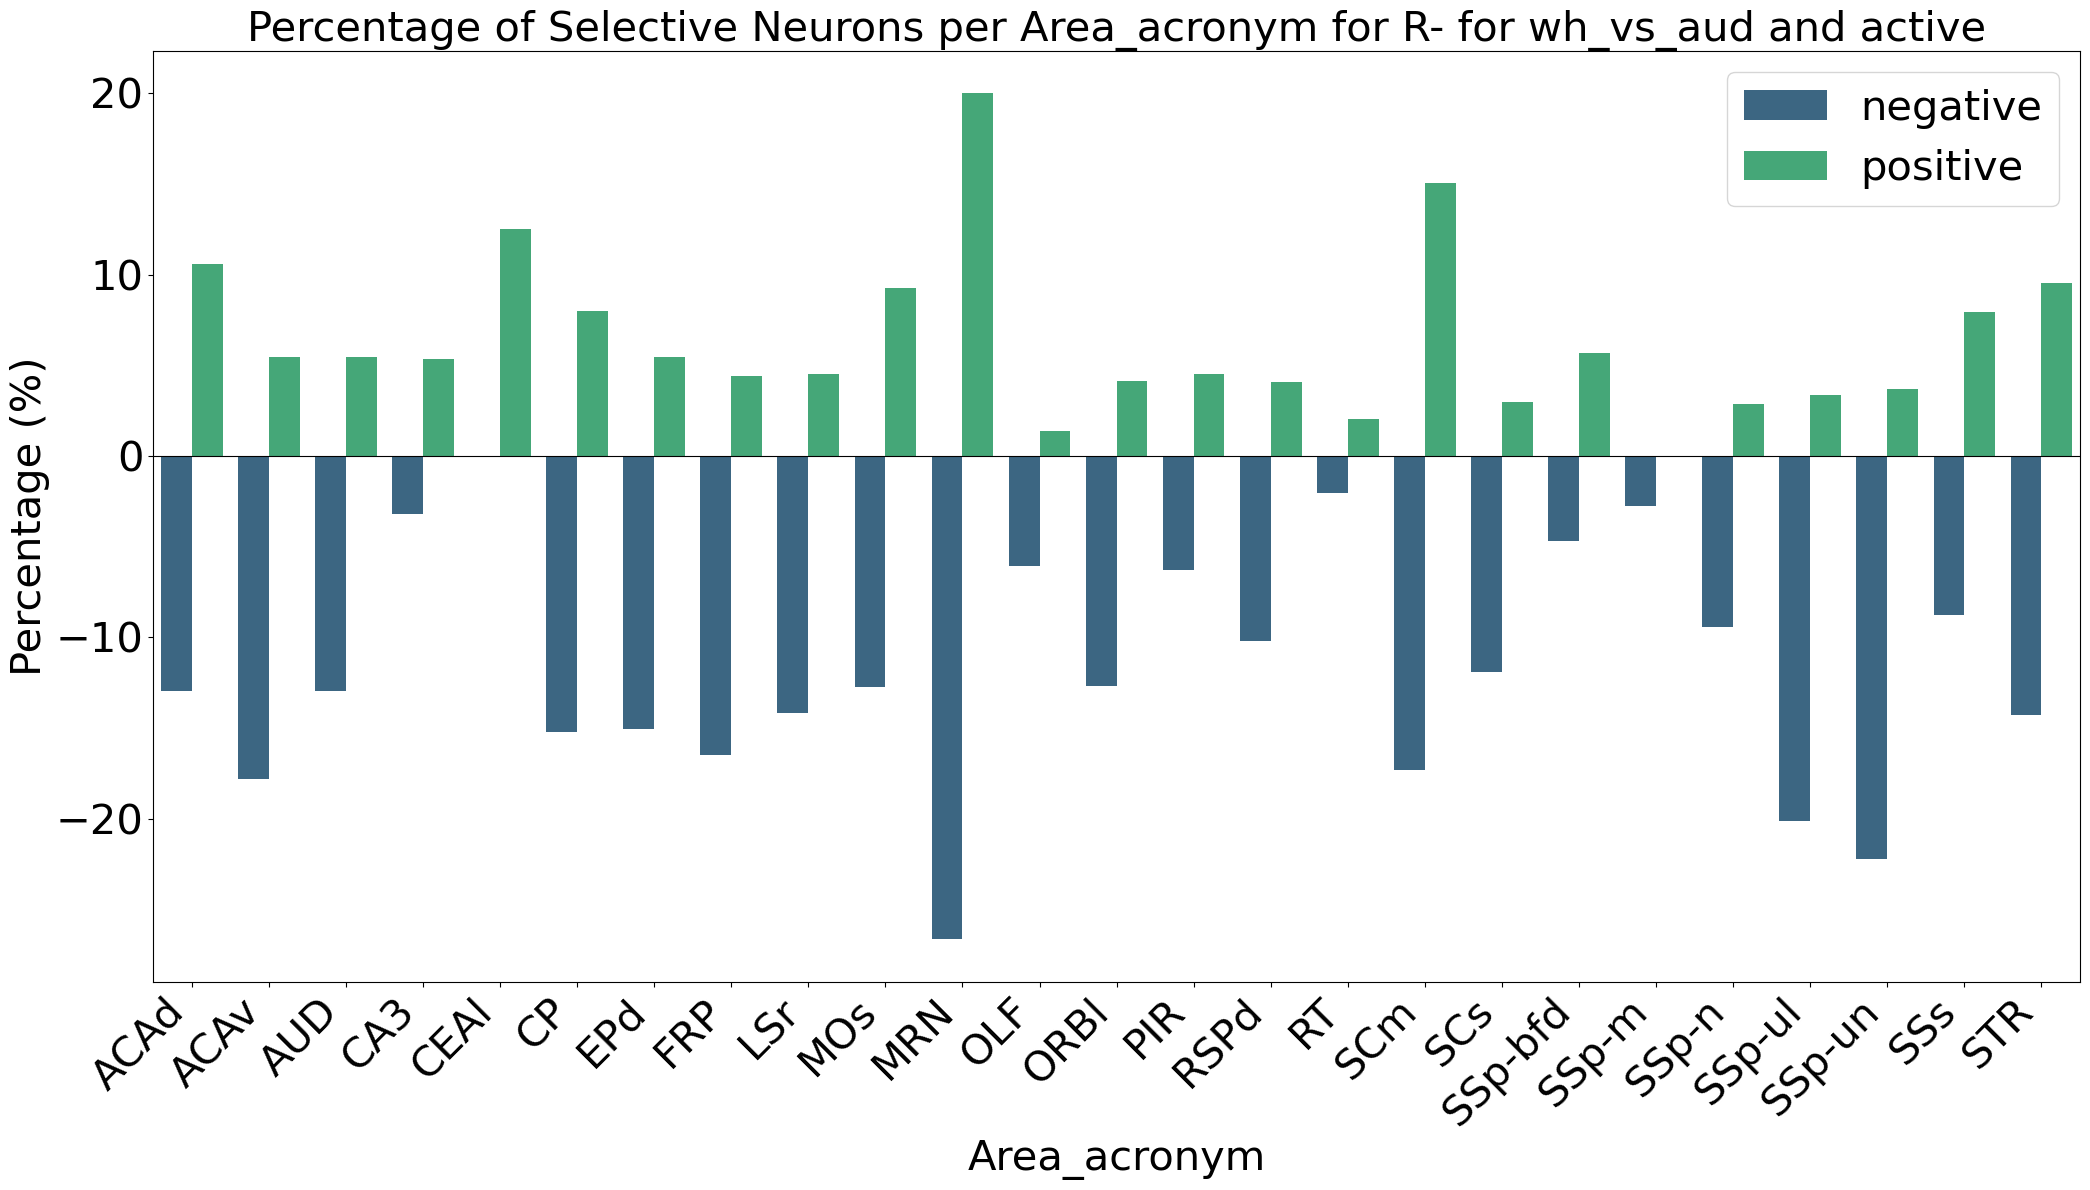

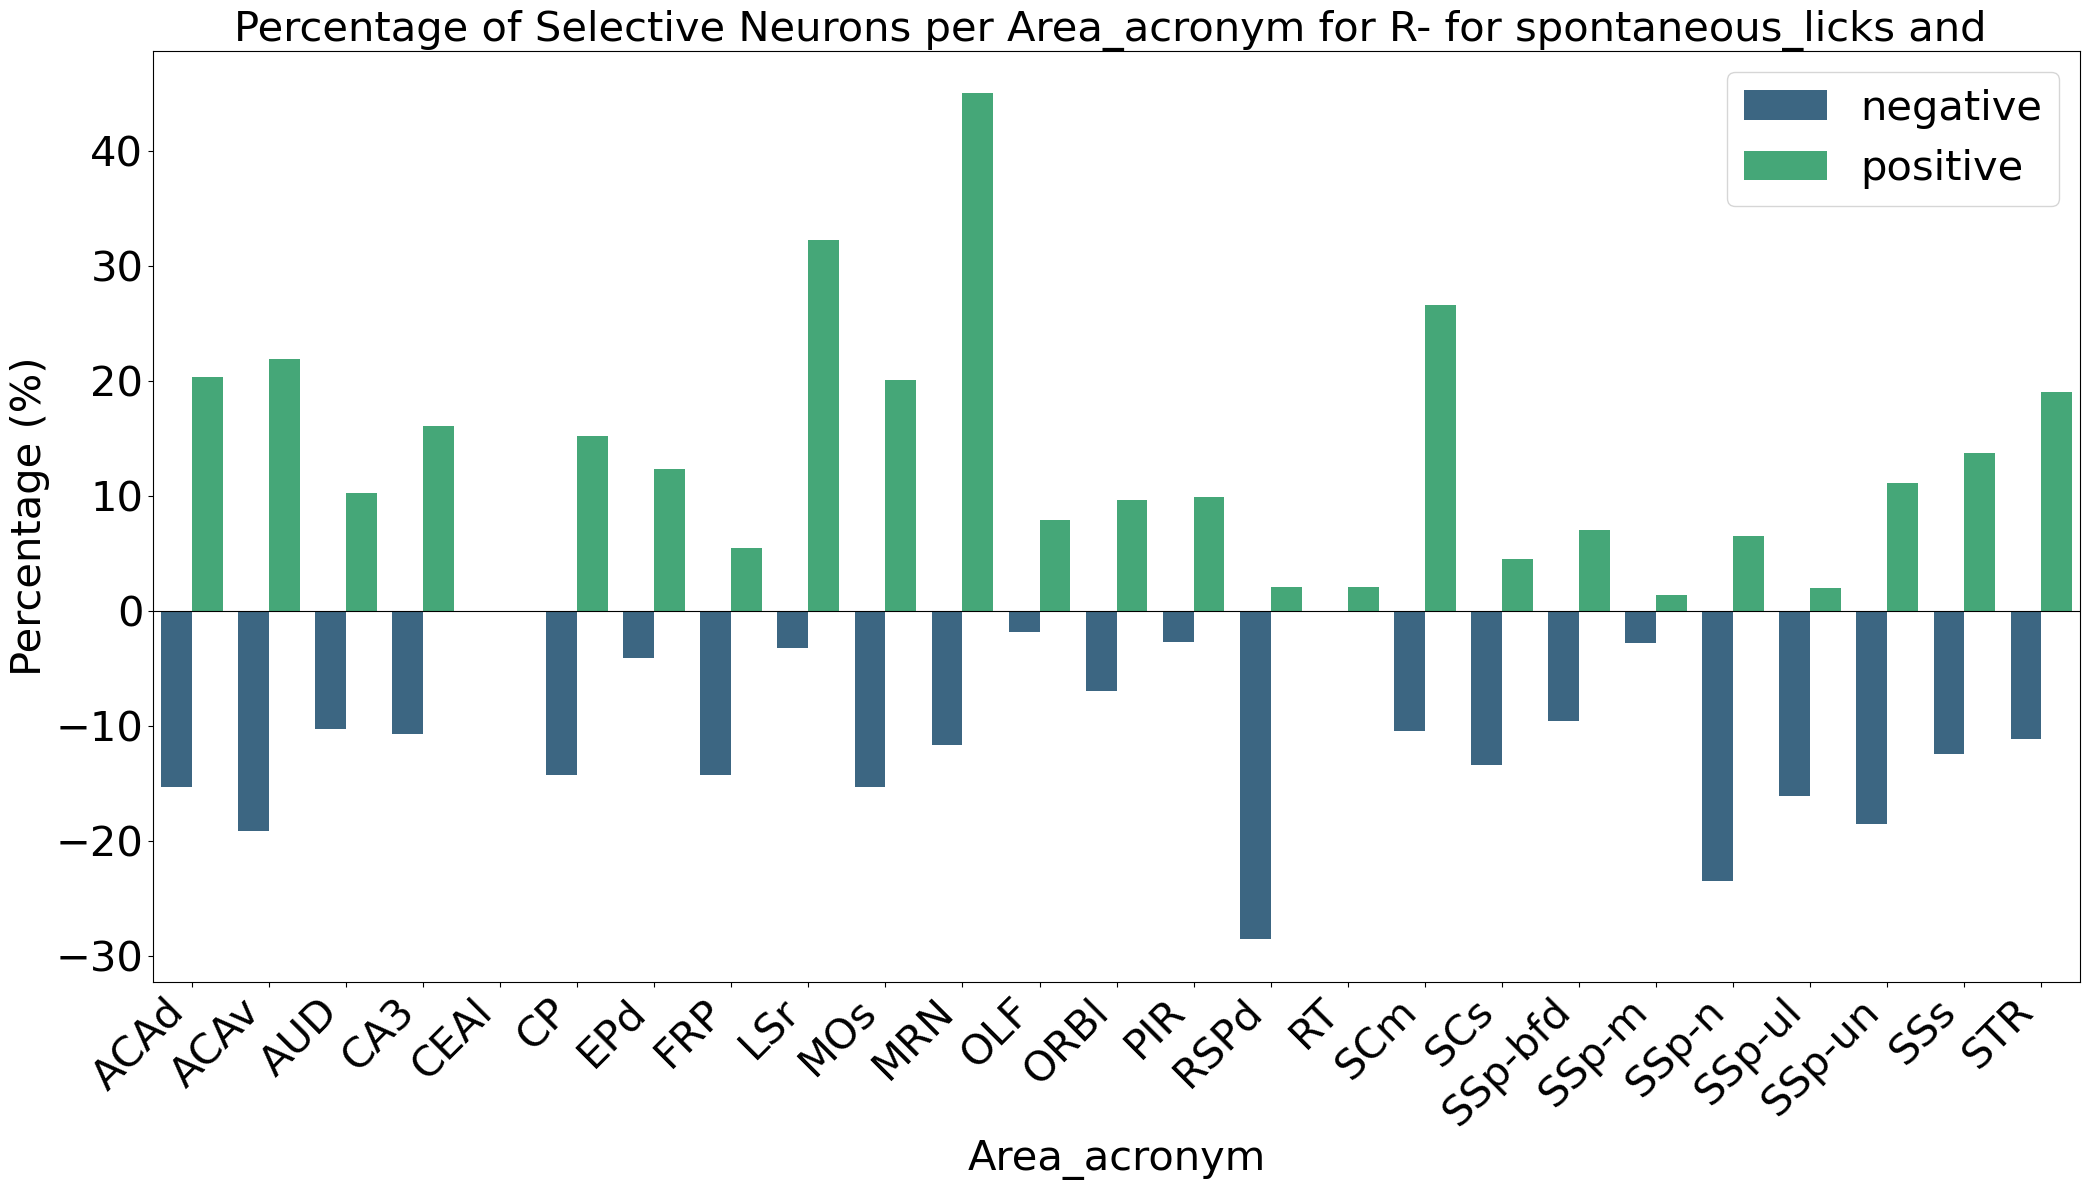

In [70]:
for wh_reward in ['R+', 'R-']:
    for event in ['whisker','auditory','wh_vs_aud', 'spontaneous_licks']:
        if event != 'spontaneous_licks':
            contexts = ['passive_pre', 'passive_post', 'active']
        else:
            contexts = ['']
        for context in contexts:
            if context == '':
                df_modif = df[(df['event']==event)]
            else:
                df_modif = df[(df['event']==event)&(df['context']==context)]

            # To plot per event
            #plot_selectivity_direction_v4(df, by='event', filter_value='', wh_reward = wh_reward, areas = areas)

            # To plot per area_acronym
            plot_selectivity_direction_v4(df_modif, by='area_acronym', filter_value='', wh_reward = wh_reward, event_type = event, context = context, areas = areas)

In [38]:
def plot_selectivity_direction_v4(df, by='event', filter_value='', wh_reward = 'R+', event_type = '', context =''):

    # If filtering by event or area_acronym, only take rows corresponding to the given filter_value
    if filter_value != '':
        df = df[df[by] == filter_value]
    if by == 'area_acronym':
        title_event = ' for ' + event_type + ' and for ' + context
    else:
        title_event = ''

    selective_counts = df[(df['wh_reward'] == wh_reward) & (df['selective'] == True)].groupby([by, 'direction', 'wh_reward']).size().reset_index(name='count')

    # Group by the specified parameter and direction for all neurons to calculate total counts (for normalization)
    total_counts = df.groupby([by, 'direction']).size().reset_index(name='count')

    # Merge total counts for normalization purposes
    #selective_percentages = selective_counts.merge(total_counts, on=['area_acronym', 'direction', 'wh_reward'])

    hi = total_counts.groupby(by)['count'].sum().reset_index(name='total')
    selective_percentages = selective_counts.merge(hi, on=[by])
    selective_percentages['percentage'] = selective_percentages['count']/selective_percentages['total']

    # Adjust visualization values:
    # - Keep positive responses as-is
    # - For negative responses, map their magnitude to "below the baseline"
    selective_percentages['visual_percentage'] = selective_percentages.apply(
        lambda row: -row['percentage'] if row['direction'] == 'negative' else row['percentage'],
        axis=1
    )

    # Plotting
    plt.figure(figsize=(15, 8))

    # Create the bar plot with seaborn
    ax = sns.barplot(
        data=selective_percentages,
        x=by,
        y='visual_percentage',
        hue='direction',
        dodge=True,
        palette='viridis'
    )

    # Annotate the bars
    for p in ax.patches:
        percentage = f"{abs(p.get_height()):.3f}%"  # Always annotate using magnitude
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

    # Adjust legends to avoid duplicates
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), title='Direction')

    # Set axis labels and titles
    if filter_value != '':
        title = f'Percentage of Selective Neurons per {by.capitalize()} for {filter_value} for {wh_reward}{title_event}'
    else:
        title = f'Percentage of Selective Neurons per {by.capitalize()} for {wh_reward}{title_event}'

    plt.axhline(0, color='black', linewidth=0.8)  # Reference line at baseline
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xlabel(by.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


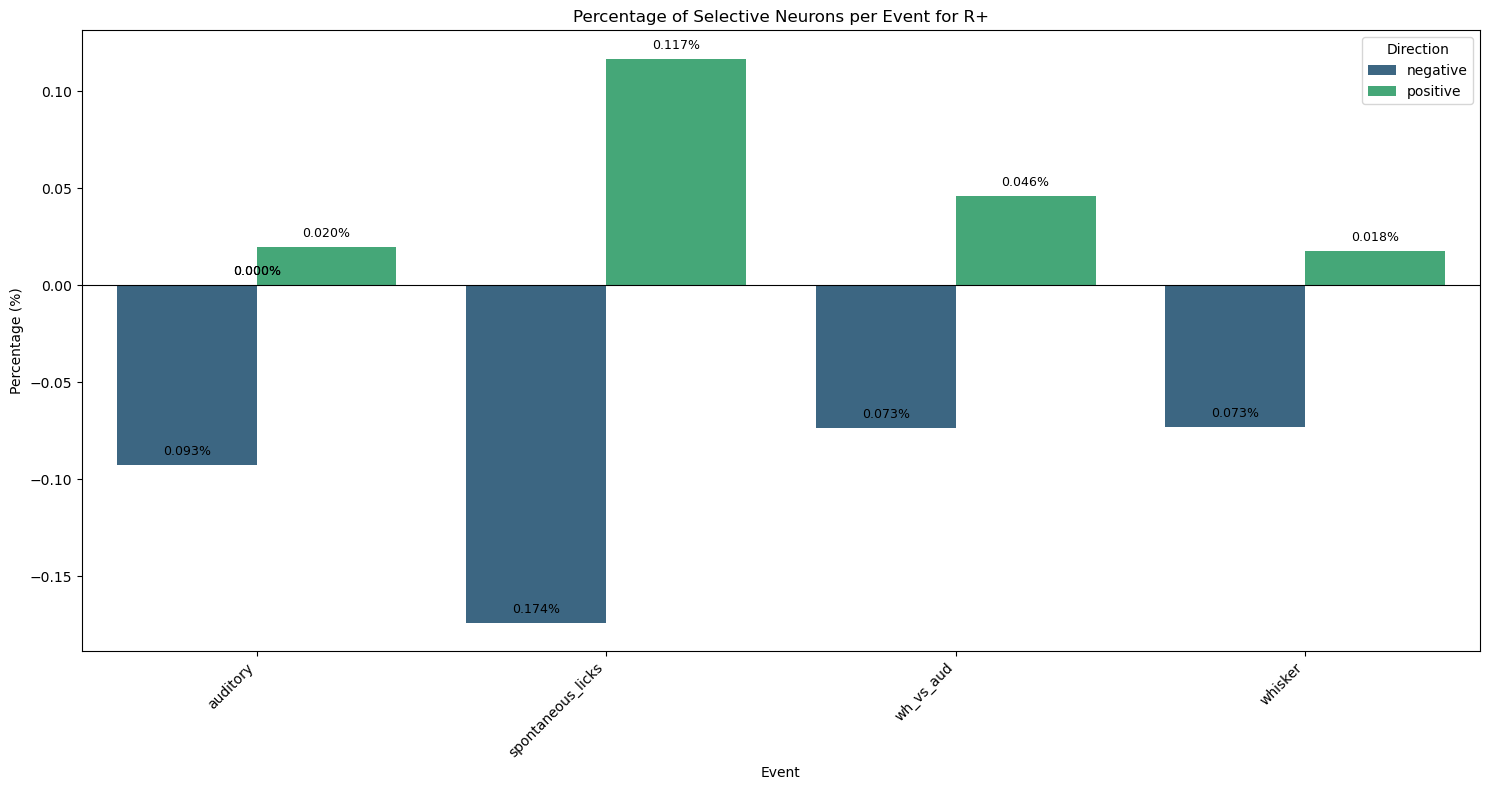

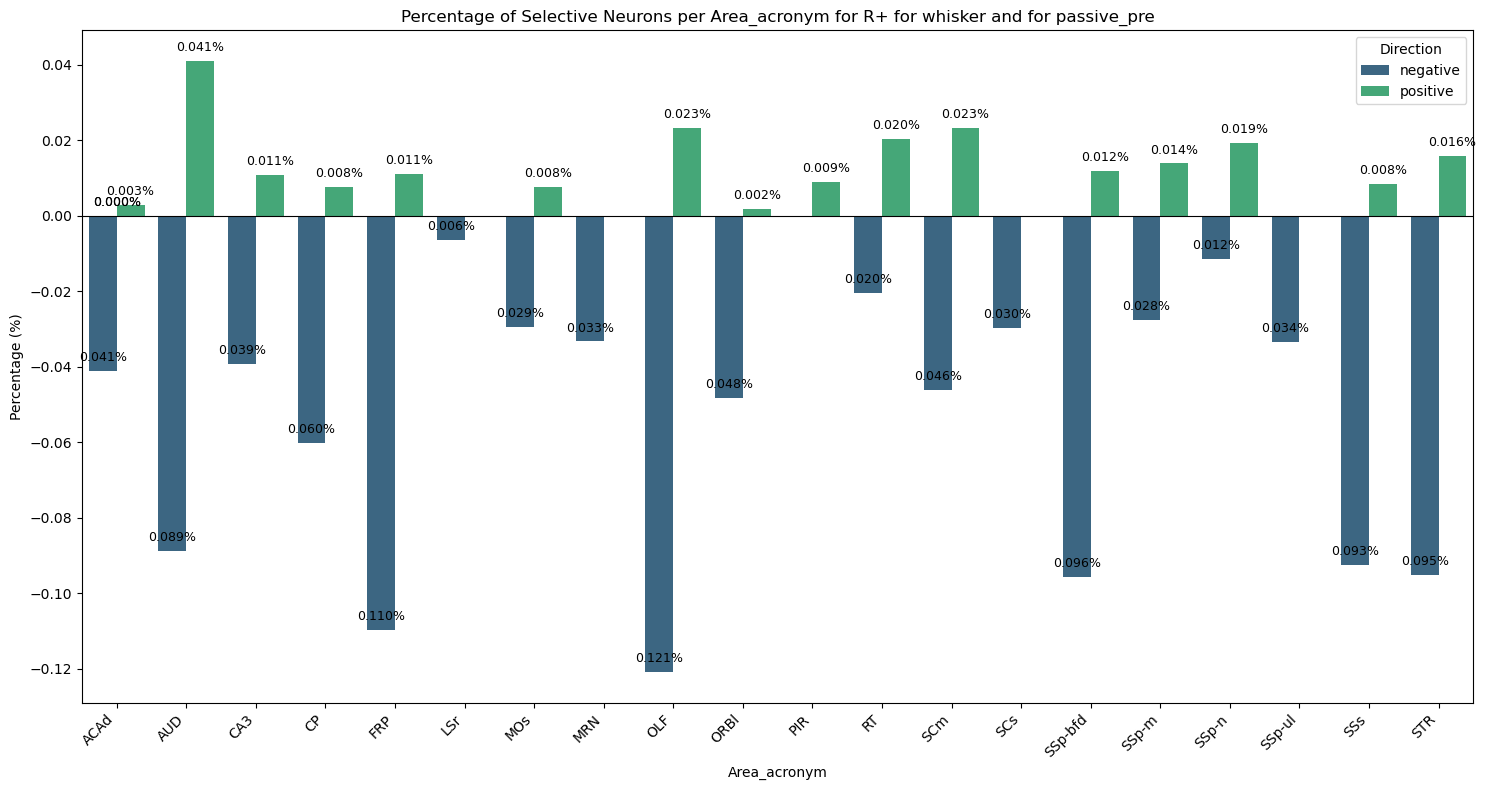

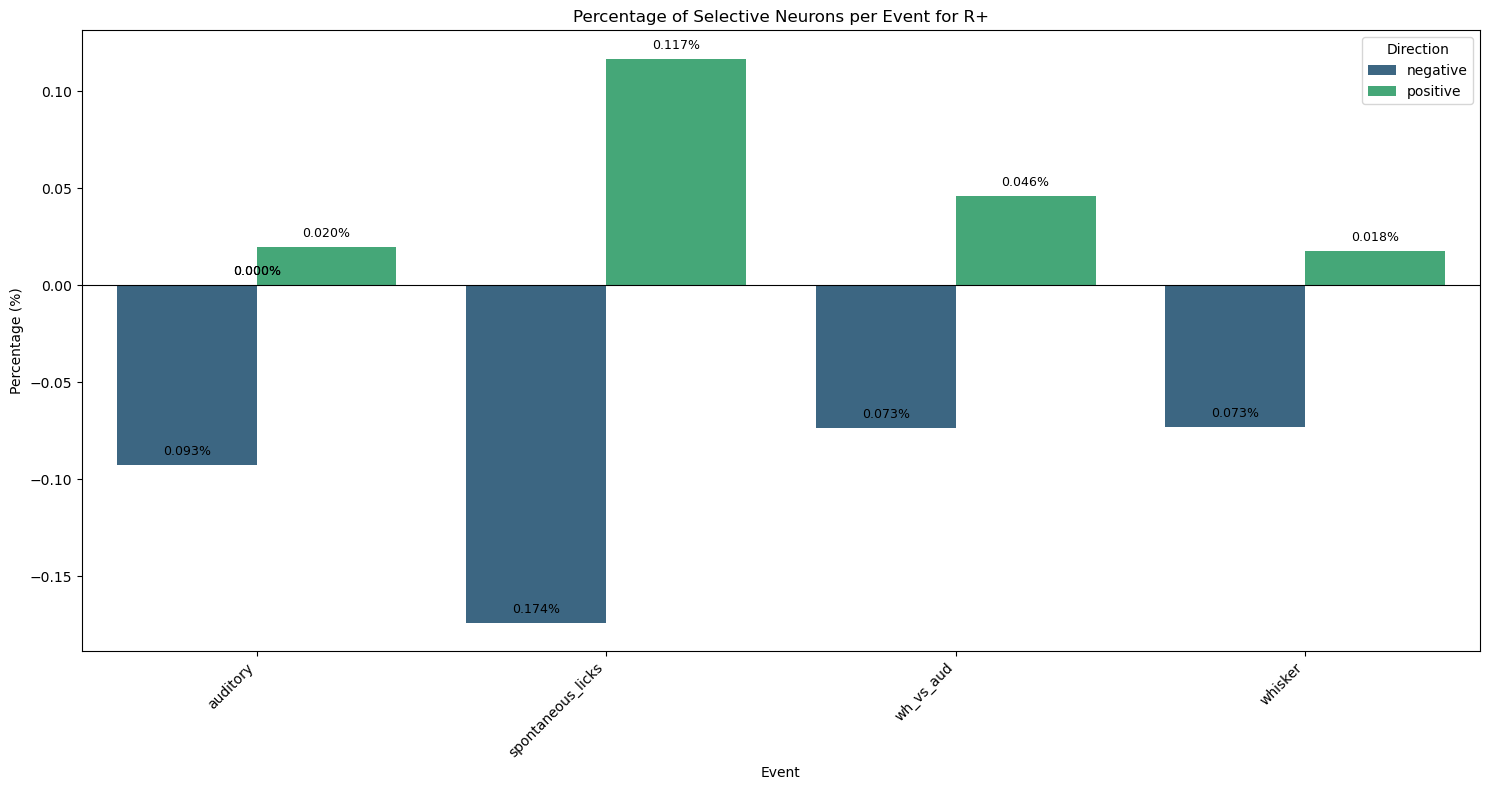

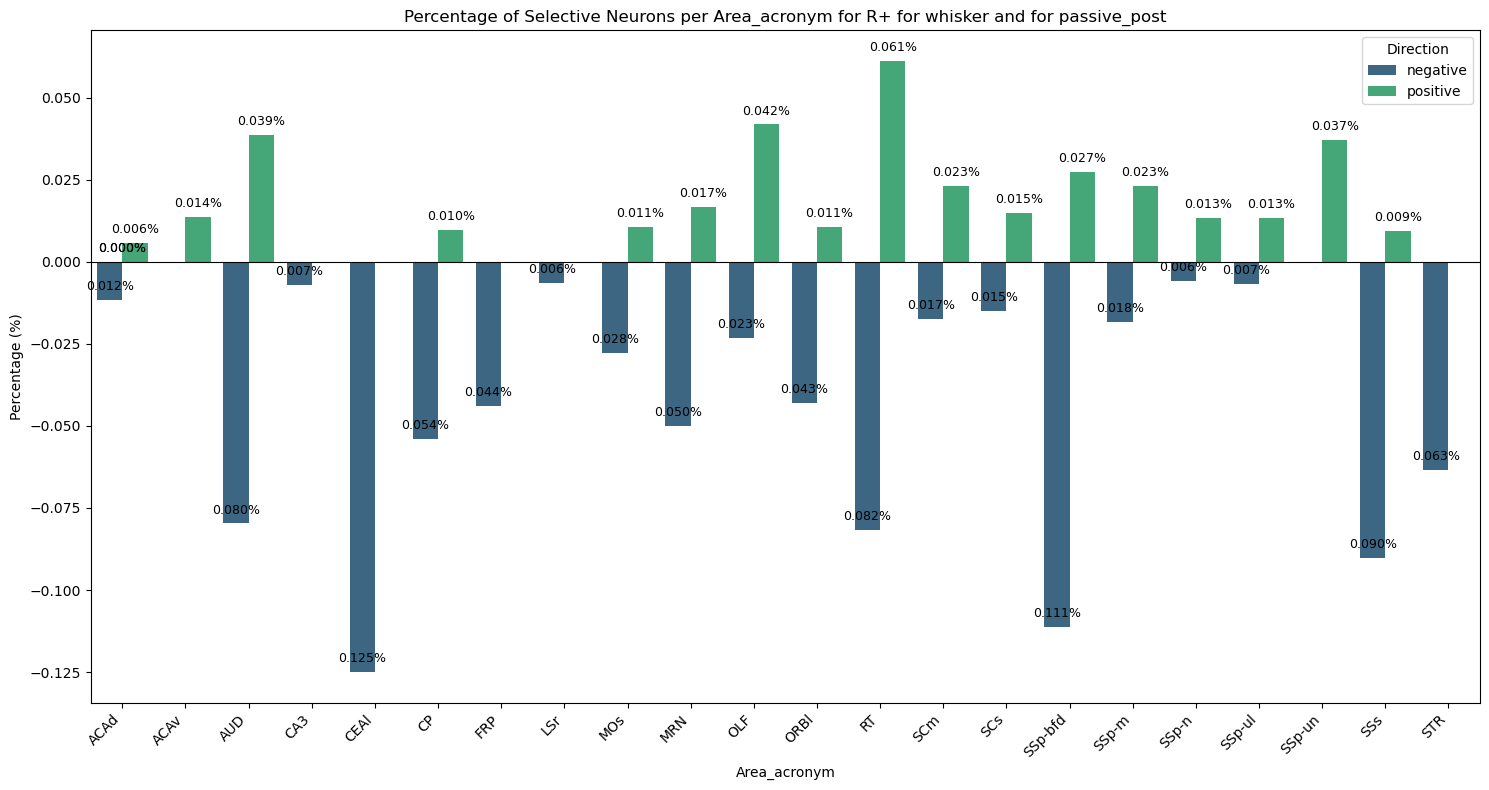

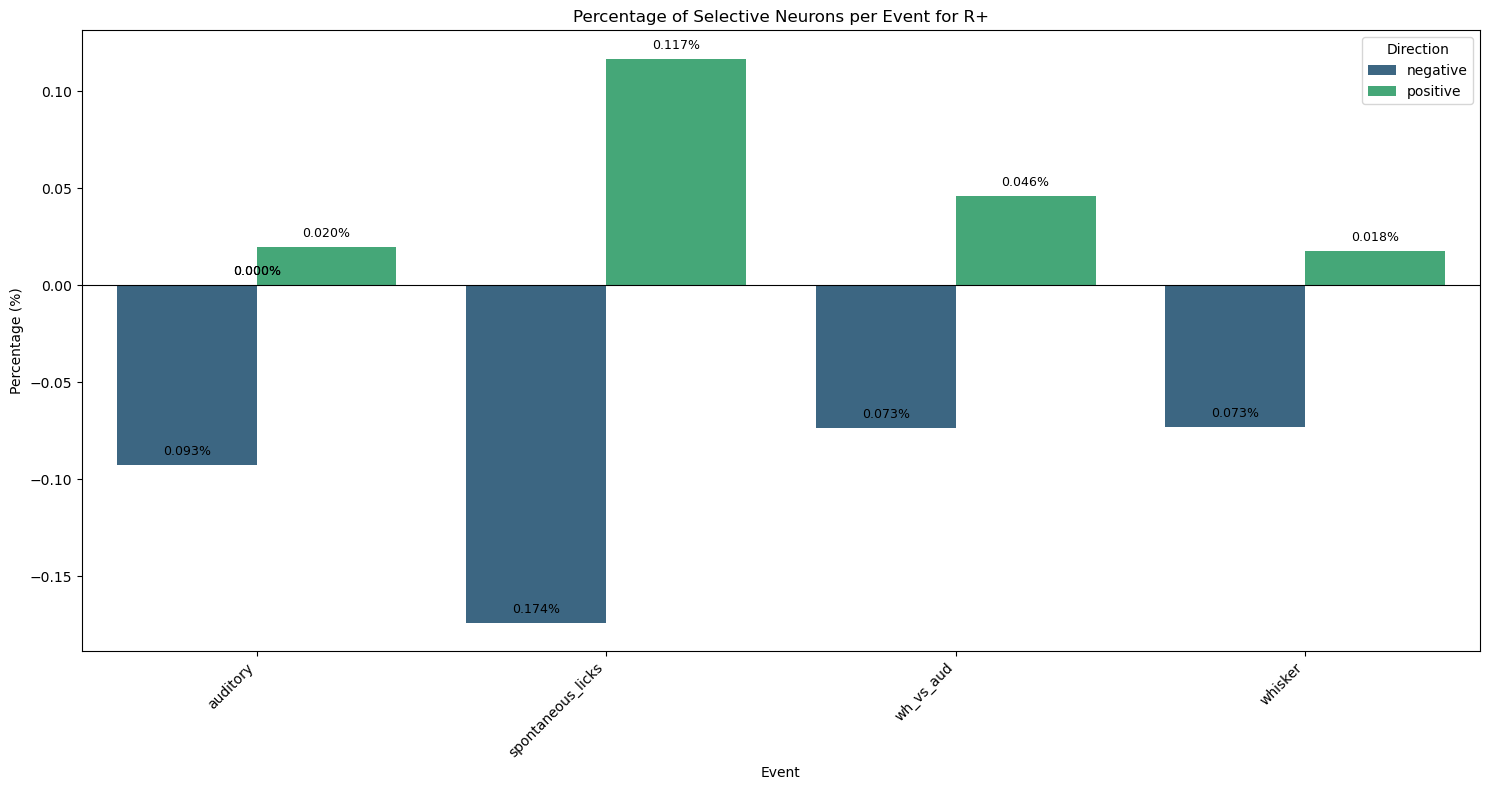

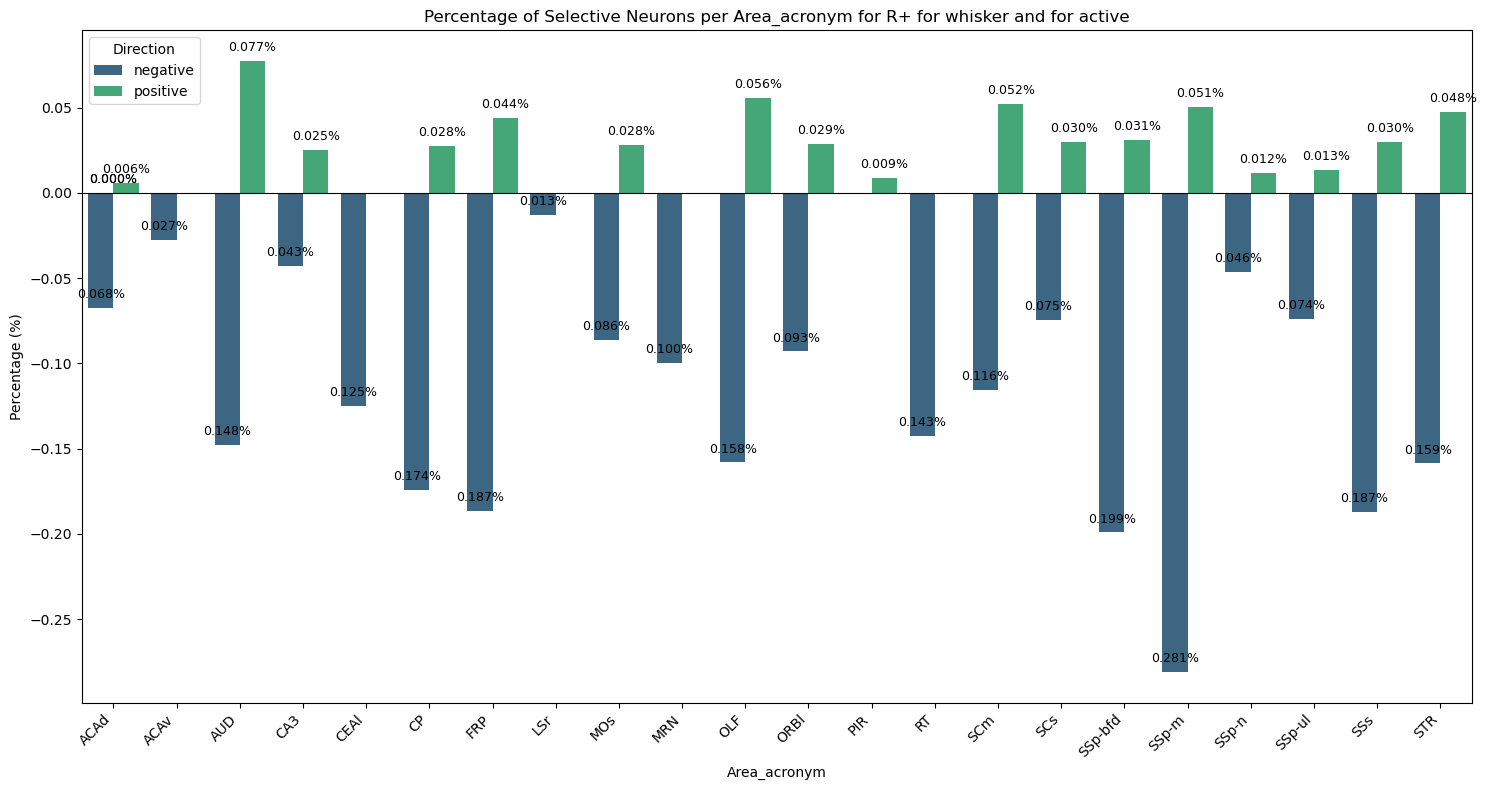

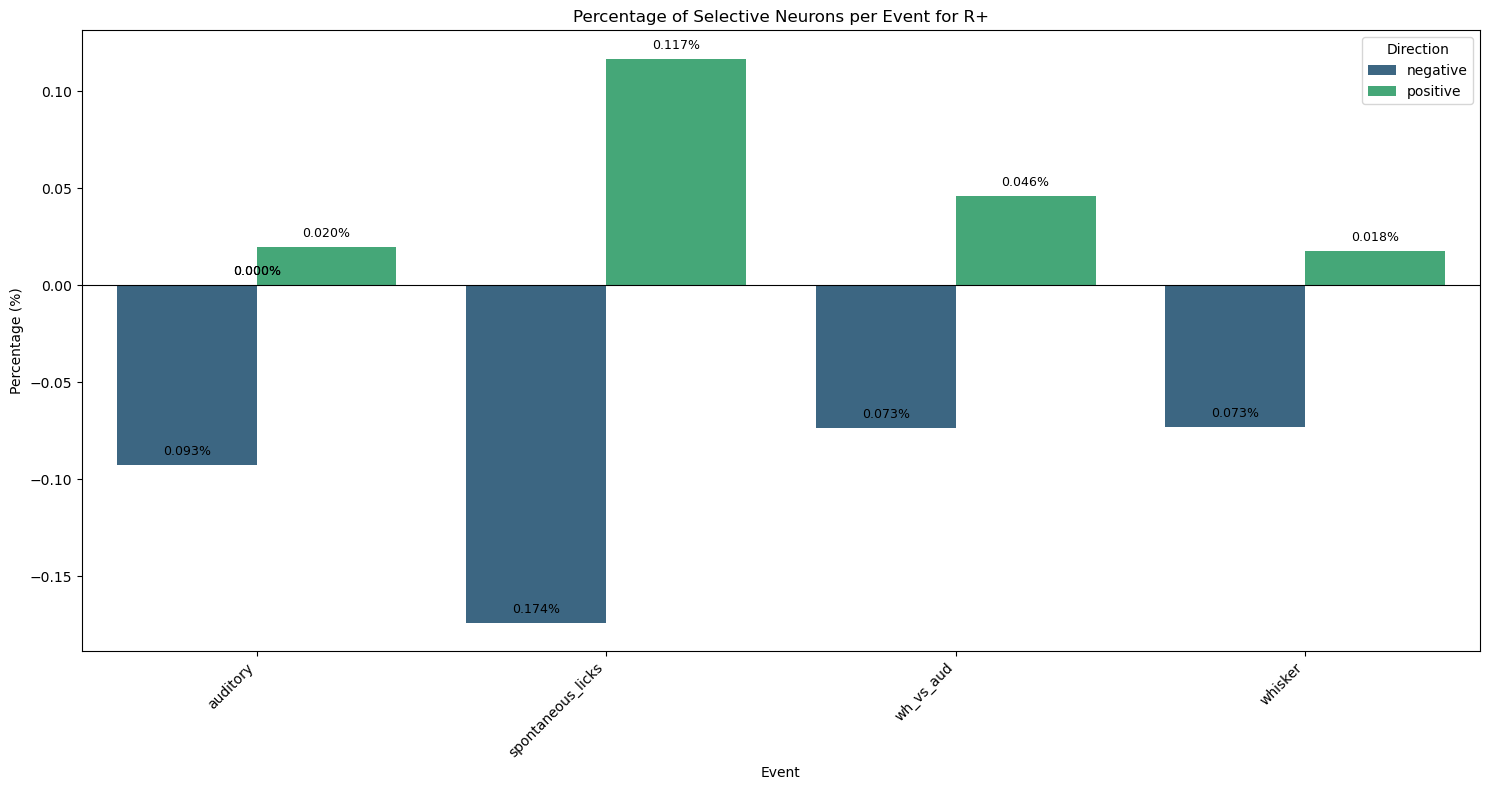

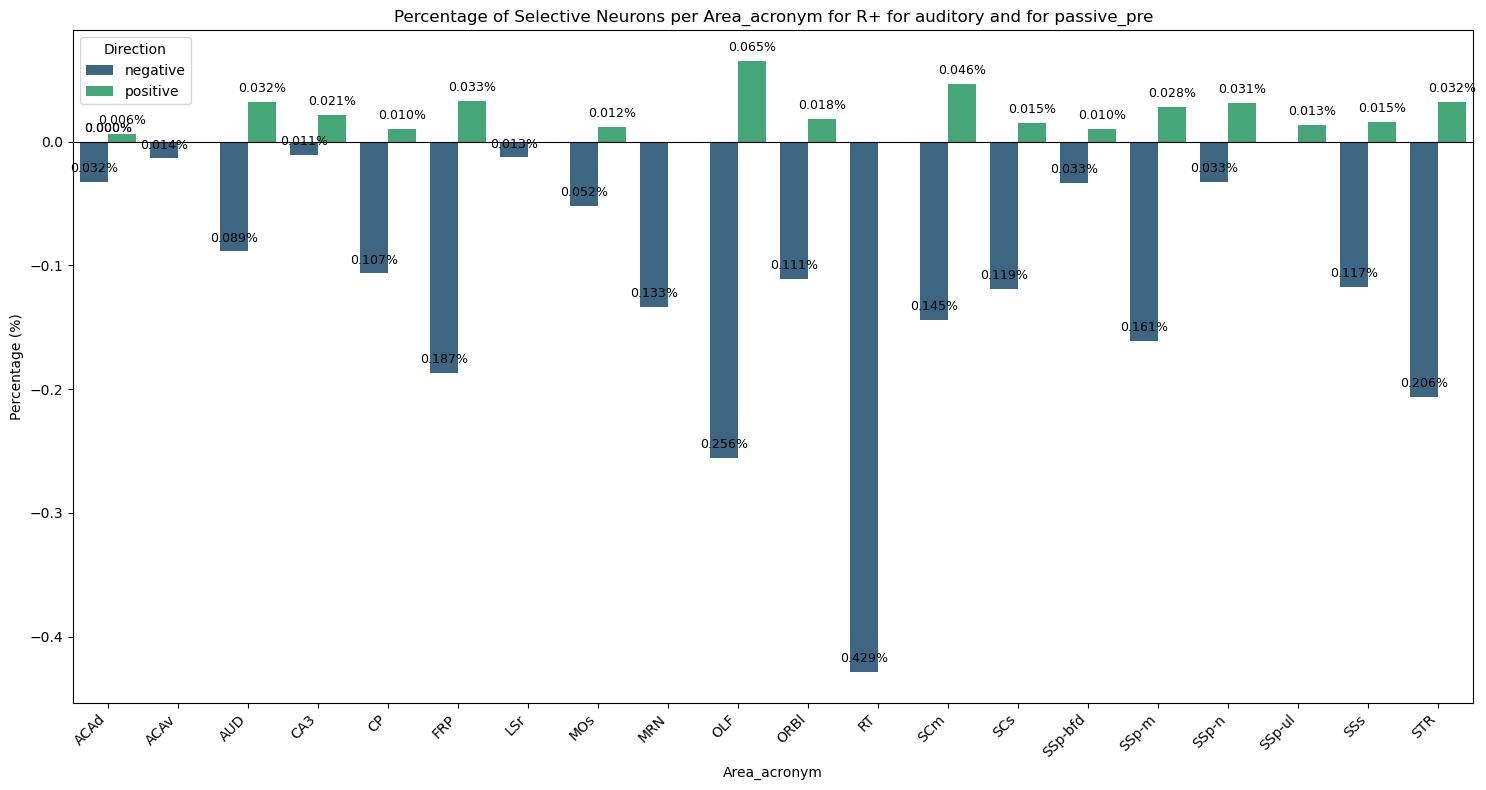

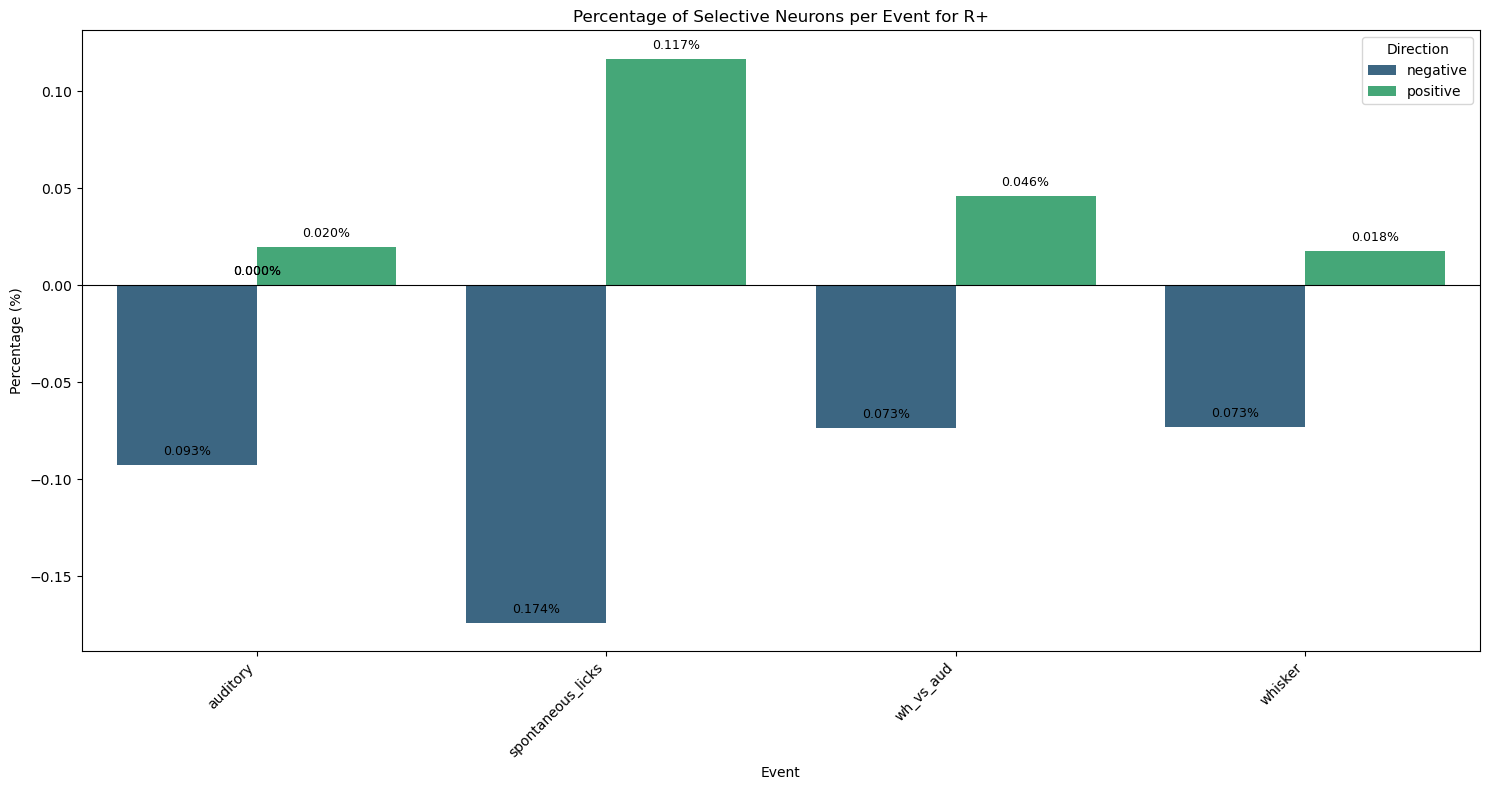

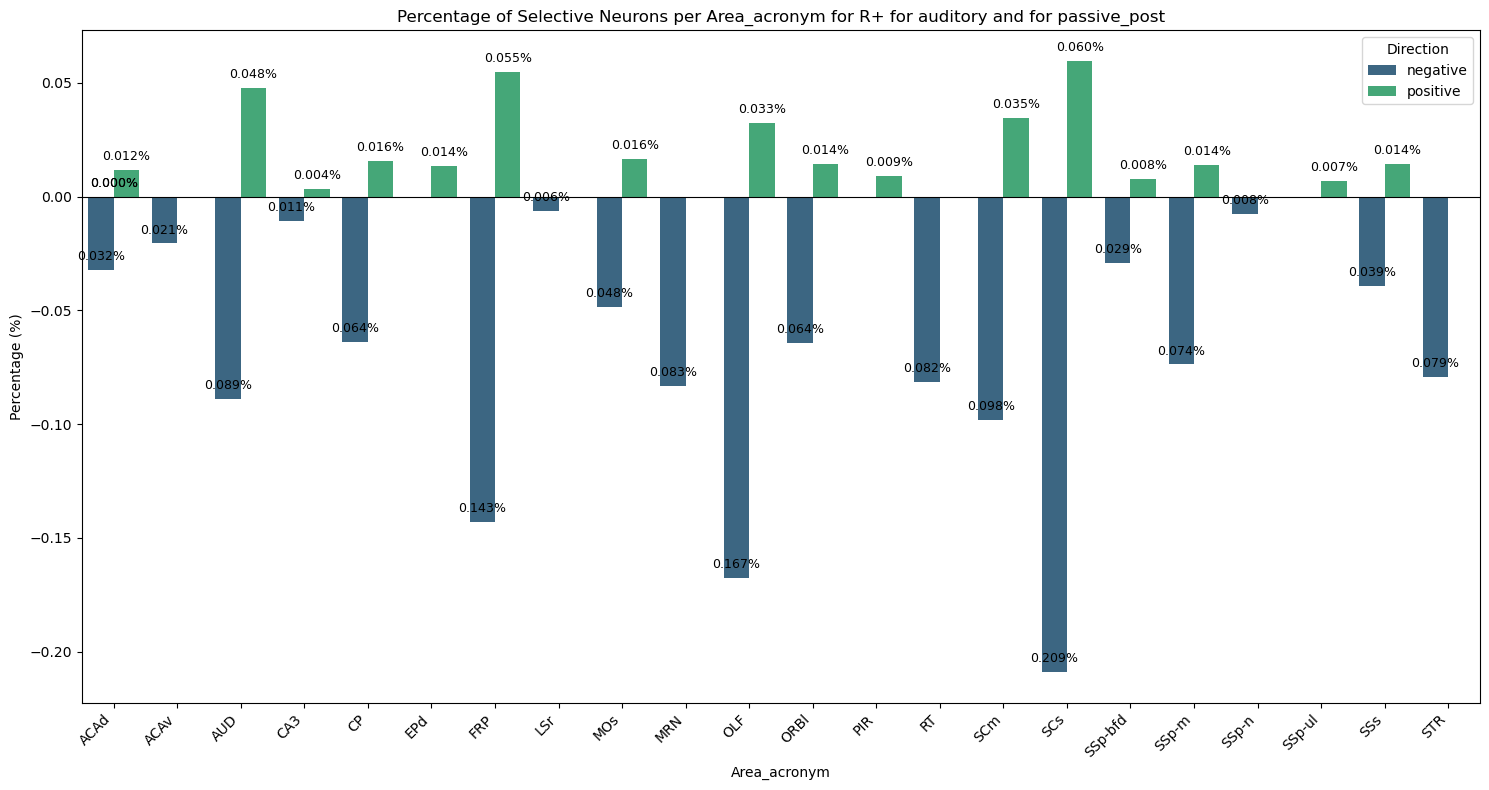

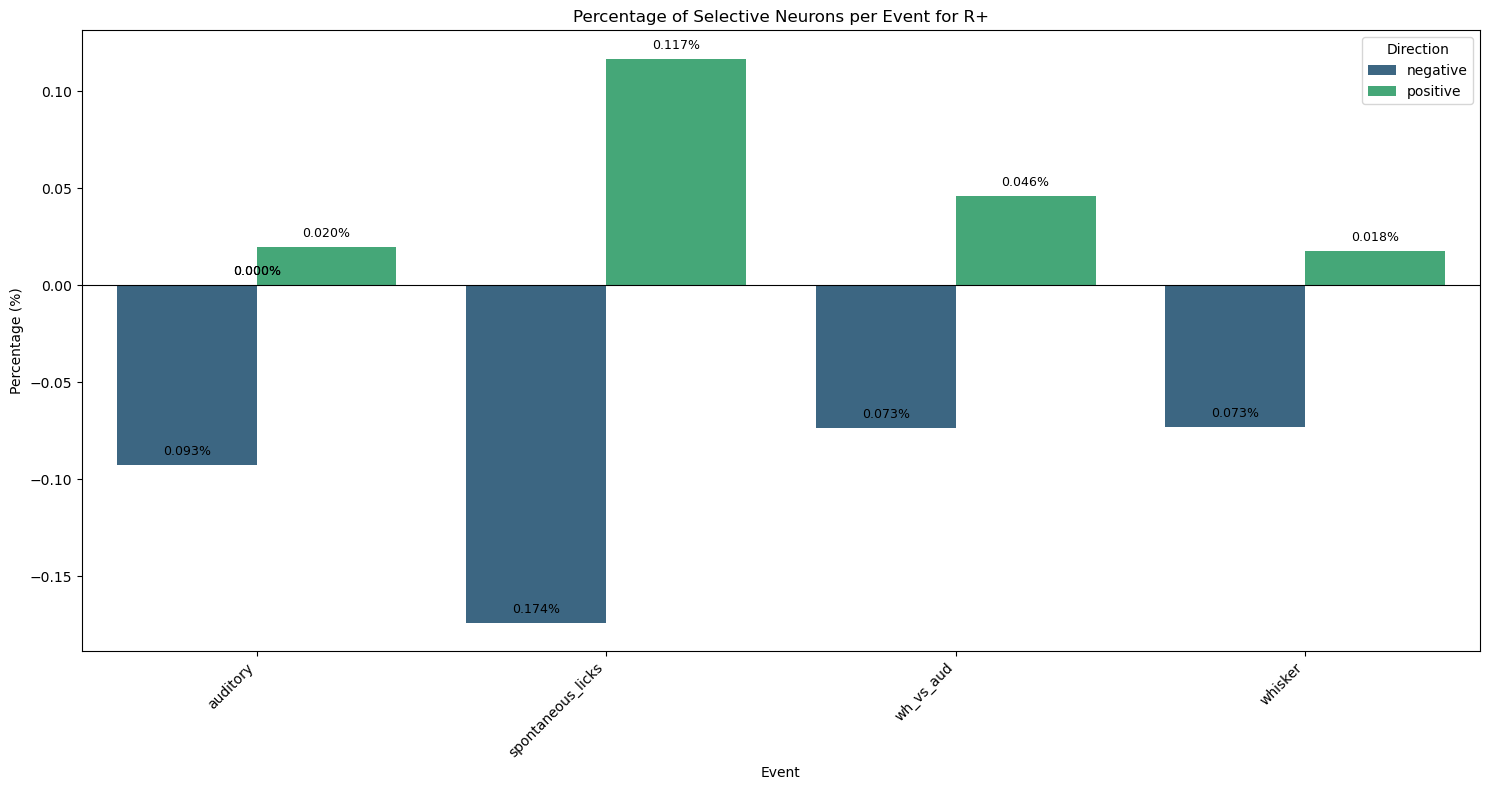

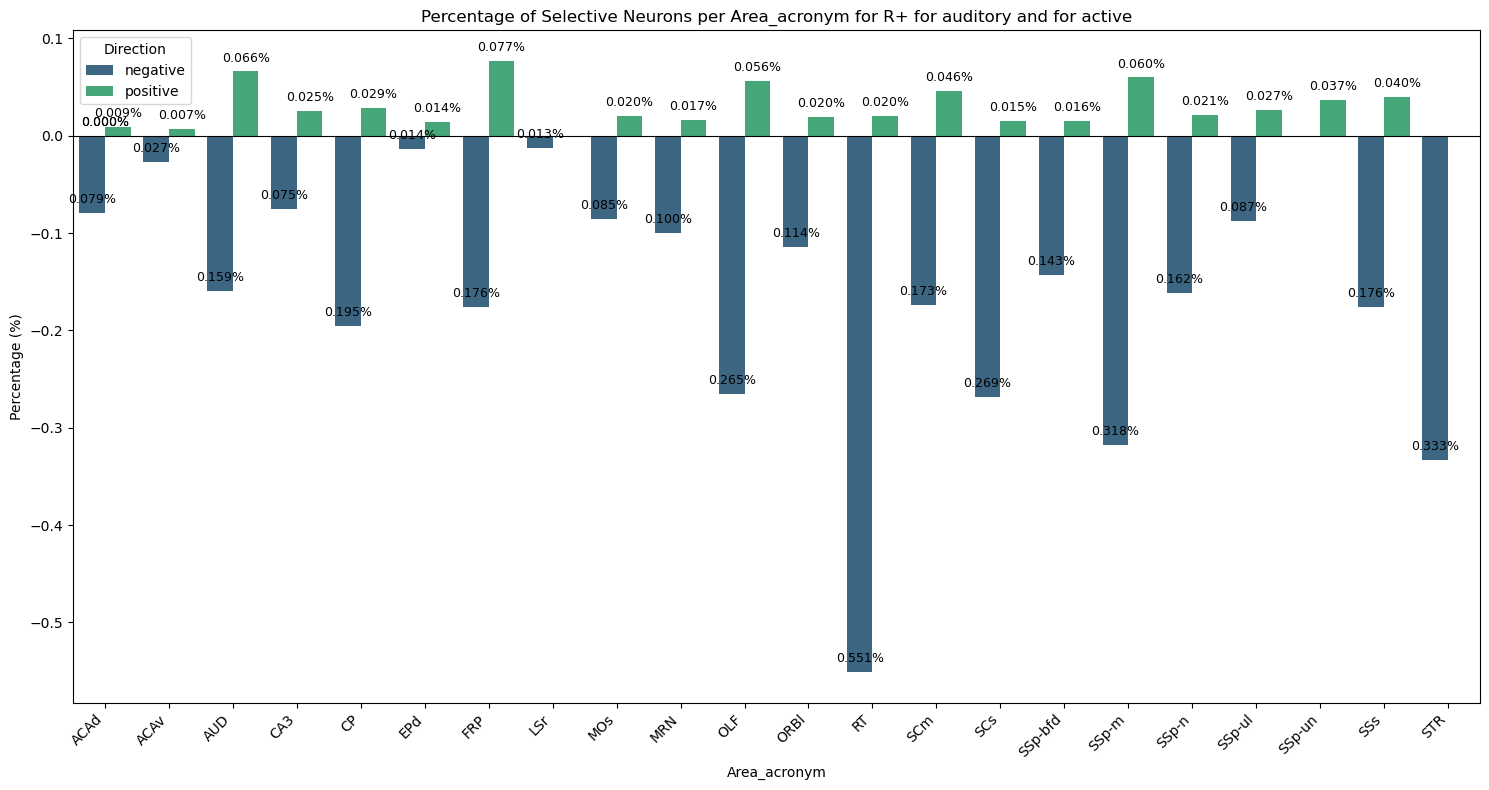

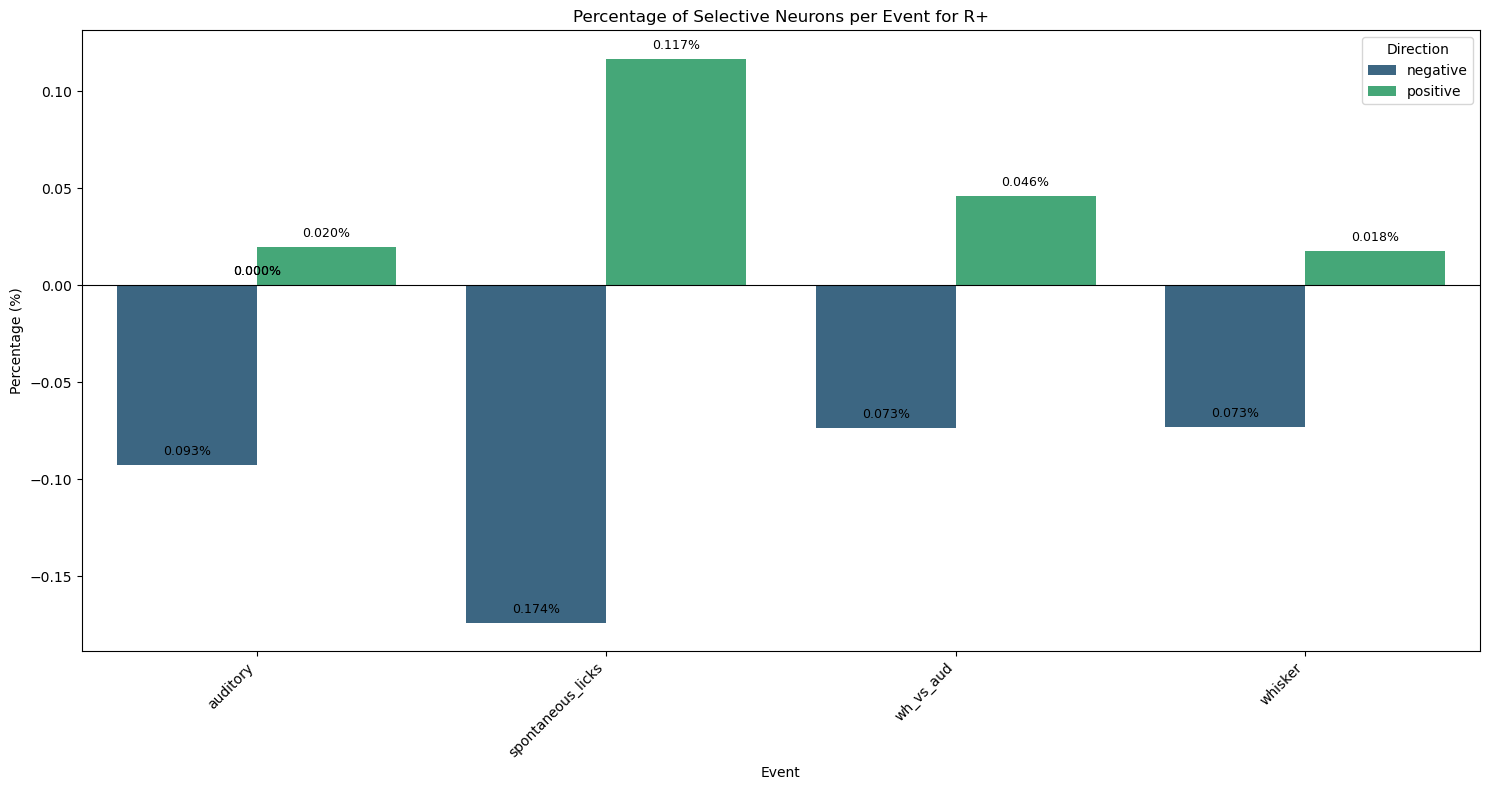

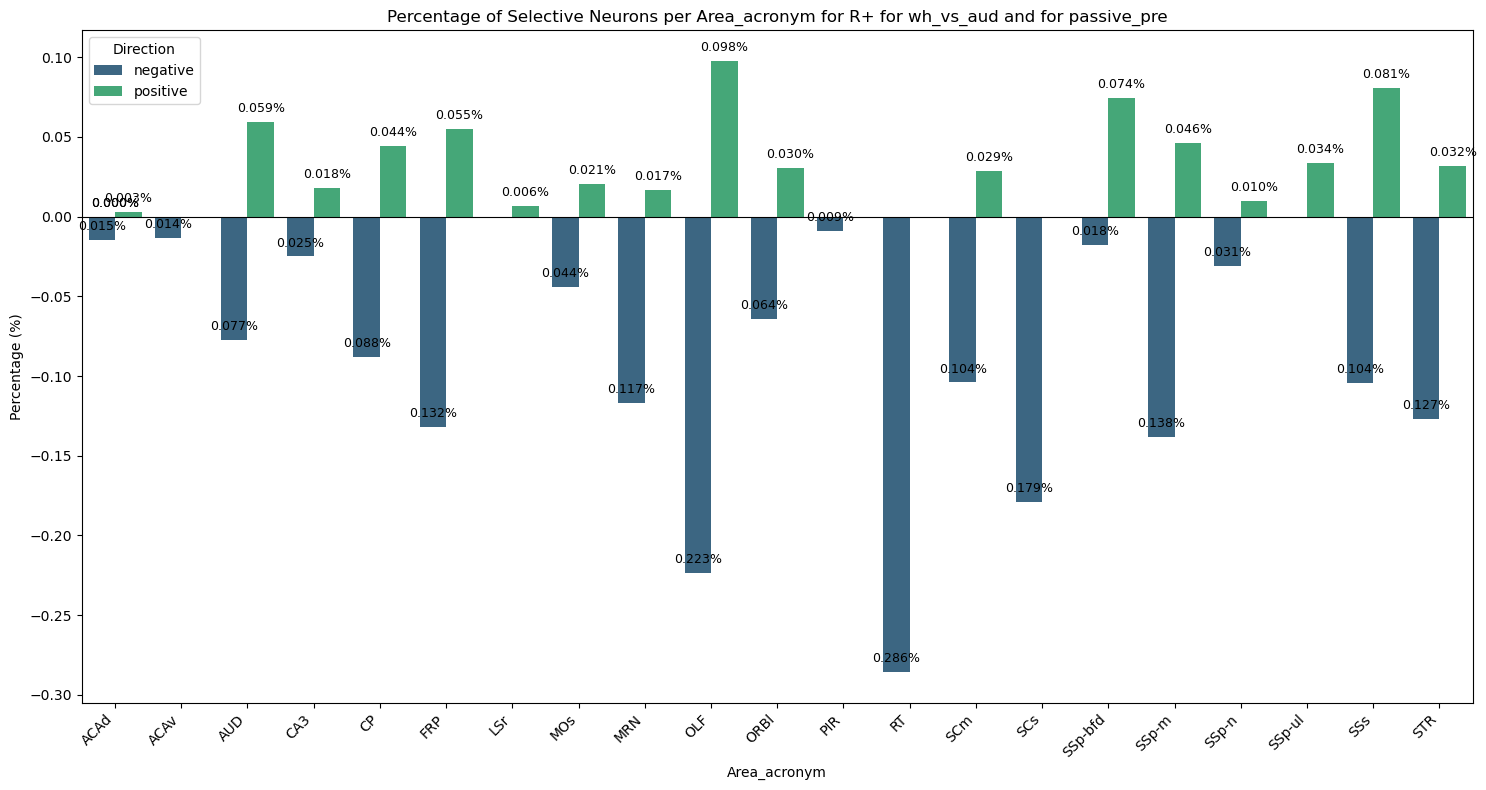

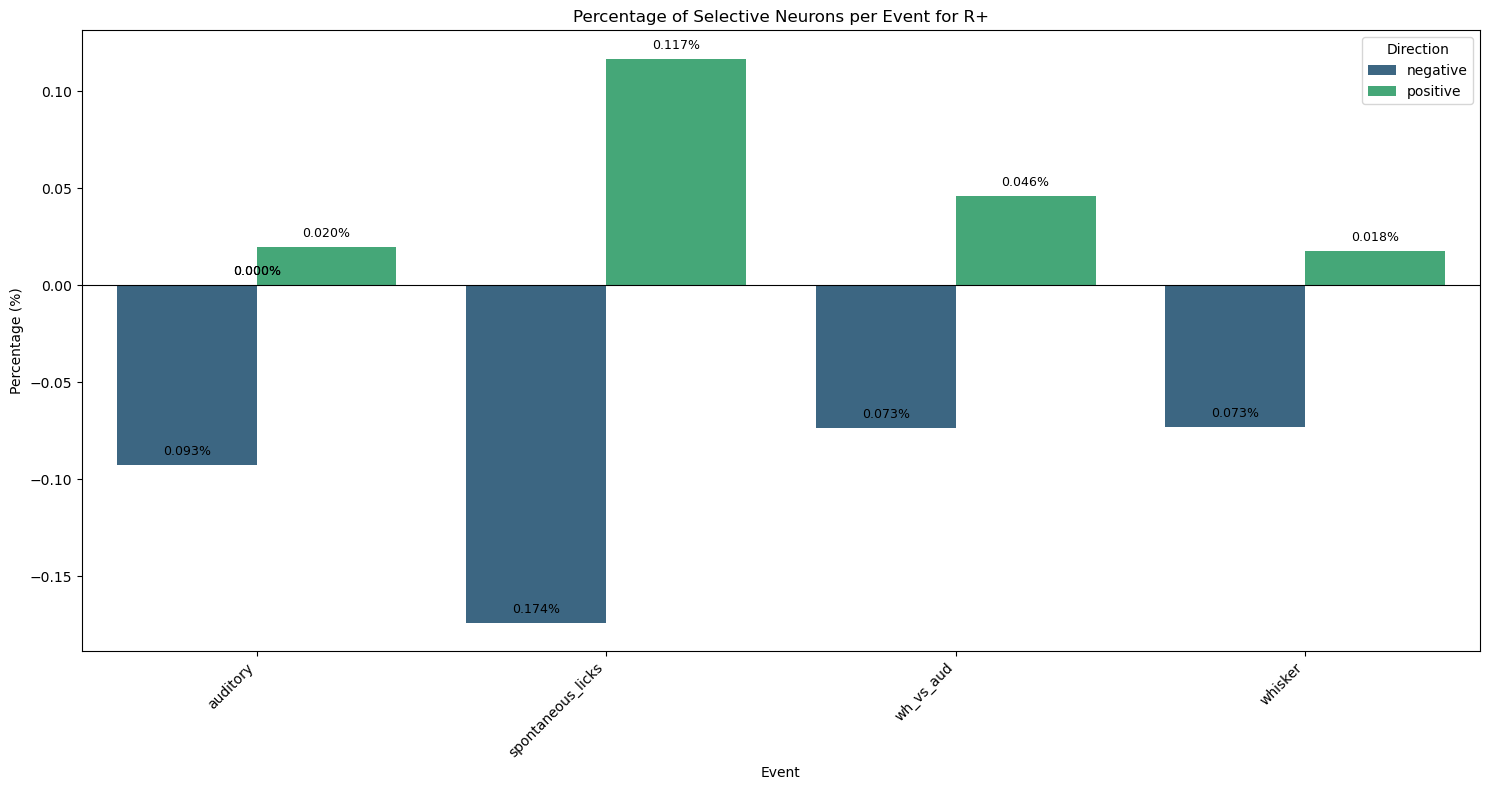

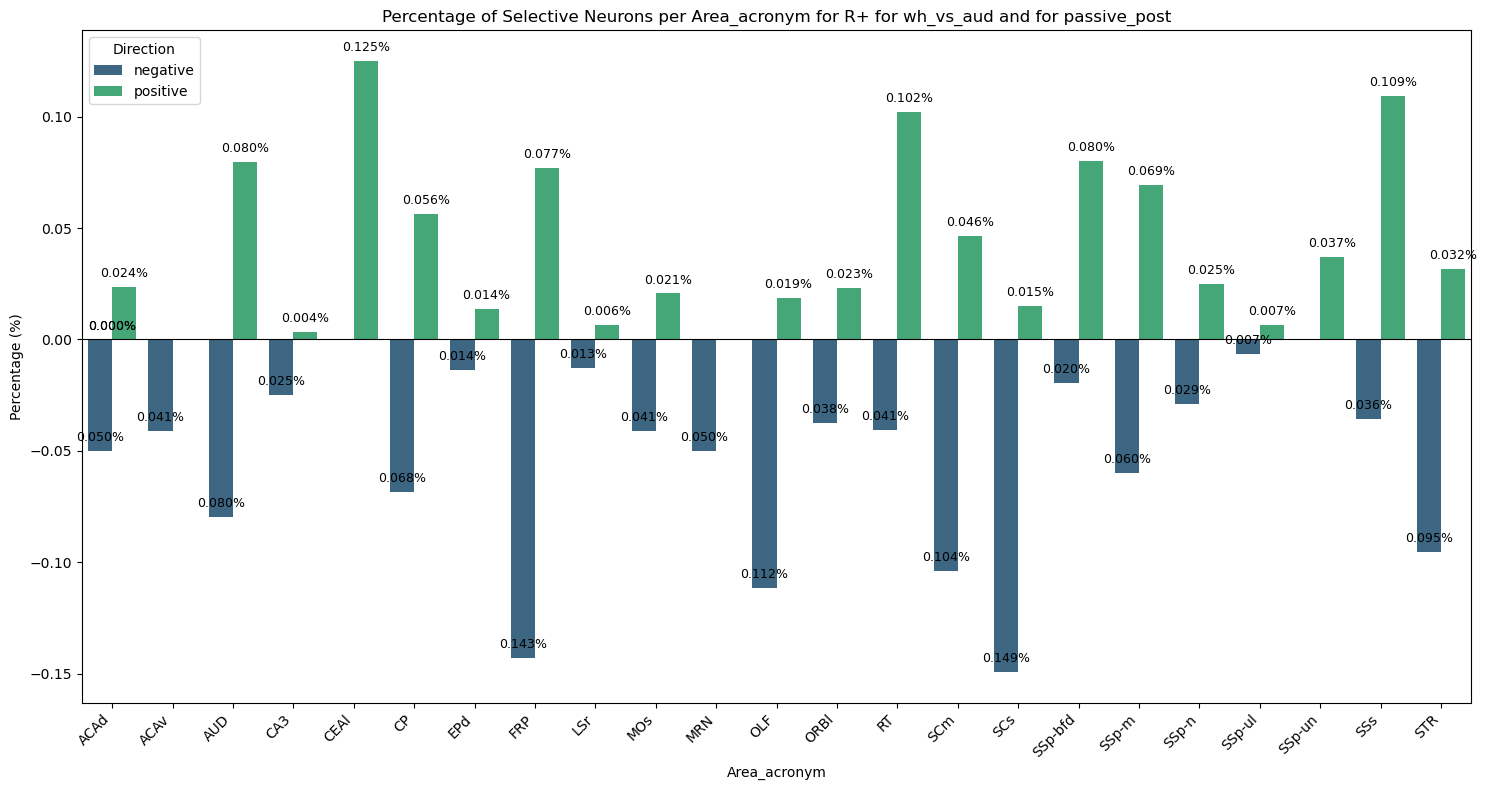

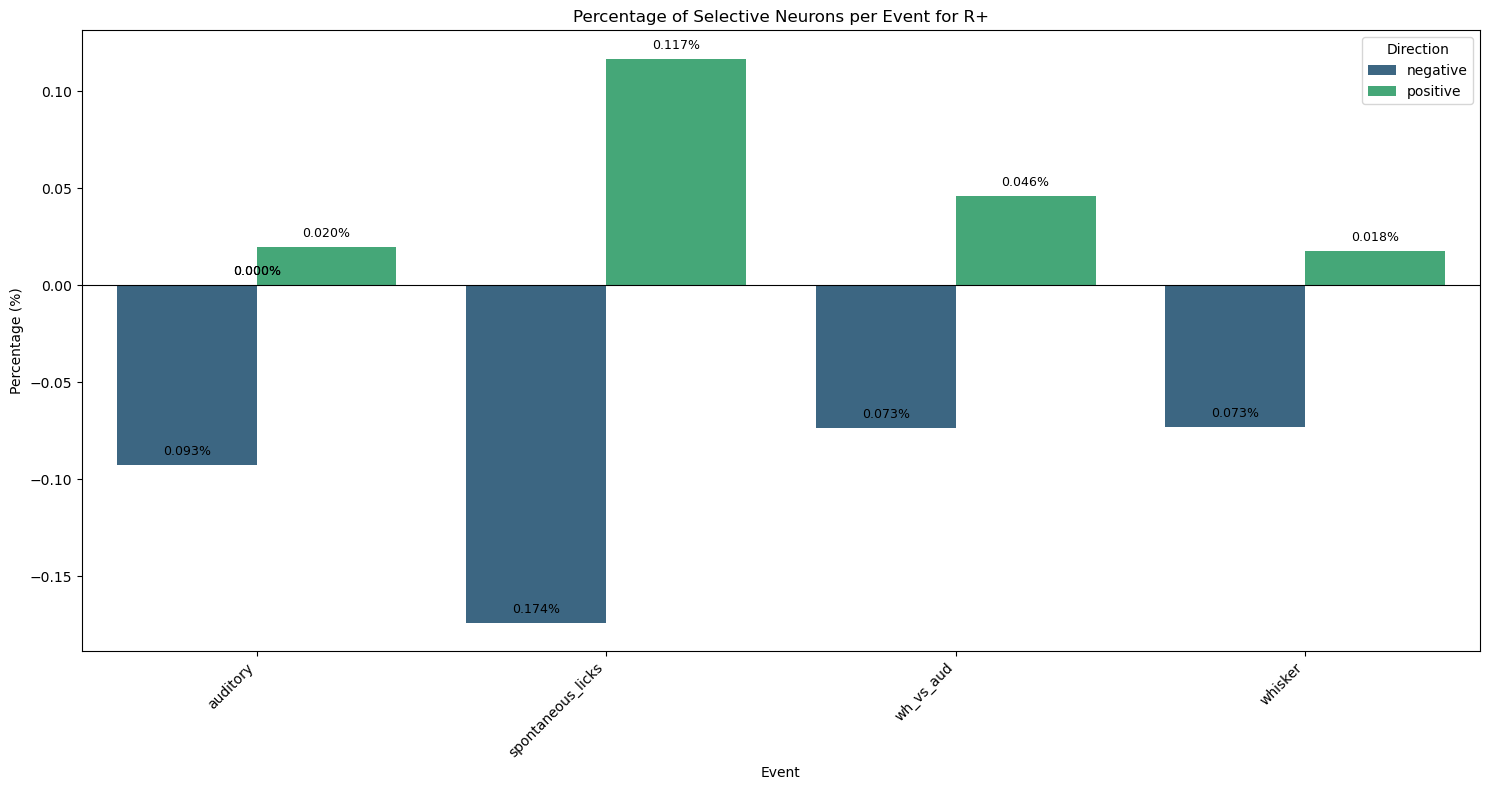

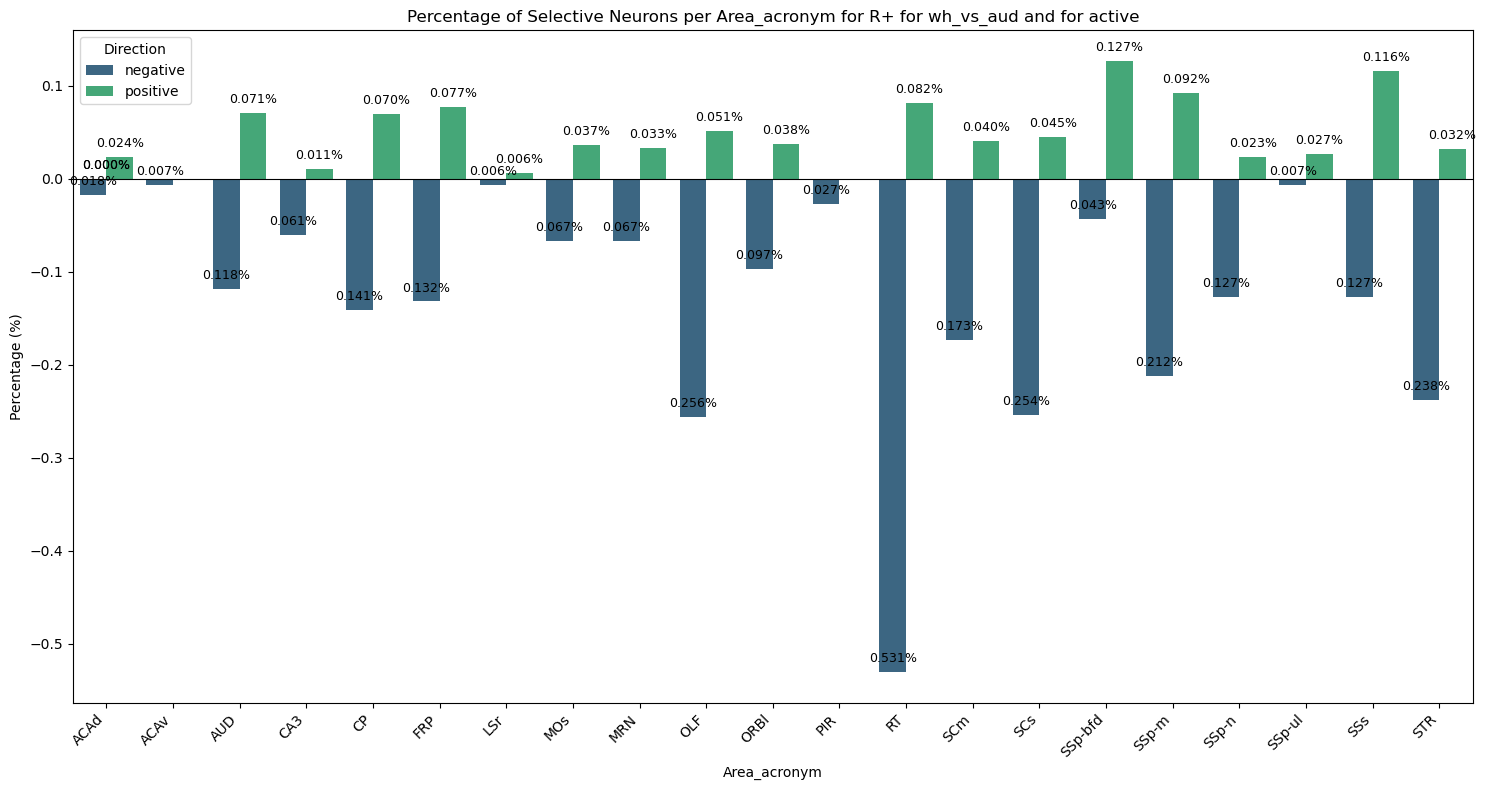

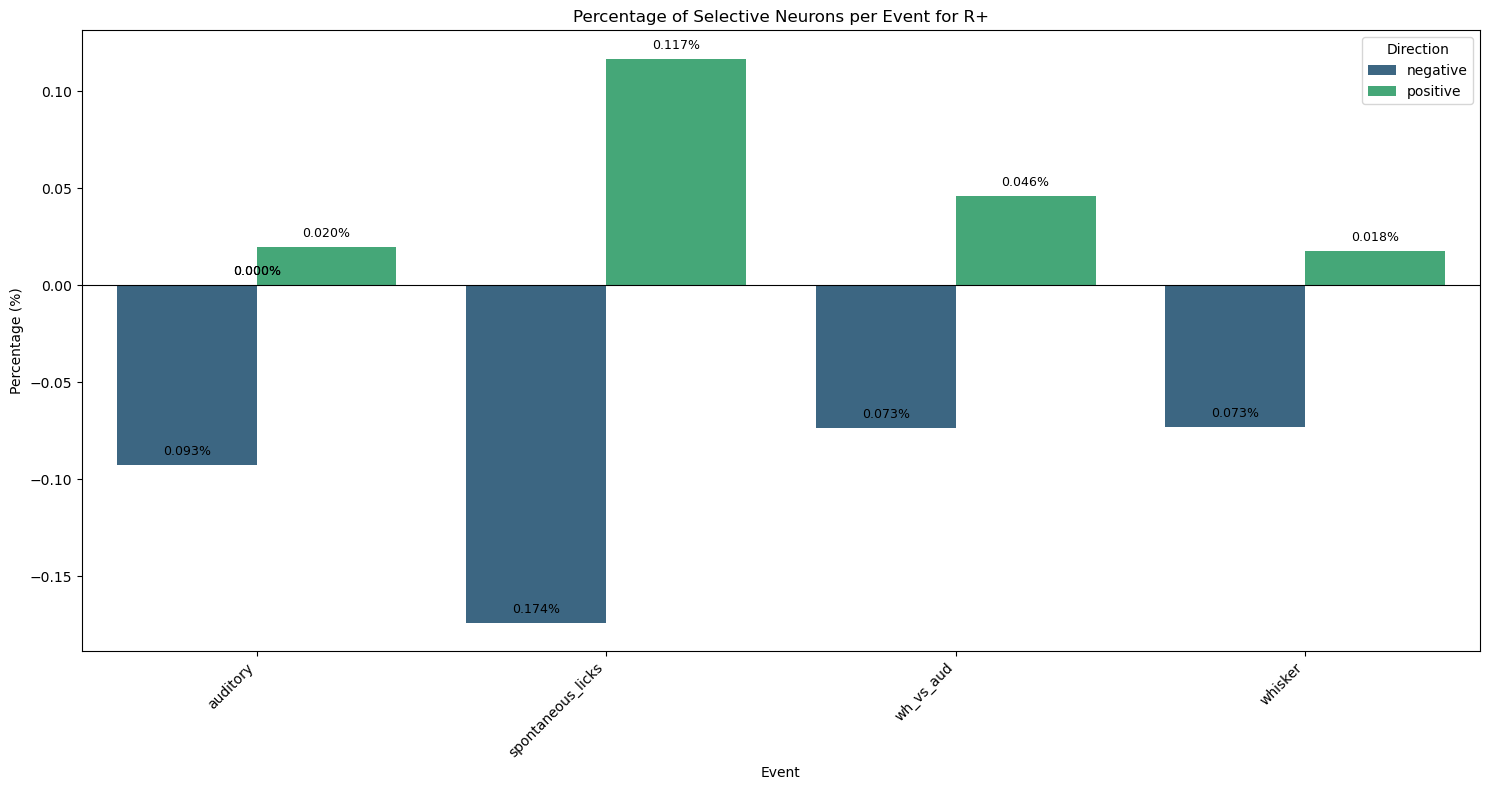

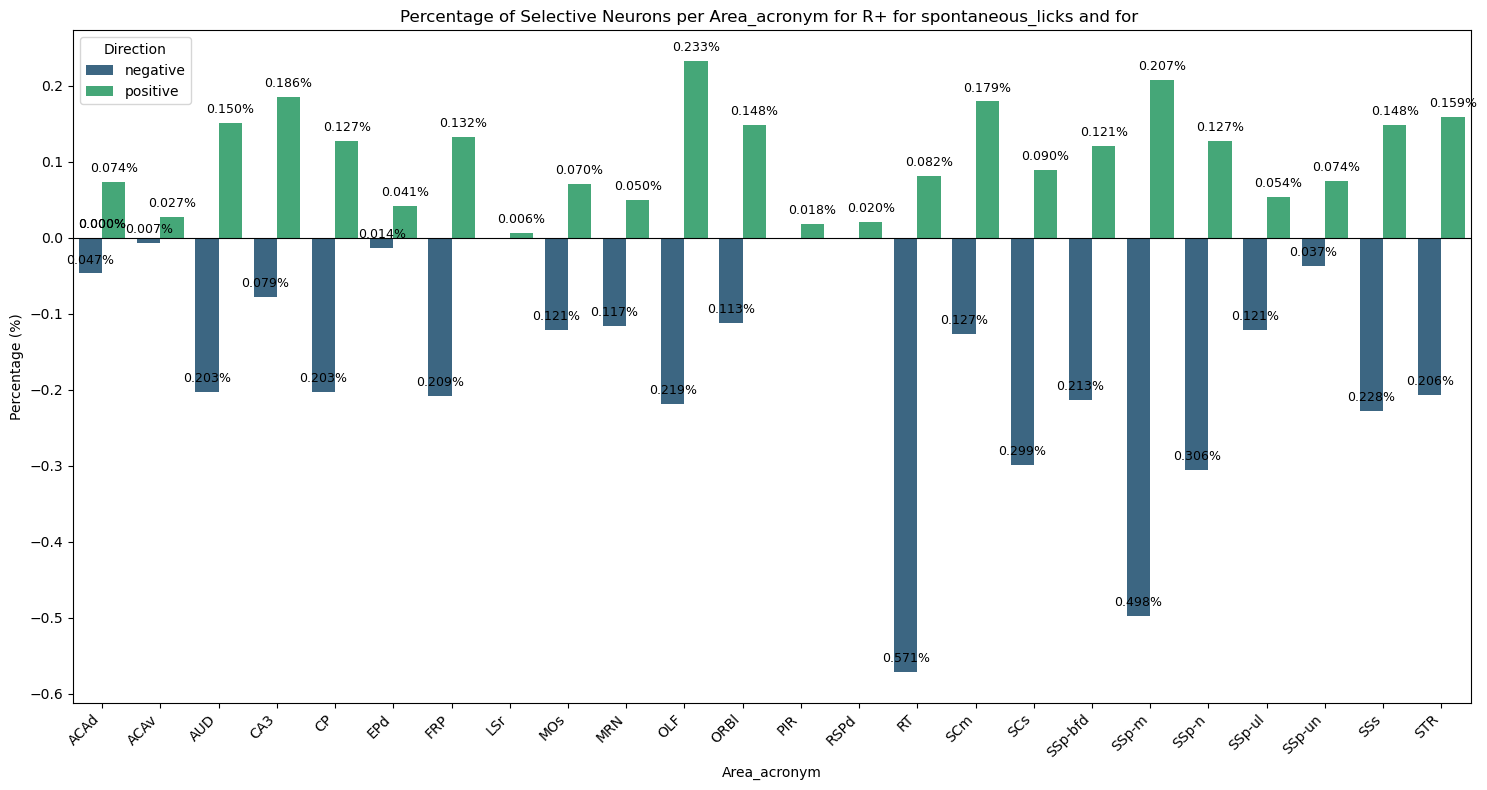

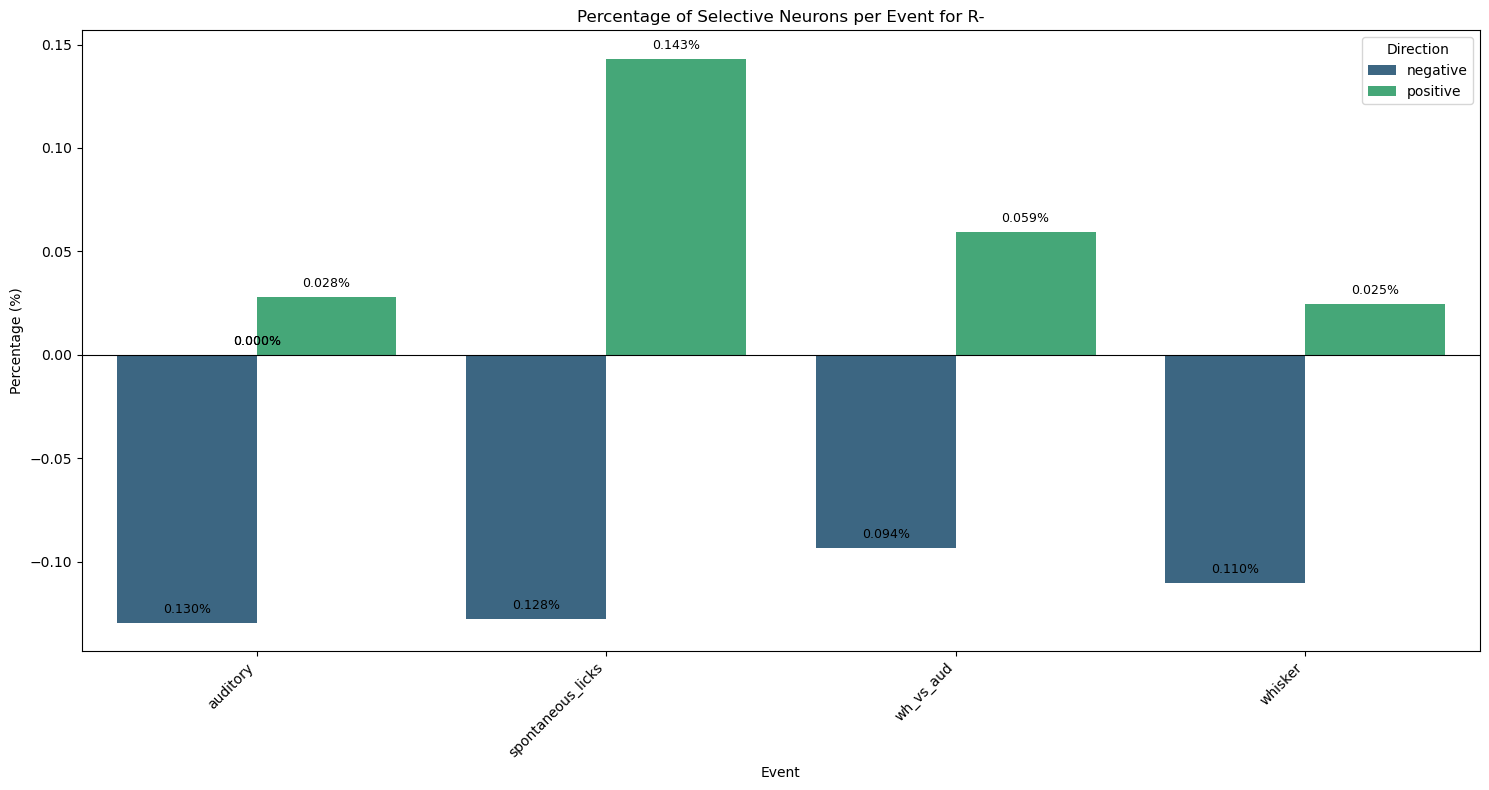

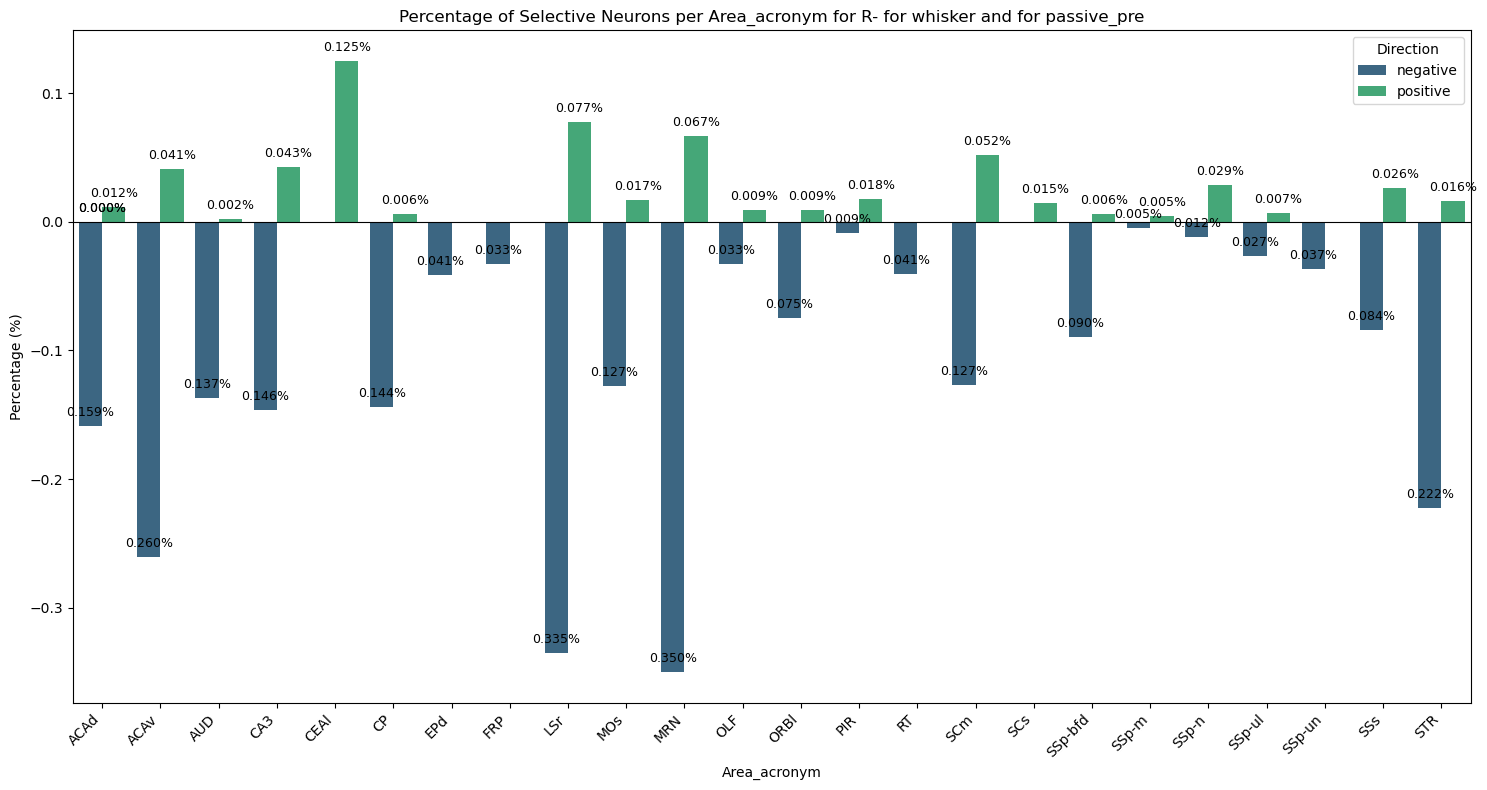

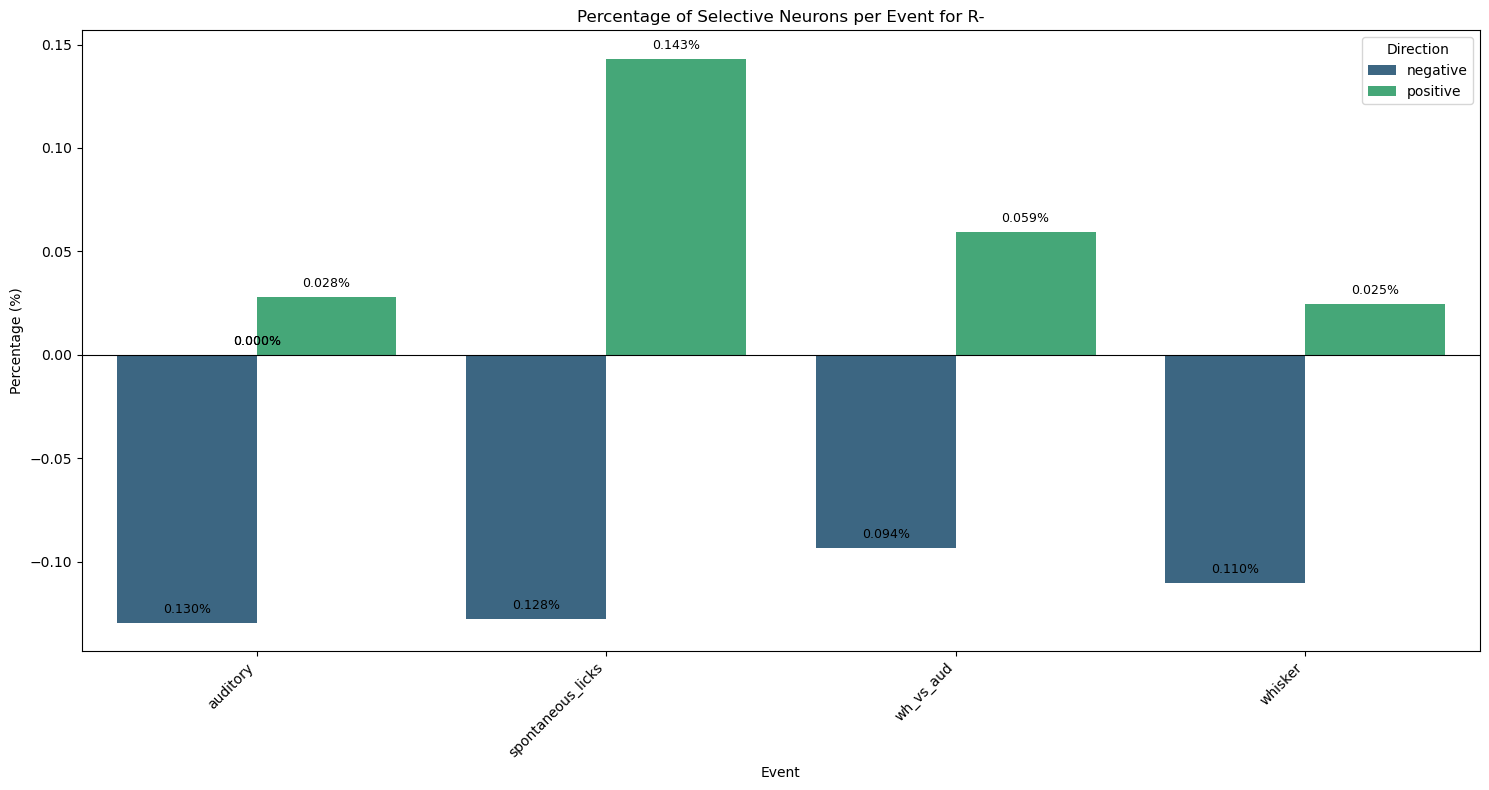

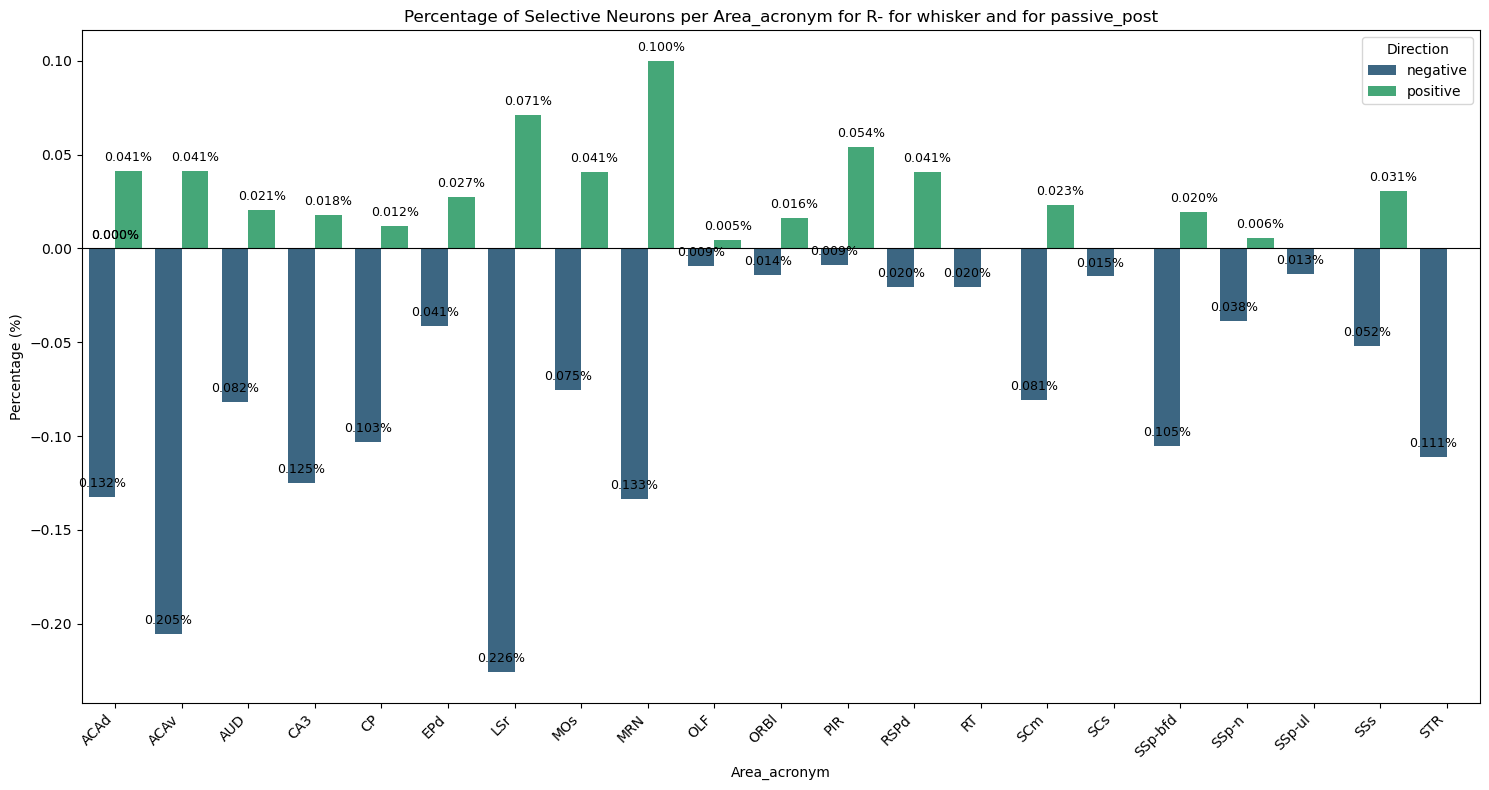

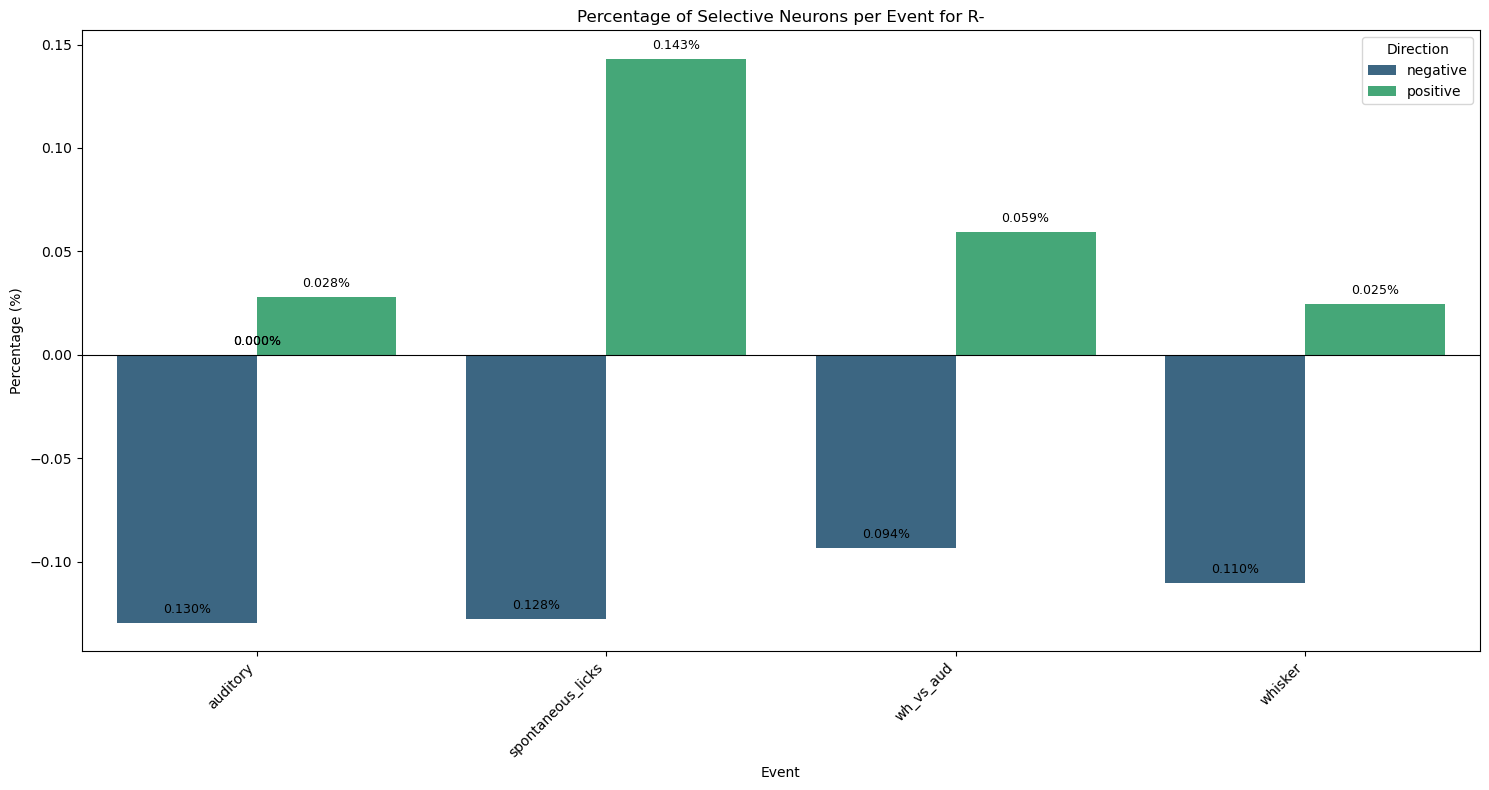

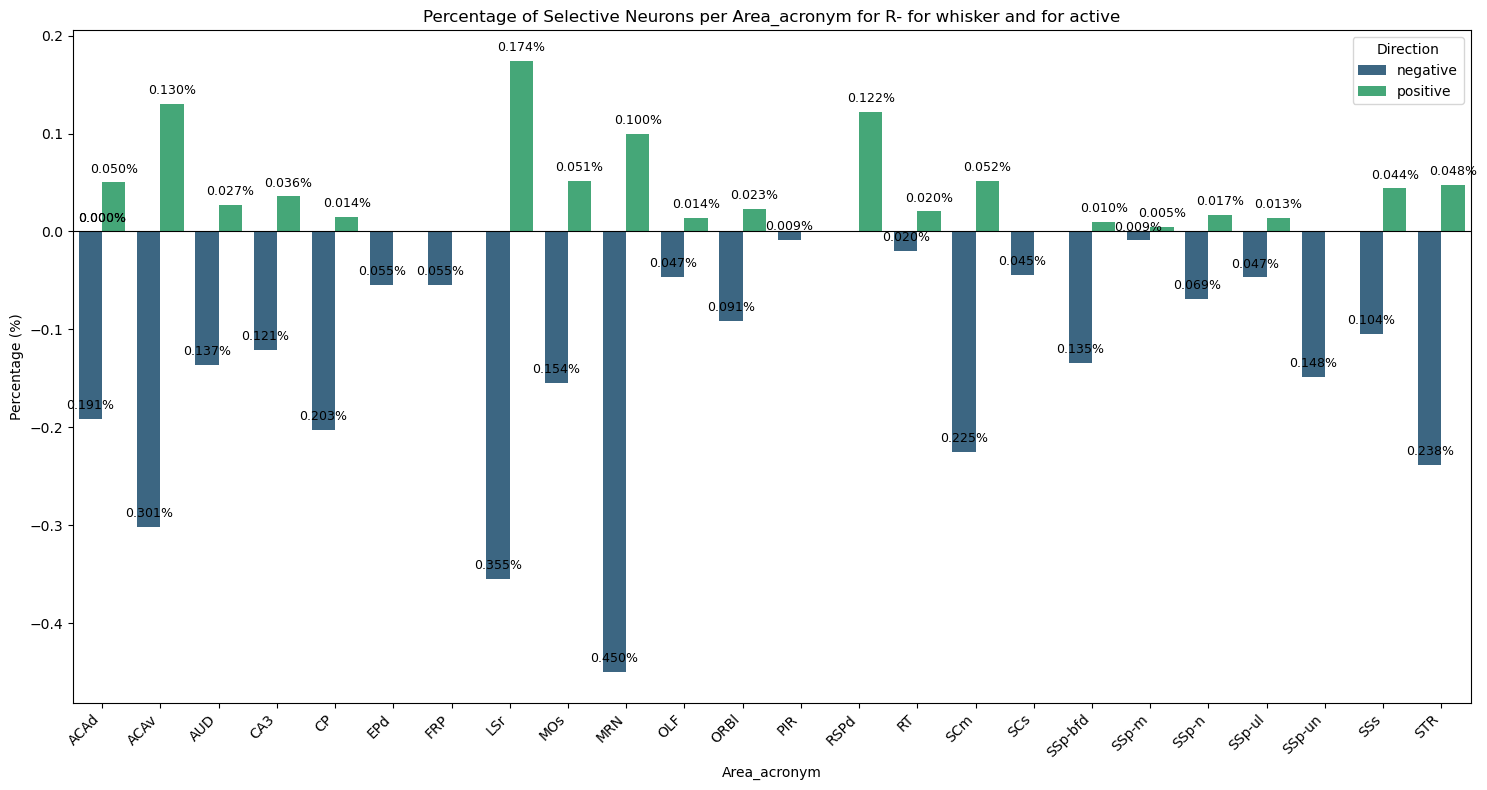

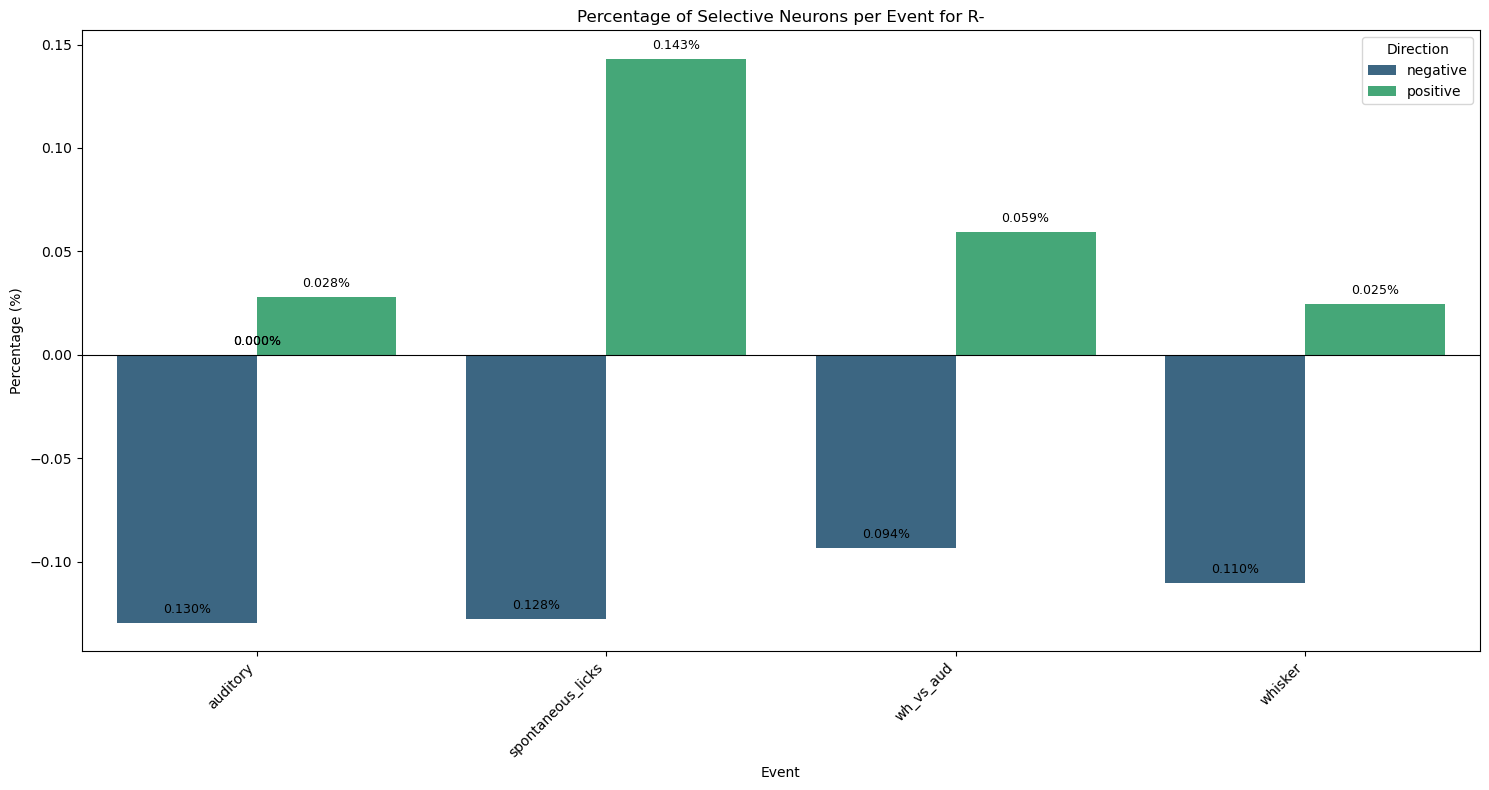

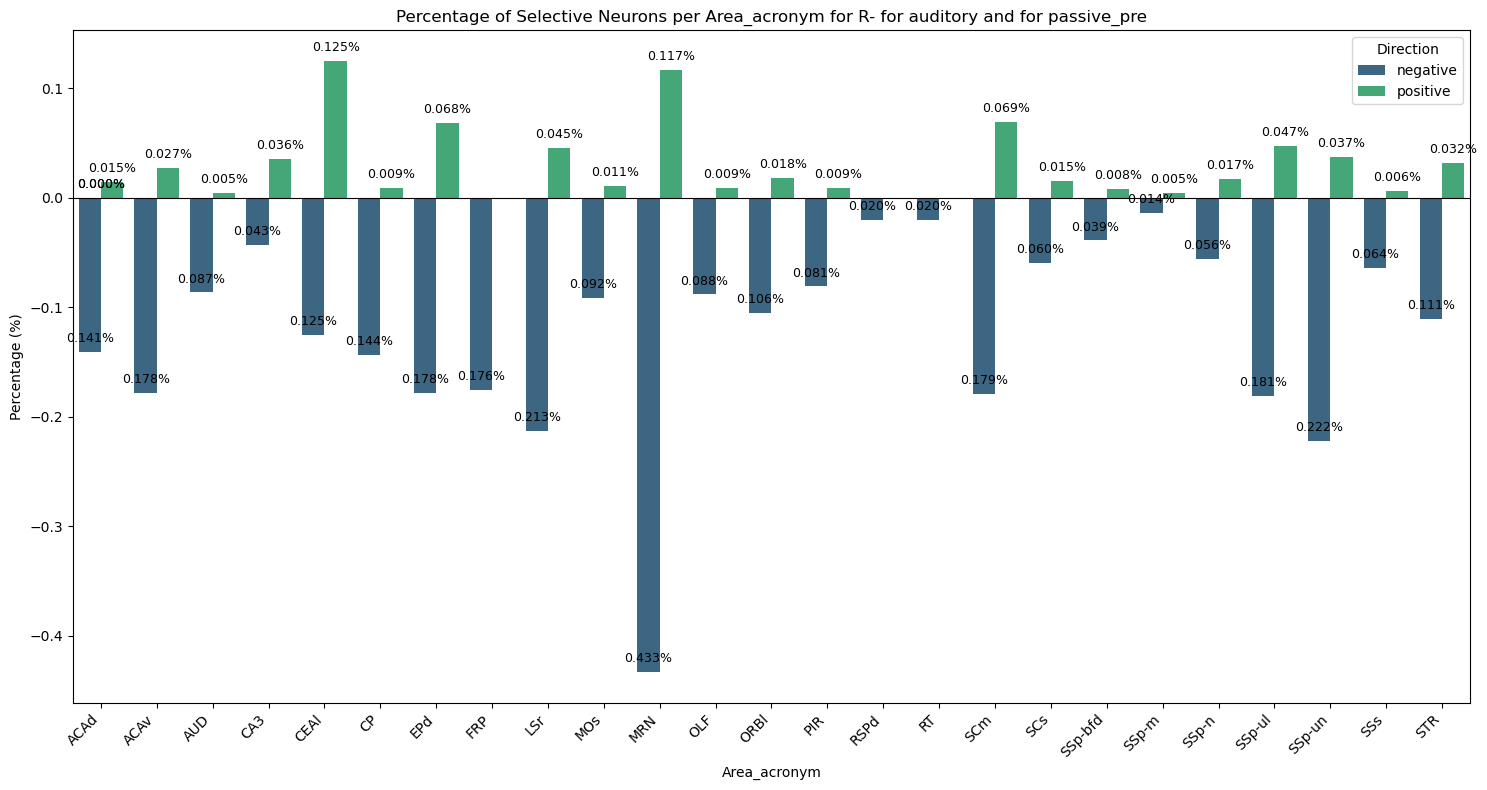

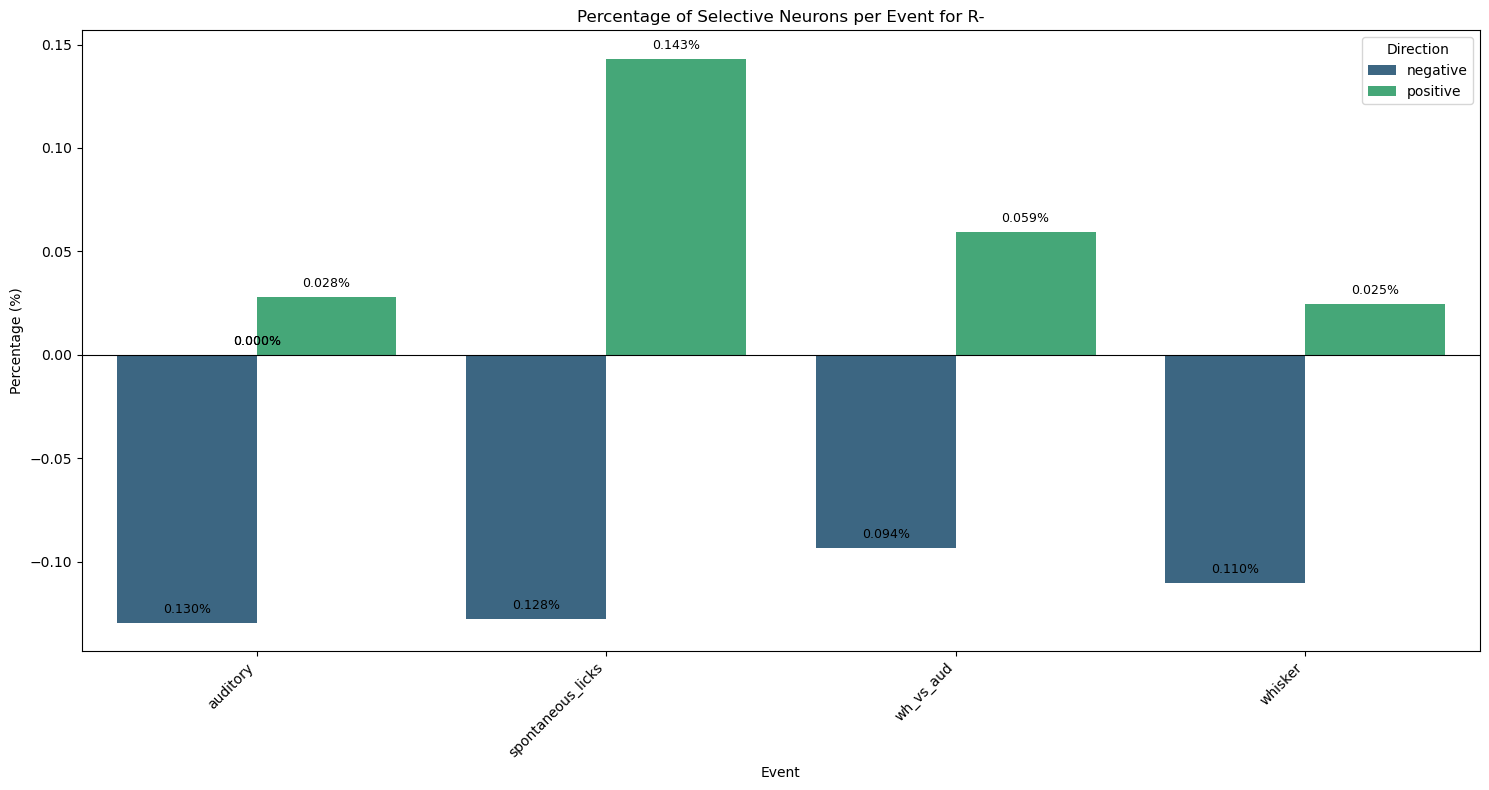

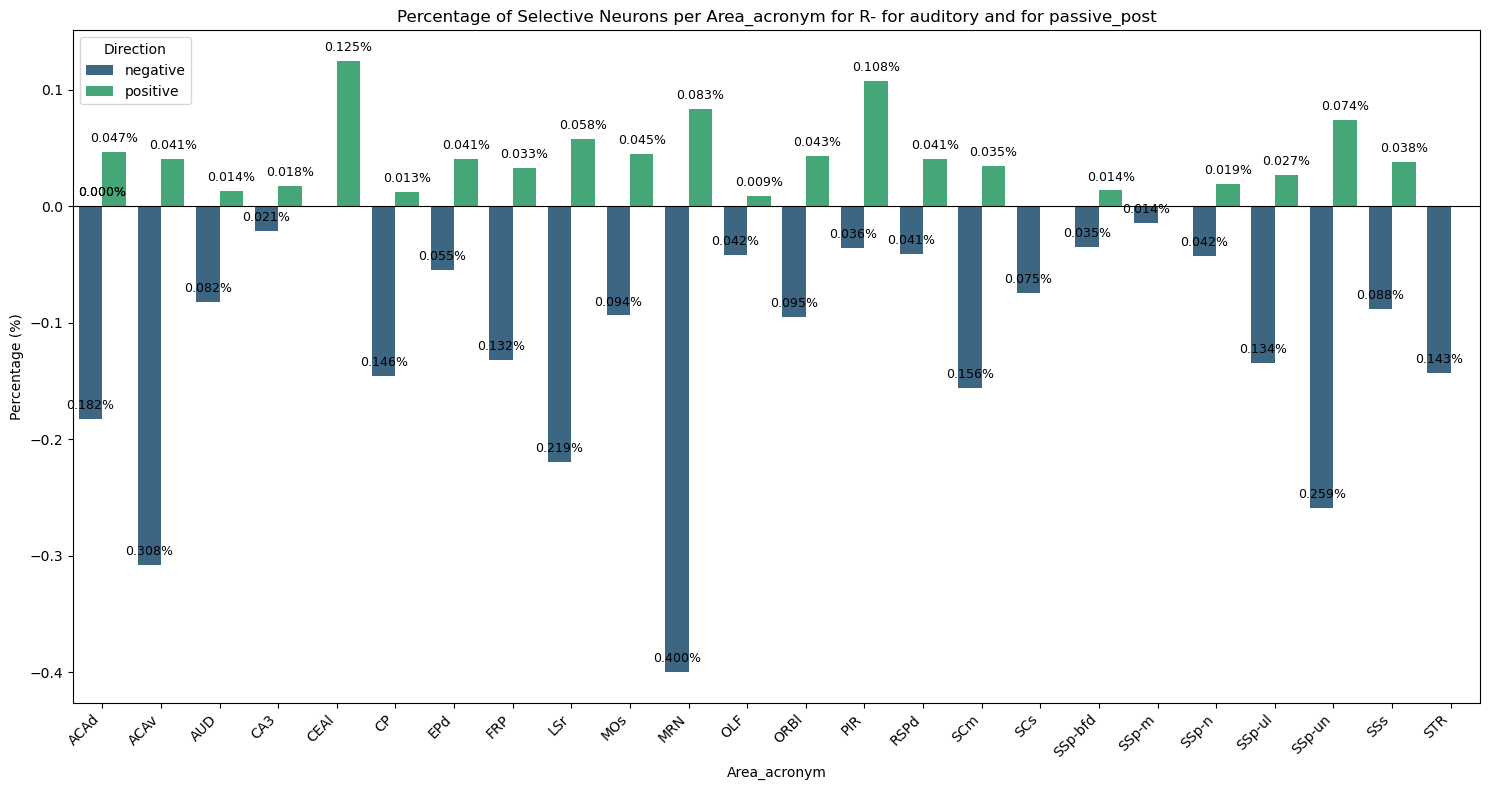

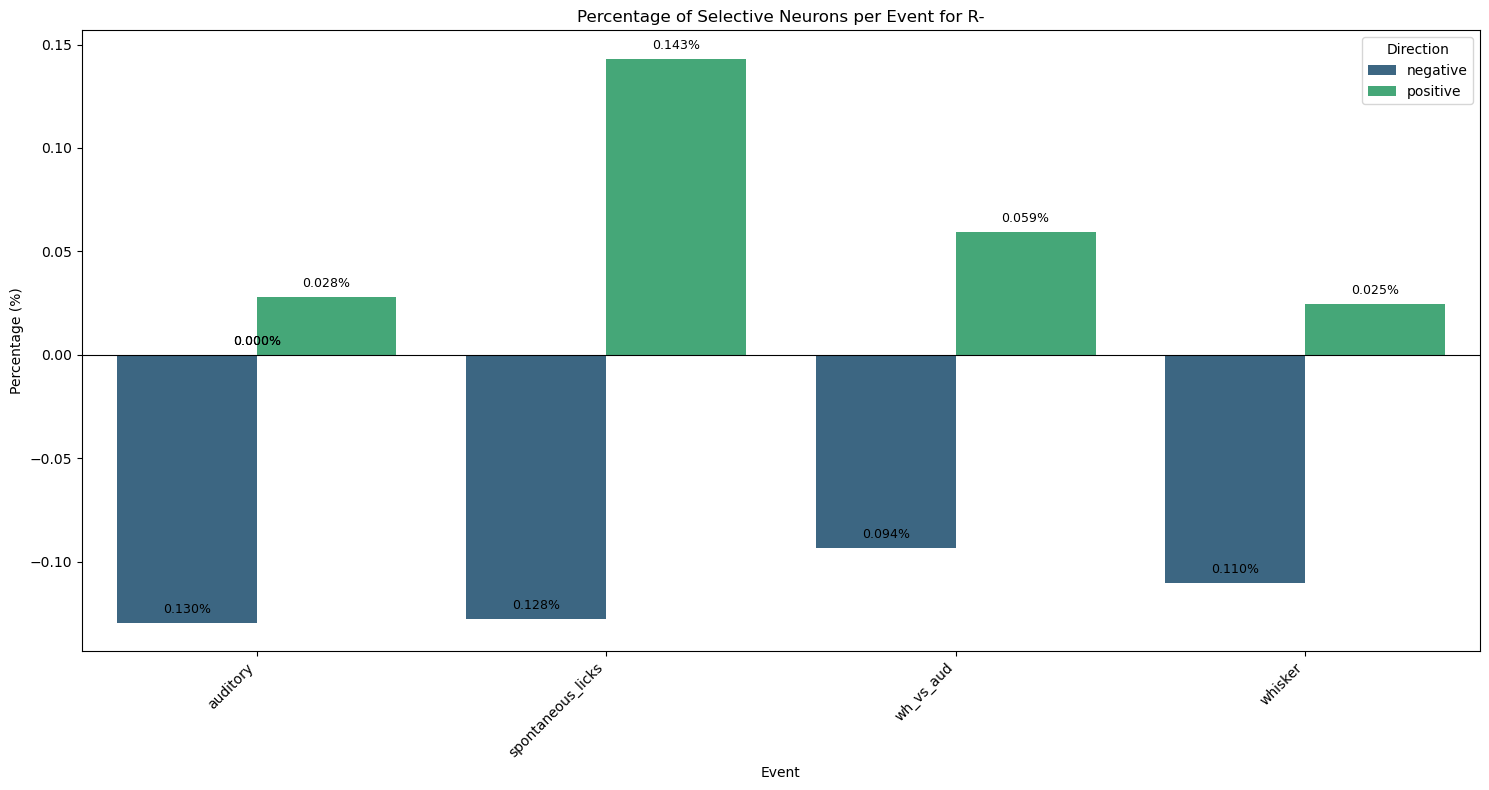

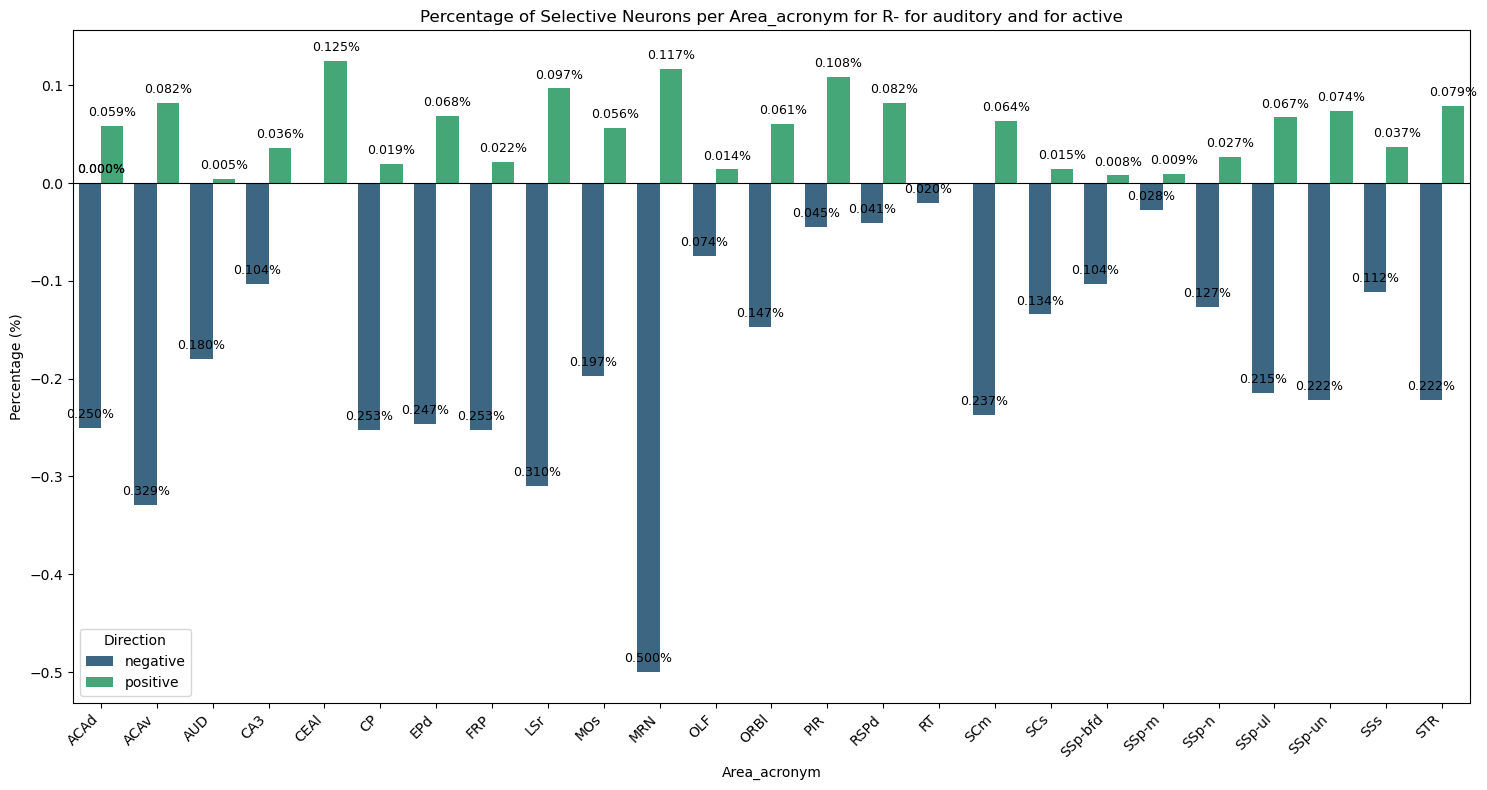

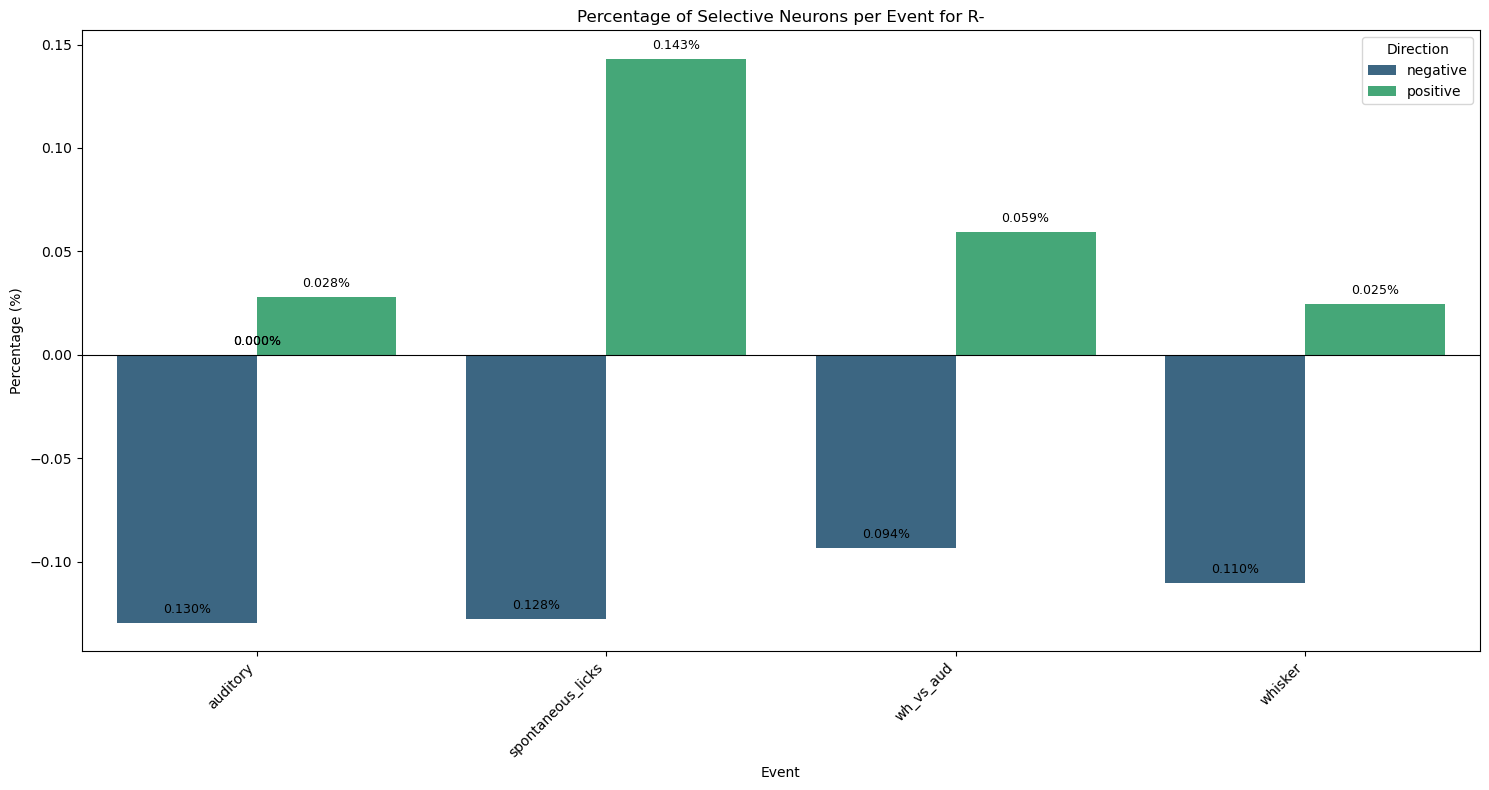

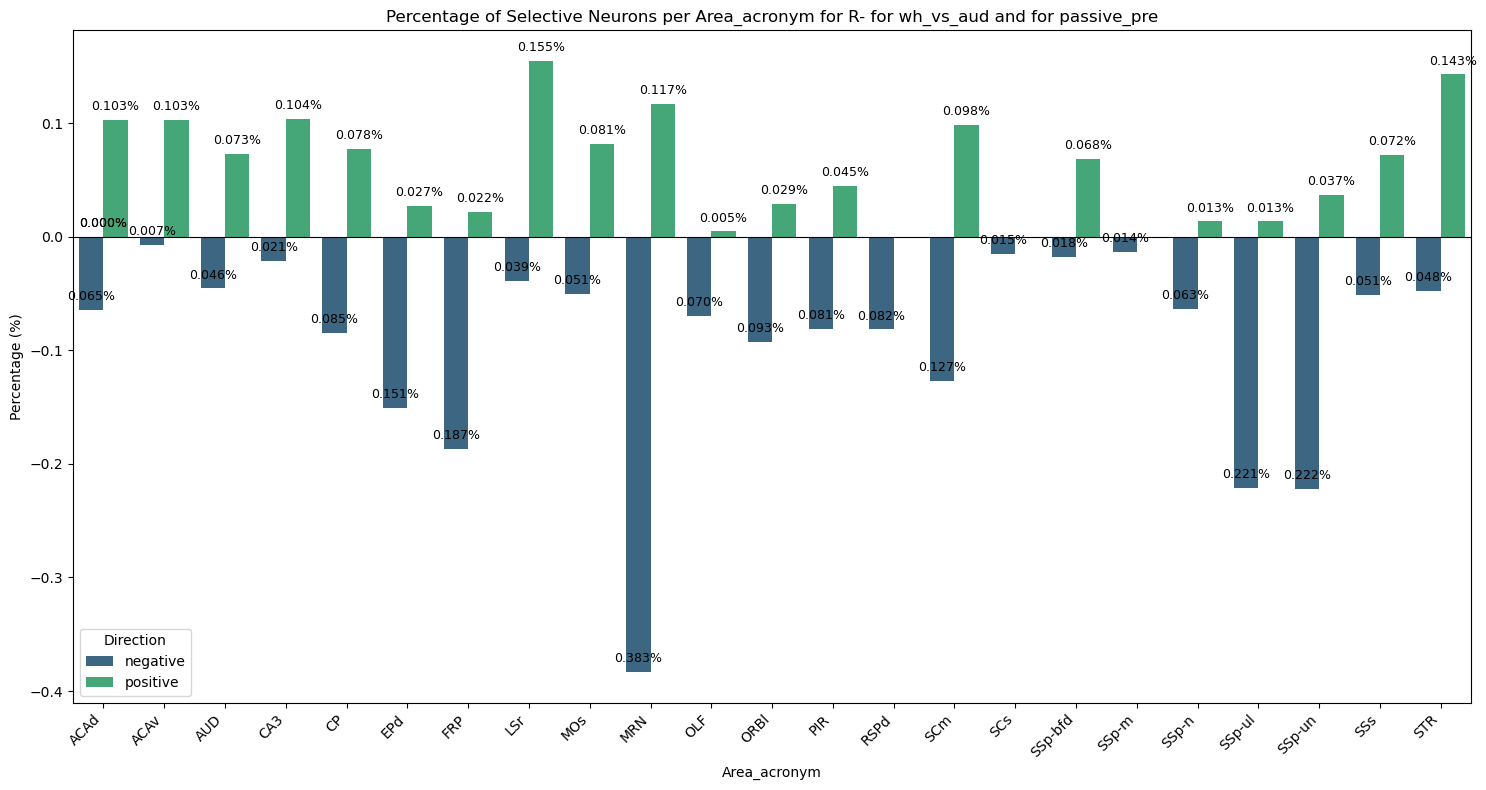

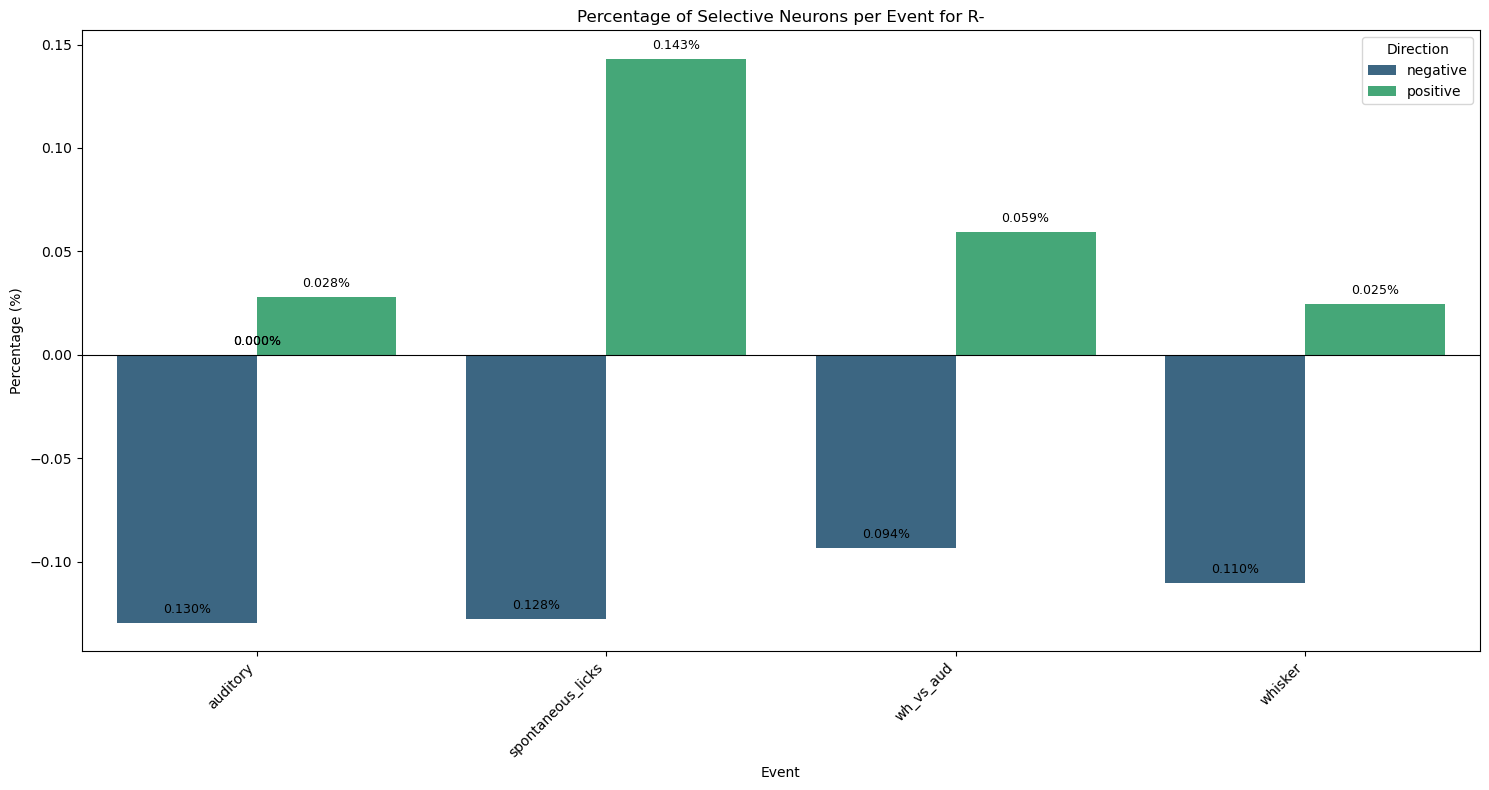

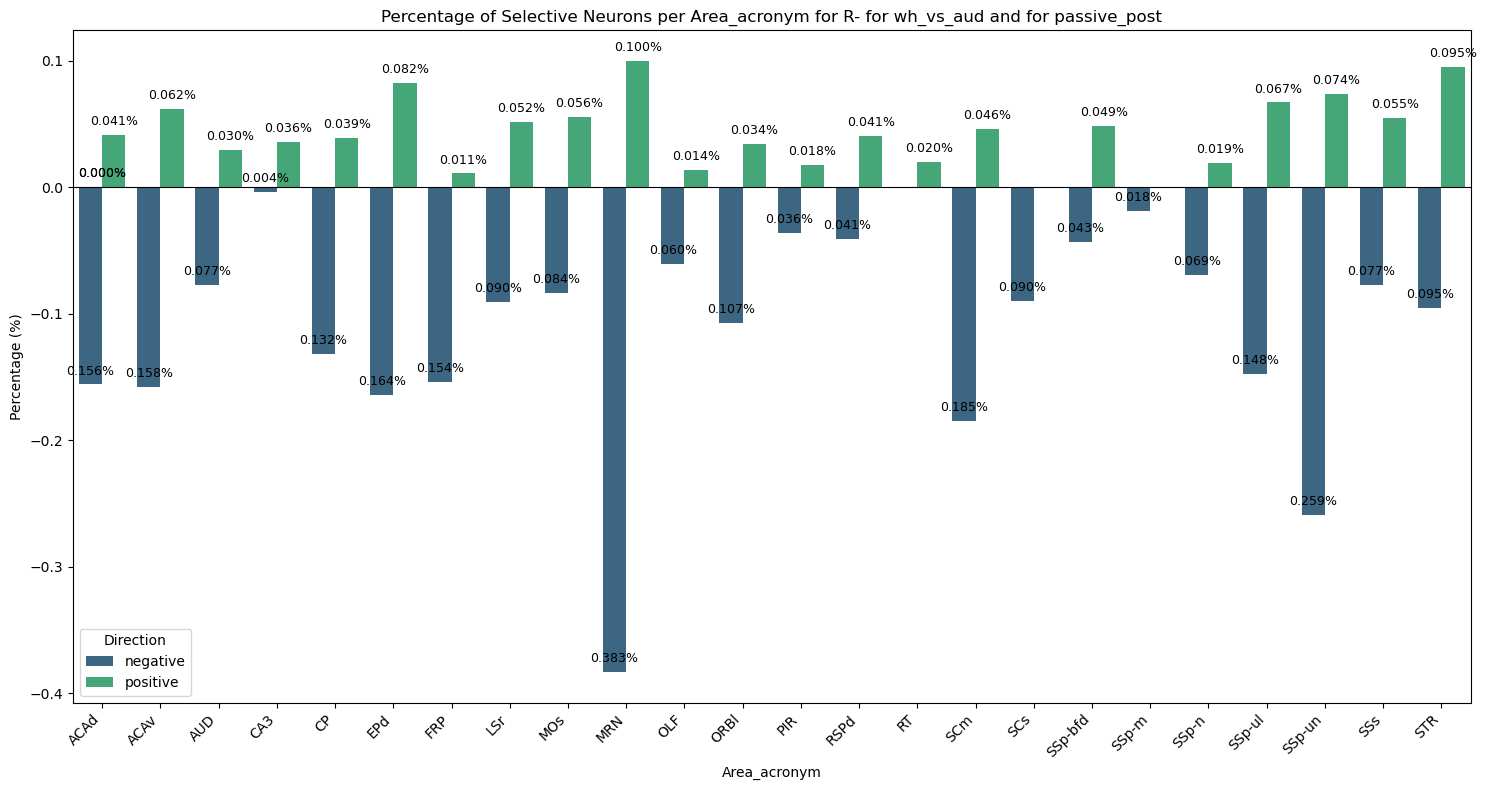

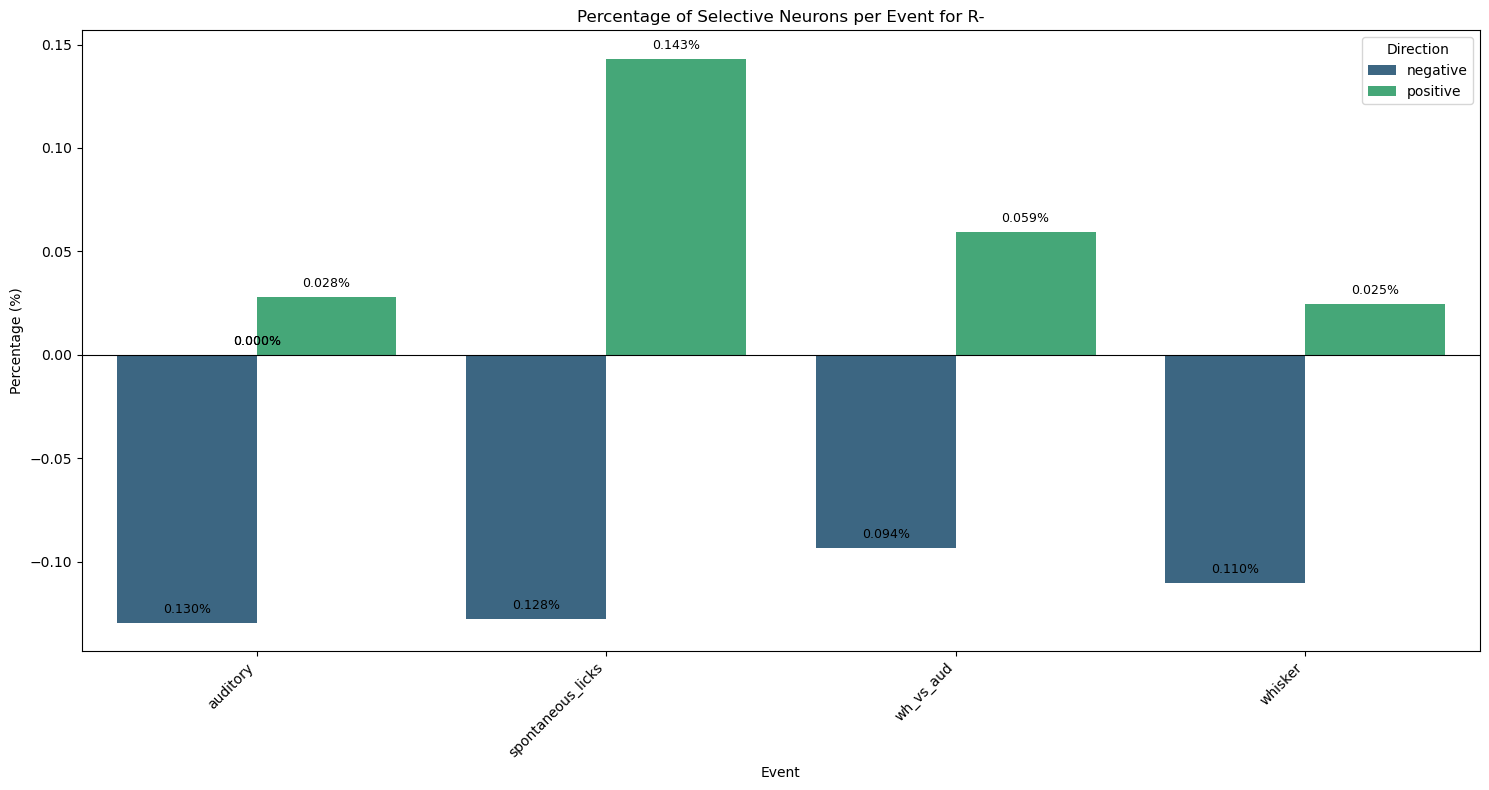

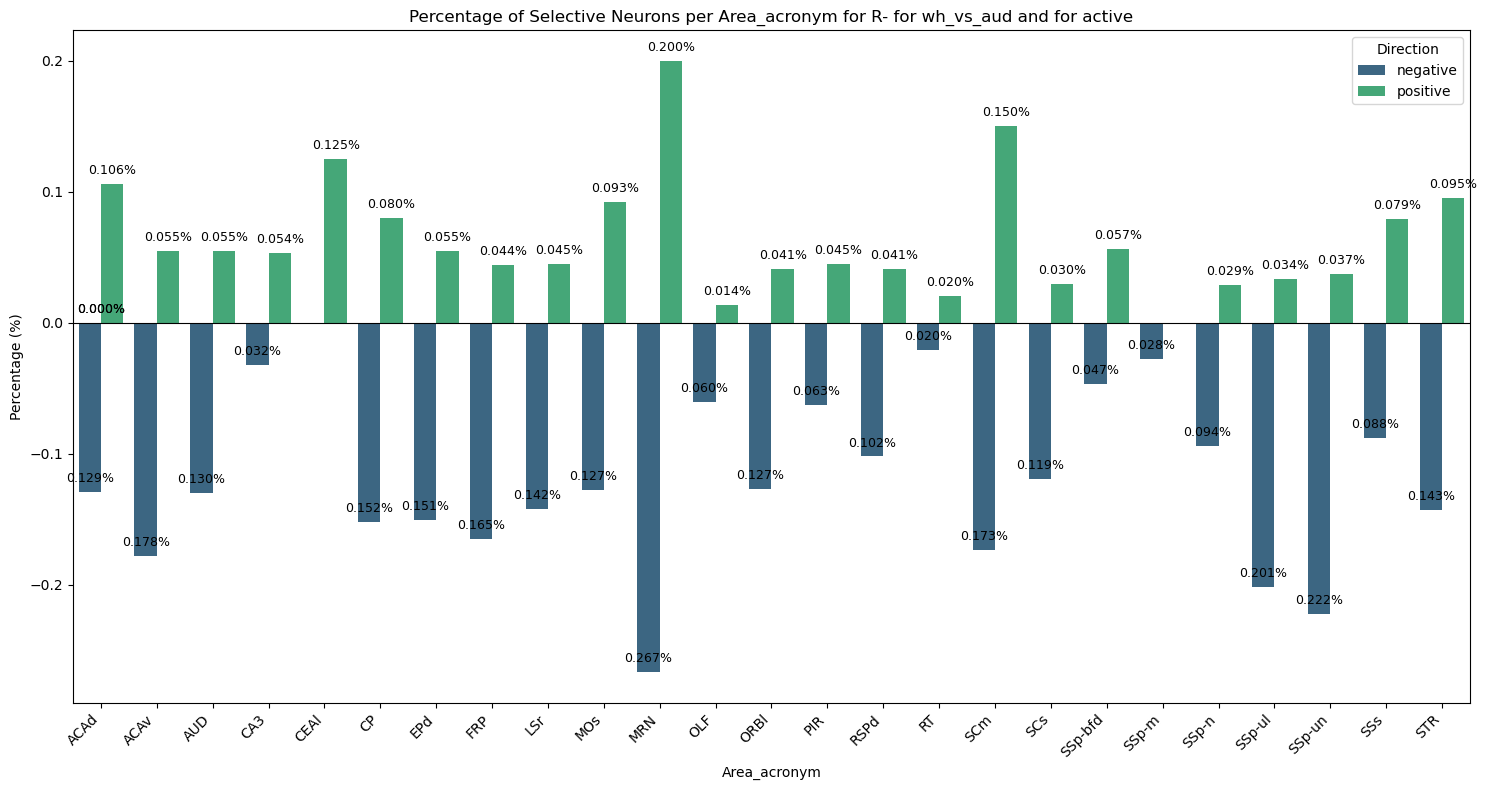

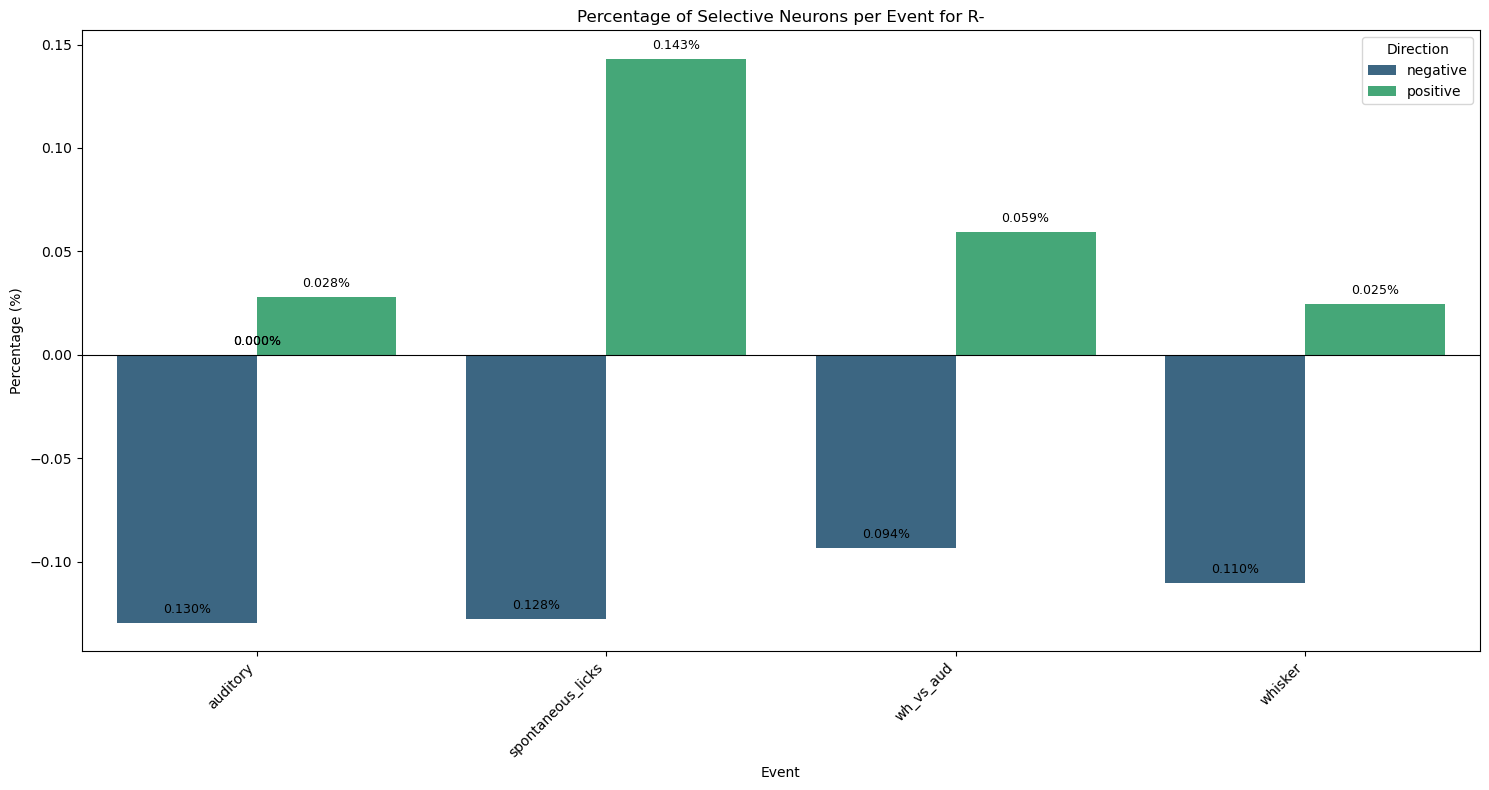

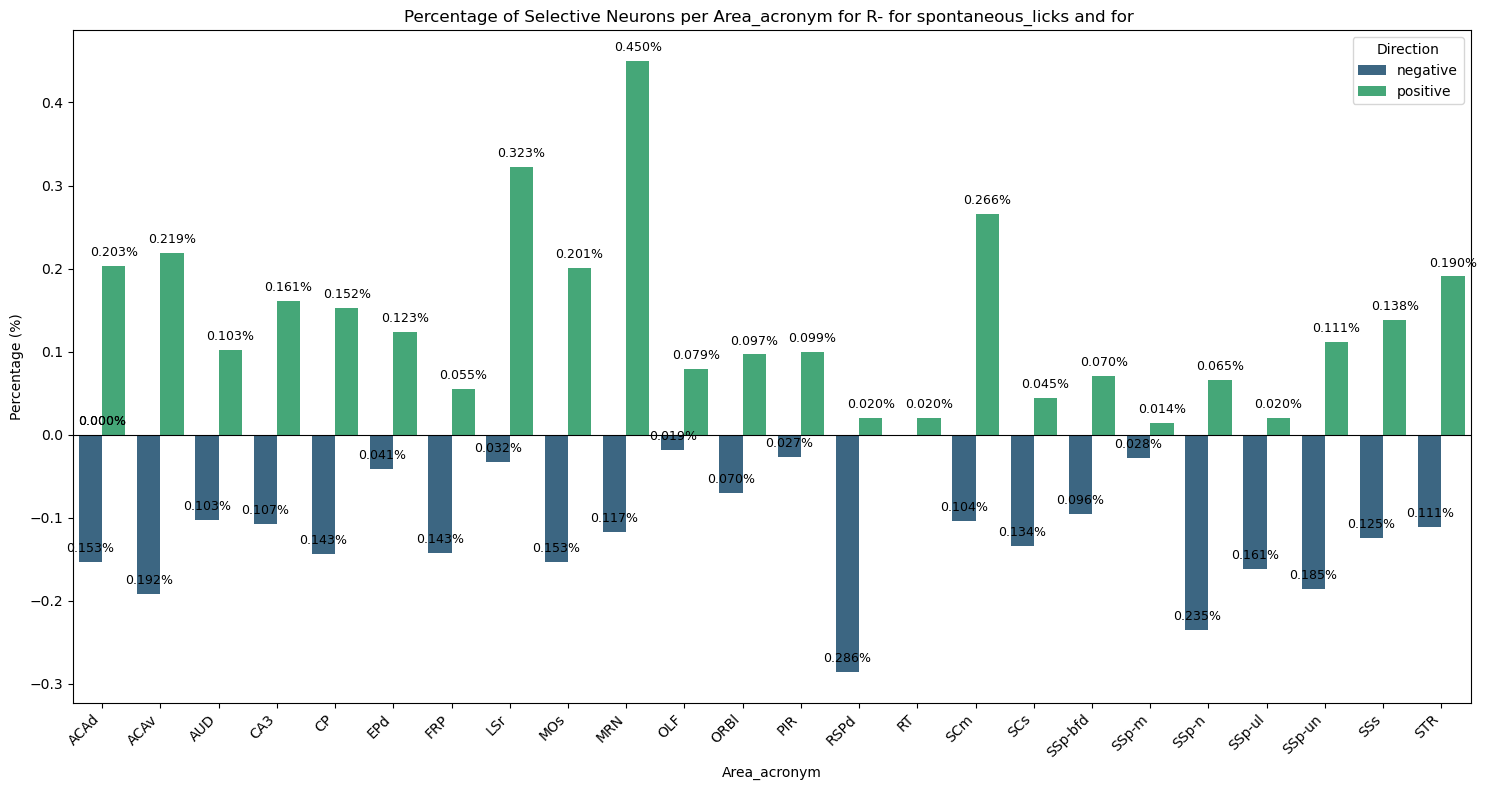

In [39]:
for wh_reward in ['R+', 'R-']:
    for event in ['whisker','auditory','wh_vs_aud', 'spontaneous_licks']:
        if event != 'spontaneous_licks':
            contexts = ['passive_pre', 'passive_post', 'active']
        else:
            contexts = ['']
        for context in contexts:
            if context == '':
                df_modif = df[(df['event']==event)]
            else:
                df_modif = df[(df['event']==event)&(df['context']==context)]

            # To plot per event
            plot_selectivity_direction_v4(df, by='event', filter_value='', wh_reward = wh_reward)

            # To plot per area_acronym
            plot_selectivity_direction_v4(df_modif, by='area_acronym', filter_value='', wh_reward = wh_reward, event_type = event, context = context)

In [2]:
pd.read_csv('/Volumes/Expansion/shrinidhi/EPFL/Mastersem3/Semester Project Lsens/Data/AB120_20240811_143102/AB120_20240811_143102_AUC_Selectivity_pre_post.csv')

cluster_id ccf_acronym                                     ccf_name  \
0              1         CA3                                    Field CA3   
1              5         CA3                                    Field CA3   
2              9         CA3                                    Field CA3   
3             12         CA3                                    Field CA3   
4             14         CA3                                    Field CA3   
...          ...         ...                                          ...   
2585         236      SSp-n4    Primary somatosensory area, nose, layer 4   
2586         241    SSp-n2/3  Primary somatosensory area, nose, layer 2/3   
2587         242    SSp-n2/3  Primary somatosensory area, nose, layer 2/3   
2588         243          CP                                 Caudoputamen   
2589         248      SSp-n4    Primary somatosensory area, nose, layer 4   

      ccf_parent_id ccf_parent_acronym                   ccf_parent_name  \
0             375.0                 CA                      Ammon's horn   
1             375.0                 CA                      Ammon's horn   
2             375.0                 CA                      Ammon's horn   
3             375.0                 CA                      Ammon's horn   
4             375.0                 CA                      Ammon's horn   
...             ...                ...                               ...   
2585          353.0              SSp-n  Primary somatosensory area, nose   
2586          353.0              SSp-n  Primary somatosensory area, nose   
2587          353.0              SSp-n  Primary somatosensory area, nose   
2588          485.0               STRd            Striatum dorsal region   
2589          353.0              SSp-n  Primary somatosensory area, nose   

                                            spike_times  \
0     [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
1     [8.50683378e-01 8.61316503e-01 8.73749594e-01 ...   
2     [8.57983235e-02 1.90962935e-01 2.93227604e-01 ...   
3     [8.19650651e-02 1.73179949e+00 2.62854864e+00 ...   
4     [4.24688368e+00 5.92881749e+00 6.04198194e+00 ...   
...                                                 ...   
2585  [  43.75914562  185.04508605  190.5813485  ......   
2586  [1.74193602e-01 1.38959637e+01 1.73261322e+01 ...   
2587  [1.78293546e-01 1.21547927e+00 2.12039514e+00 ...   
2588  [   7.40079346    7.46859252   10.18157151 ......   
2589  [ 231.9184028   274.1875456   335.35171796 ......   

                   mouse_id context              event  \
0     AB120_20240811_143102  active            whisker   
1     AB120_20240811_143102  active            whisker   
2     AB120_20240811_143102  active            whisker   
3     AB120_20240811_143102  active            whisker   
4     AB120_20240811_143102  active            whisker   
...                     ...     ...                ...   
2585  AB120_20240811_143102     NaN  spontaneous_licks   
2586  AB120_20240811_143102     NaN  spontaneous_licks   
2587  AB120_20240811_143102     NaN  spontaneous_licks   
2588  AB120_20240811_143102     NaN  spontaneous_licks   
2589  AB120_20240811_143102     NaN  spontaneous_licks   

                                             pre_spikes  \
0     [ 4  3  1  1  4  8  4  6  2  4  5  3  2  5  3 ...   
1     [ 5  4  3  0  1  7  1  0  1  7  6  1  2  4  3 ...   
2     [1 2 2 0 0 2 6 4 0 4 2 0 0 1 1 3 0 3 0 3 0 2 3...   
3     [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0...   
4     [0 1 1 0 1 0 0 1 0 1 2 2 2 2 2 0 2 1 1 5 3 1 2...   
...                                                 ...   
2585  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0...   
2586  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0...   
2587  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
2588  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0...   
2589  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   

                                            post_spik

# 4) Now for the ROC bootstrapping plots

In [ ]:
from generate import *
mouse_ids_context = ['AB120_20240811_143102']#,'AB121_20240813_125401','AB124_20240815_111810']
save_path = '/Volumes/Expansion/shrinidhi/EPFL/Mastersem3/Semester Project Lsens/Data'
save_plots_path = '/Volumes/Expansion/shrinidhi/EPFL/Mastersem3/Semester Project Lsens/Plots/Bootstrap'

df_auc = AUC_generate(mouse_ids_context, save_path, save_plots=True, save_plots_path=save_plots_path)


# 5) Now compare passive pre and post learning

In [ ]:
df = df.query("context != 'active'")
#df2 = df.query("context != 'active'")



/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_22579/1046961207.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='area_acronym', y='selective', hue='context', data=df, palette='viridis', ci = None)


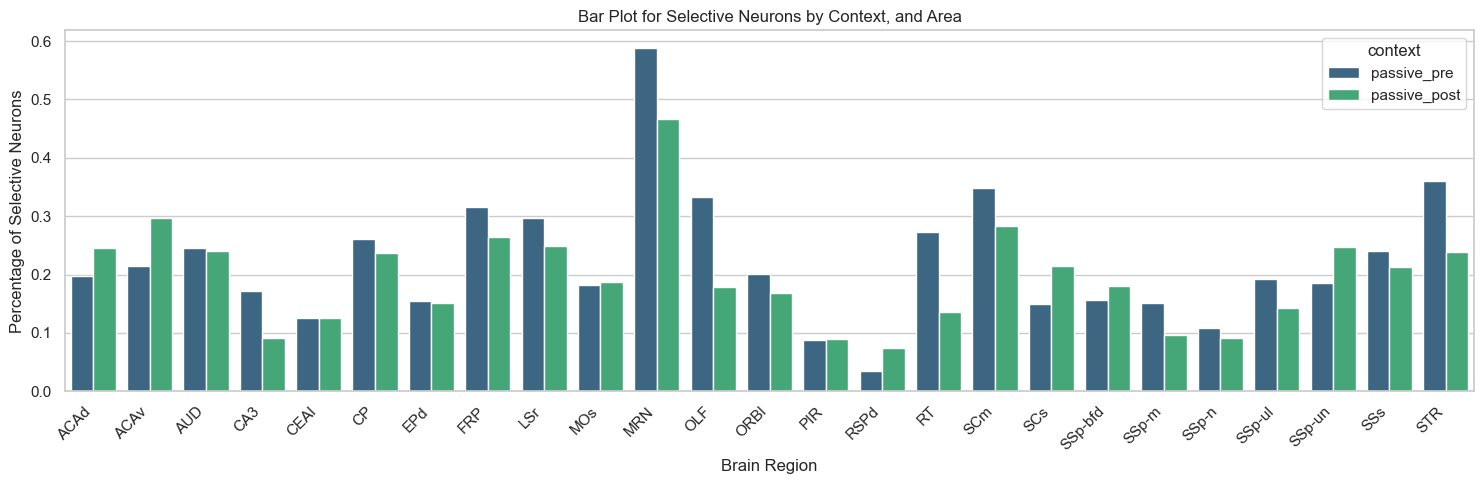

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style
sns.set(style="whitegrid")


def plot_by_context(df):
    df = df.query("context != 'active'")
    df = df.sort_values(by='area_acronym')
    plt.figure(figsize=(15, 5))
    sns.barplot(x='area_acronym', y='selective', hue='context', data=df, palette='viridis', ci = None)
    plt.title('Bar Plot for Selective Neurons by Context, and Area')
    plt.xlabel('Brain Region')
    plt.ylabel('Percentage of Selective Neurons')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_by_context(df[df['has context']==False]) 